# Wikimedia Research - Translation Imbalances: Testing hypothesis #1


In this notebook we aim to find answer to research questions by interacting with the data sources relevant to it, __the related statement is__:
> Cultural context content account for a relevant portion of Wikipedia articles (7%-49%) and is less shared on average, which is causing the language imbalance on Wikipedia. Mass media-dominated content, which is more dominated by certain cultures, is more widely shared, and therefore, translated from larger and global languages more often.

__Research questions:__
- RQ 4.1.1 What type of content receives the biggest count?
- RQ. 4.1.2 What type of content receives the lowest count?

__Data sources__
- Data obtained from the APIs by language edition: https://www.mediawiki.org/wiki/API:Main_page
- Predictions of categories by article: https://www.mediawiki.org/wiki/ORES/Articletopic
- Obtain pages by Wikipedia category: https://petscan.wmflabs.org/

__Steps:__
1. Define the tool to use to get the top level categories of articles
2. Define the categories to use
3. Get pages belonging to a category (IDs)
4. Make API calls to get translation counts by page and aggregate by category
5. Explore further the groups of languages being translated and their pairs



__Concerns:__
- When comparing different articles, should be consider the source language or original language it was written in as a factor for diversity?


In [1]:
main_categories = ['Research', 'Library_science', 'Culture', 'The_arts', 'Geography', 
                   'Places', 'Health', 'Self-care', 'Health_care_occupations', 'History',
                   'Events', 'Formal_sciences','Mathematics', 'Logic', 'Mathematical_sciences',
                  'Science', 'Natural_sciences', 'Nature', 'People', 'Personal_life',
                  'Self', 'Surnames', 'Philosophy', 'Thought', 'Religion', 'Belief', 
                  'Society', 'Social_sciences', 'Technology', 'Applied_sciences']

len(main_categories)

30

In [2]:
# https://www.mediawiki.org/wiki/ORES/Articletopic
# https://ores.wikimedia.org/v3/scores/enwiki/?models=articletopic&revids=1161522245

# Tests

### 1. Define the tool to use to get the top level categories of articles




### Testing the accuracy of the articletopic model from https://ores.wikimedia.org/

- We are fetching random articles via: https://en.wikipedia.org/w/api.php?action=query&list=random&rnnamespace=0&rnlimit=10
- We get the page titles and fecth the page URL via: https://en.wikipedia.org/w/api.php?action=help&modules=query%2Binfo
- We go to each page, check the categories at the end and estimate a list of 3-4 expected categories based on this.
- We finally build a list with all of this information.

```
{
    "batchcomplete": "",
    "continue": {
        "rncontinue": "0.141236895977|0.141238067536|13009515|0",
        "continue": "-||"
    },
    "query": {
        "random": [
            {
                "id": 60265289,
                "ns": 0,
                "title": "African Women's classification in the Cape Epic"
            },
            {
                "id": 46434099,
                "ns": 0,
                "title": "Adrien Kela"
            },
            {
                "id": 60533443,
                "ns": 0,
                "title": "Kenneth Bunn"
            },
            {
                "id": 45482666,
                "ns": 0,
                "title": "Cyrtocris fulvicornis"
            },
            {
                "id": 1808010,
                "ns": 0,
                "title": "Islwyn (UK Parliament constituency)"
            },
              {
                "id": 47284944,
                "ns": 0,
                "title": "Capanne, San Marino",
                "url": "https://en.wikipedia.org/wiki/Capanne,_San_Marino"
            },
            
            {
                "id": 28276181,
                "ns": 0,
                "title": "1988 Virginia Slims of Arizona \u2013 Singles",
                "url": "https://en.wikipedia.org/wiki/1988_Virginia_Slims_of_Arizona_%E2%80%93_Singles"
            },
            
            {
                "id": 22369872,
                "ns": 0,
                "title": "Herbert Munk",
                "url": "https://en.wikipedia.org/wiki/Herbert_Munk"
            },
            
            {
                "id": 33607623,
                "ns": 0,
                "title": "Risky Business (House)",
                "url": "https://en.wikipedia.org/wiki/Risky_Business_(House)"
            },
            
            {
                "id": 5864890,
                "ns": 0,
                "title": "Saskatchewan Glacier",
                "url": "https://en.wikipedia.org/wiki/Saskatchewan_Glacier"
            },
            
            {
                "id": 4494842,
                "ns": 0,
                "title": "Printer cable",
                "url": "https://en.wikipedia.org/wiki/Printer_cable"
            },
            
            {
                "id": 43821884,
                "ns": 0,
                "title": "James Carruthers",
                "url": "https://en.wikipedia.org/wiki/James_Carruthers"
            },
            
            {
                "id": 41505702,
                "ns": 0,
                "title": "Hammer of Heaven",
                "url": "https://en.wikipedia.org/wiki/Hammer_of_Heaven"
            },
            
            {
                "id": 70186733,
                "ns": 0,
                "title": "The Kyiv Independent",
                "url": "https://en.wikipedia.org/wiki/The_Kyiv_Independent"
            },
            
            {
                "id": 1137772,
                "ns": 0,
                "title": "State room",
                "url": "https://en.wikipedia.org/wiki/State_room"
            },
            
            {
                "id": 43640804,
                "ns": 0,
                "title": "Trials of Kirstin Lobato",
                "url": "https://en.wikipedia.org/wiki/Trials_of_Kirstin_Lobato"
            },
            
            {
                "id": 62111001,
                "ns": 0,
                "title": "Jessa Dillow Crisp",
                "url": "https://en.wikipedia.org/wiki/Jessa_Dillow_Crisp"
            },
            
            {
                "id": 30634407,
                "ns": 0,
                "title": "Mingqi",
                "url": "https://en.wikipedia.org/wiki/Mingqi"
            },
            
            {
                "id": 8238870,
                "ns": 0,
                "title": "Metronome (artists' and writers' organ)",
                "url": "https://en.wikipedia.org/wiki/Metronome_(artists%27_and_writers%27_organ)"
            },
            
            {
                "id": 9155219,
                "ns": 0,
                "title": "Richard Beauchamp, 2nd Baron Beauchamp",
                "url": "https://en.wikipedia.org/wiki/Richard_Beauchamp,_2nd_Baron_Beauchamp"
            },
            
            {
                "id": 26207504,
                "ns": 0,
                "title": "Single point of failure",
                "url": "https://en.wikipedia.org/wiki/Single_point_of_failure"
            },
            
            {
                "id": 50151305,
                "ns": 0,
                "title": "Ibrahim Al-Subaie",
                "url": "https://en.wikipedia.org/wiki/Ibrahim_Al-Subaie"
            },
            
            {
                "id": 36718302,
                "ns": 0,
                "title": "Biathlon at the 1994 Winter Olympics \u2013 Women's individual",
                "url": "https://en.wikipedia.org/wiki/Biathlon_at_the_1994_Winter_Olympics_%E2%80%93_Women%27s_individual"
            },
            
            {
                "id": 34004381,
                "ns": 0,
                "title": "Viola renifolia",
                "url": "https://en.wikipedia.org/wiki/Viola_renifolia"
            },
            
            {
                "id": 45715050,
                "ns": 0,
                "title": "LNWR 4ft 6in Tank Class",
                "url": "https://en.wikipedia.org/wiki/LNWR_4ft_6in_Tank_Class"
            },
            
            
        ]
    }
}

```

The expected results are:
1. '60265289': ['Sports', 'Africa', 'Culture']
2. '4643409': ['Biography', 'Sports', 'Women']
3. '60533443': ['Biography', 'Sports']
4. '45482666': ['STEM', 'Biology', 'Earth and environment']
5. '1808010': ['Politics', 'History', 'Geography']
6. '47284944': ['Geography', 'Europe', 'Southern Europe', 'History']
7. '28276181' : ['Sports', 'Society', 'Culture']
8. '22369872': ['Biography', 'History', 'Geography']
9. '33607623': ['Media', 'Television', 'Entertainment', 'North America']
10. '5864890': ['North America', 'Americas', 'Geography']
11. '4494842': ['STEM', 'Computing', 'Engineering']
12. '43821884': ['Biography', 'History']

In [3]:
import requests

In [4]:
## Define the expected results

random = [
    {
        "id": 60265289,
        "ns": 0,
        "title": "African Women's classification in the Cape Epic"
    },
    {
        "id": 46434099,
        "ns": 0,
        "title": "Adrien Kela"
    },
    {
        "id": 60533443,
        "ns": 0,
        "title": "Kenneth Bunn"
    },
    {
        "id": 45482666,
        "ns": 0,
        "title": "Cyrtocris fulvicornis"
    },
    {
        "id": 1808010,
        "ns": 0,
        "title": "Islwyn (UK Parliament constituency)"
    },
      {
        "id": 47284944,
        "ns": 0,
        "title": "Capanne, San Marino",
        "url": "https://en.wikipedia.org/wiki/Capanne,_San_Marino"
    },

    {
        "id": 28276181,
        "ns": 0,
        "title": "1988 Virginia Slims of Arizona \u2013 Singles",
        "url": "https://en.wikipedia.org/wiki/1988_Virginia_Slims_of_Arizona_%E2%80%93_Singles"
    },

    {
        "id": 22369872,
        "ns": 0,
        "title": "Herbert Munk",
        "url": "https://en.wikipedia.org/wiki/Herbert_Munk"
    },

    {
        "id": 33607623,
        "ns": 0,
        "title": "Risky Business (House)",
        "url": "https://en.wikipedia.org/wiki/Risky_Business_(House)"
    },

    {
        "id": 5864890,
        "ns": 0,
        "title": "Saskatchewan Glacier",
        "url": "https://en.wikipedia.org/wiki/Saskatchewan_Glacier"
    },

    {
        "id": 4494842,
        "ns": 0,
        "title": "Printer cable",
        "url": "https://en.wikipedia.org/wiki/Printer_cable"
    },

    {
        "id": 43821884,
        "ns": 0,
        "title": "James Carruthers",
        "url": "https://en.wikipedia.org/wiki/James_Carruthers"
    },

    {
        "id": 41505702,
        "ns": 0,
        "title": "Hammer of Heaven",
        "url": "https://en.wikipedia.org/wiki/Hammer_of_Heaven"
    },

    {
        "id": 70186733,
        "ns": 0,
        "title": "The Kyiv Independent",
        "url": "https://en.wikipedia.org/wiki/The_Kyiv_Independent"
    },

    {
        "id": 1137772,
        "ns": 0,
        "title": "State room",
        "url": "https://en.wikipedia.org/wiki/State_room"
    },

    {
        "id": 43640804,
        "ns": 0,
        "title": "Trials of Kirstin Lobato",
        "url": "https://en.wikipedia.org/wiki/Trials_of_Kirstin_Lobato"
    },

    {
        "id": 62111001,
        "ns": 0,
        "title": "Jessa Dillow Crisp",
        "url": "https://en.wikipedia.org/wiki/Jessa_Dillow_Crisp"
    },

    {
        "id": 30634407,
        "ns": 0,
        "title": "Mingqi",
        "url": "https://en.wikipedia.org/wiki/Mingqi"
    },

    {
        "id": 8238870,
        "ns": 0,
        "title": "Metronome (artists' and writers' organ)",
        "url": "https://en.wikipedia.org/wiki/Metronome_(artists%27_and_writers%27_organ)"
    },

    {
        "id": 9155219,
        "ns": 0,
        "title": "Richard Beauchamp, 2nd Baron Beauchamp",
        "url": "https://en.wikipedia.org/wiki/Richard_Beauchamp,_2nd_Baron_Beauchamp"
    },

    {
        "id": 26207504,
        "ns": 0,
        "title": "Single point of failure",
        "url": "https://en.wikipedia.org/wiki/Single_point_of_failure"
    },

    {
        "id": 50151305,
        "ns": 0,
        "title": "Ibrahim Al-Subaie",
        "url": "https://en.wikipedia.org/wiki/Ibrahim_Al-Subaie"
    },

    {
        "id": 36718302,
        "ns": 0,
        "title": "Biathlon at the 1994 Winter Olympics \u2013 Women's individual",
        "url": "https://en.wikipedia.org/wiki/Biathlon_at_the_1994_Winter_Olympics_%E2%80%93_Women%27s_individual"
    },

    {
        "id": 34004381,
        "ns": 0,
        "title": "Viola renifolia",
        "url": "https://en.wikipedia.org/wiki/Viola_renifolia"
    },

    {
        "id": 45715050,
        "ns": 0,
        "title": "LNWR 4ft 6in Tank Class",
        "url": "https://en.wikipedia.org/wiki/LNWR_4ft_6in_Tank_Class"
    }
]




# these are the expected categories by ID
expected_categories = {
'60265289': ['Culture.Sports', 'Geography.Regions.Africa.Africa*', 'Culture.Biography.Women'],
'46434099': ['Culture.Biography.Biography*', 'Culture.Sports'],
'60533443': ['Culture.Biography.Biography*', 'Culture.Sports'],
'45482666': ['STEM.STEM*', 'STEM.Biology', 'STEM.Earth and environment'],
'1808010': ['History and Society.Politics and government', 'History and Society.History', 'Geography.Geographical'],
'47284944': ['Geography.Geographical', 'Geography.Regions.Europe.Europe*', 'Geography.Regions.Europe.Southern Europe', 'History and Society.History'],
'28276181' : ['Culture.Sports', 'Geography.Regions.Americas.North America*', 'Culture.Biography.Women'],
'22369872': ['Culture.Biography.Biography*', 'History and Society.History', 'Geography.Geographical'],
'33607623': ['Culture.Media.Media*', 'Culture.Media.Television', 'Culture.Media.Entertainment', 'North America'],
'5864890': ['Geography.Regions.Americas.North America', 'Geography.Regions.Americas', 'Geography.Geographical'],
'4494842': ['STEM.STEM*', 'STEM.Computing', 'STEM.Engineering'],
'43821884': ['Culture.Biography.Biography*', 'History and Society.History'],
'41505702': ['Culture.Media.Media*', 'Culture.Media.Music','Culture.Media.Radio', 'Culture.Media.Enterntainment'],
'70186733': ['Culture.Media.Media*', 'Culture.Media.Television','Culture.Internet Culture', 'Culture.Media.Enterntainment', 'History and Society.Politics and government'],
'1137772': ['History and Society.History', 'Geography.Geographical', 'Geography.Regions.Europe.Europe*', 'History and Society.Politics and government', 'Culture.Media.Media*', 'Culture.Performing arts', 'Culture.Visual arts.Visual arts*'],
'43640804': ['Culture.Biography.Women', 'History and Society.Society','History and Society.History'],
'62111001': ['Culture.Biography.Biography*', 'Culture.Media.Enterntainment', 'History and Society.History'],
'30634407': ['History and Society.History', 'Geography.Regions.Asia.Asia*', 'Geography.Regions.Asia.North Asia*', 'Culture.Visual arts.Visual arts*'],
'8238870': ['Culture.Media.Media*', 'Culture.Visual arts.Visual arts*'],
'9155219': ['Culture.Biography.Biography*','Geography.Regions.Europe.Europe*'],
'26207504': ['STEM.STEM*', 'STEM.Engineering', 'STEM.Computing', 'STEM.Technology'],
'50151305': ['Culture.Biography.Biography*', 'History and Society.History','Culture.Sports'],
'36718302': ['Culture.Sports', 'Culture.Biography.Women'],
'34004381': ['Geography.Geographical', 'STEM.Biology', 'STEM.Earth and Environment'],
'45715050': ['History and Society.History', 'STEM.STEM*', 'STEM.Engineering', 'History and Society.Transportation'],
    
}

expected_categories

{'60265289': ['Culture.Sports',
  'Geography.Regions.Africa.Africa*',
  'Culture.Biography.Women'],
 '46434099': ['Culture.Biography.Biography*', 'Culture.Sports'],
 '60533443': ['Culture.Biography.Biography*', 'Culture.Sports'],
 '45482666': ['STEM.STEM*', 'STEM.Biology', 'STEM.Earth and environment'],
 '1808010': ['History and Society.Politics and government',
  'History and Society.History',
  'Geography.Geographical'],
 '47284944': ['Geography.Geographical',
  'Geography.Regions.Europe.Europe*',
  'Geography.Regions.Europe.Southern Europe',
  'History and Society.History'],
 '28276181': ['Culture.Sports',
  'Geography.Regions.Americas.North America*',
  'Culture.Biography.Women'],
 '22369872': ['Culture.Biography.Biography*',
  'History and Society.History',
  'Geography.Geographical'],
 '33607623': ['Culture.Media.Media*',
  'Culture.Media.Television',
  'Culture.Media.Entertainment',
  'North America'],
 '5864890': ['Geography.Regions.Americas.North America',
  'Geography.Regions

In [5]:
## Process both results and merge togethers

articles_cat_merged = {}
titles = []

# for each item in the random list
for art in random:
    # get the id
    id_ = str(art['id'])
    article_cat_new = {'id': id_}
    article_cat_new['title'] = art['title'] 
    article_cat_new['expected_cat'] = expected_categories[id_]
    titles.append(art['title'])
    
    # set it
    articles_cat_merged[id_] = article_cat_new
    
articles_cat_merged

{'60265289': {'id': '60265289',
  'title': "African Women's classification in the Cape Epic",
  'expected_cat': ['Culture.Sports',
   'Geography.Regions.Africa.Africa*',
   'Culture.Biography.Women']},
 '46434099': {'id': '46434099',
  'title': 'Adrien Kela',
  'expected_cat': ['Culture.Biography.Biography*', 'Culture.Sports']},
 '60533443': {'id': '60533443',
  'title': 'Kenneth Bunn',
  'expected_cat': ['Culture.Biography.Biography*', 'Culture.Sports']},
 '45482666': {'id': '45482666',
  'title': 'Cyrtocris fulvicornis',
  'expected_cat': ['STEM.STEM*',
   'STEM.Biology',
   'STEM.Earth and environment']},
 '1808010': {'id': '1808010',
  'title': 'Islwyn (UK Parliament constituency)',
  'expected_cat': ['History and Society.Politics and government',
   'History and Society.History',
   'Geography.Geographical']},
 '47284944': {'id': '47284944',
  'title': 'Capanne, San Marino',
  'expected_cat': ['Geography.Geographical',
   'Geography.Regions.Europe.Europe*',
   'Geography.Regions.E

In [6]:
## Get last revision ID

revisions = {}

titles_str = "|".join(titles)   
url = f"https://en.wikipedia.org/w/api.php?action=query&prop=revisions&titles={titles_str}&rvprop=ids&format=json"

# Making a GET request
response = requests.get(url)
# See status code
status = response.status_code
res = response.json()

if status == 200:
    # process the results
    display(res)
    page_results = res['query']['pages']
    
    ids = list(articles_cat_merged.keys())
    # revisions - page id
    revisions_pages = {}
    for id_ in ids:
        page = page_results[id_] 
        revision_id = page['revisions'][-1]
        revisions_pages[id_] =  str(revision_id['revid'])
        
revisions_pages
    

{'batchcomplete': '',
 'query': {'pages': {'28276181': {'pageid': 28276181,
    'ns': 0,
    'title': '1988 Virginia Slims of Arizona – Singles',
    'revisions': [{'revid': 1097360621, 'parentid': 1083563900}]},
   '46434099': {'pageid': 46434099,
    'ns': 0,
    'title': 'Adrien Kela',
    'revisions': [{'revid': 1131896564, 'parentid': 885948410}]},
   '60265289': {'pageid': 60265289,
    'ns': 0,
    'title': "African Women's classification in the Cape Epic",
    'revisions': [{'revid': 1074183937, 'parentid': 995883150}]},
   '36718302': {'pageid': 36718302,
    'ns': 0,
    'title': "Biathlon at the 1994 Winter Olympics – Women's individual",
    'revisions': [{'revid': 1114685840, 'parentid': 1072599705}]},
   '47284944': {'pageid': 47284944,
    'ns': 0,
    'title': 'Capanne, San Marino',
    'revisions': [{'revid': 1099758502, 'parentid': 881640249}]},
   '45482666': {'pageid': 45482666,
    'ns': 0,
    'title': 'Cyrtocris fulvicornis',
    'revisions': [{'revid': 104560579

{'60265289': '1074183937',
 '46434099': '1131896564',
 '60533443': '1080503608',
 '45482666': '1045605798',
 '1808010': '1162679033',
 '47284944': '1099758502',
 '28276181': '1097360621',
 '22369872': '1140978713',
 '33607623': '1095806953',
 '5864890': '1114491070',
 '4494842': '844125533',
 '43821884': '1089350121',
 '41505702': '997006968',
 '70186733': '1163151823',
 '1137772': '1112910754',
 '43640804': '1154572734',
 '62111001': '1143997655',
 '30634407': '1158345780',
 '8238870': '1133609915',
 '9155219': '1156496402',
 '26207504': '1144873299',
 '50151305': '1155281273',
 '36718302': '1114685840',
 '34004381': '1013874582',
 '45715050': '1118005998'}

In [7]:
## Get the results

list_revi = list(revisions_pages.values())

revisions_list = "|".join(list_revi)
url = f"https://ores.wikimedia.org/v3/scores/enwiki/?models=articletopic&revids={revisions_list}"

# Making a GET request
response = requests.get(url)
# See status code
print(response.status_code)

results_revisions = response.json()['enwiki']['scores']
results_revisions

200


{'1013874582': {'articletopic': {'score': {'prediction': ['STEM.Biology',
     'STEM.STEM*'],
    'probability': {'Culture.Biography.Biography*': 0.0031084317166924823,
     'Culture.Biography.Women': 0.0009803049121985946,
     'Culture.Food and drink': 0.09242336852454172,
     'Culture.Internet culture': 0.0008515363091863077,
     'Culture.Linguistics': 0.00043891420619759344,
     'Culture.Literature': 0.0017456126108263857,
     'Culture.Media.Books': 0.0004604924985425731,
     'Culture.Media.Entertainment': 0.0004764972955101787,
     'Culture.Media.Films': 0.0001387873874122645,
     'Culture.Media.Media*': 0.0027164223946625566,
     'Culture.Media.Music': 9.759401349092416e-05,
     'Culture.Media.Radio': 2.5379689320860085e-05,
     'Culture.Media.Software': 0.0009201269892380221,
     'Culture.Media.Television': 0.00014731442291482467,
     'Culture.Media.Video games': 2.4675836900989654e-05,
     'Culture.Performing arts': 0.00016681160955285787,
     'Culture.Philosophy 

In [8]:
## Compare the expected results with the actual results
passes = 0
total_size = len(articles_cat_merged)

for page_id in revisions_pages:
    revision_id = revisions_pages[page_id]
    item = articles_cat_merged[page_id]
    # get the predicted categories and expected categories
    actual_results = results_revisions[revision_id]['articletopic']['score']['prediction']
    expected_results = item['expected_cat']
    
    
    # compare results by checking for common items
    print(f'\n\nCOMPARING FOR {page_id} with title <<{item["title"]}>>')
    print(f'\nEXPECTED RESULTS: {expected_results} \nACTUAL RESULTS:{actual_results}')
    intersect = list(set(actual_results).intersection(expected_results))
    
    if intersect:
        passes +=1
        print(f'The article with the id {page_id} got exactly {len(intersect)} match(es) in the predicted results list')
        print(f'Status: {passes} passes out of {total_size}')
        
print(f'\n\nFinal result is: {(passes/total_size)*100}%')



COMPARING FOR 60265289 with title <<African Women's classification in the Cape Epic>>

EXPECTED RESULTS: ['Culture.Sports', 'Geography.Regions.Africa.Africa*', 'Culture.Biography.Women'] 
ACTUAL RESULTS:['Culture.Biography.Biography*', 'Culture.Sports', 'Geography.Regions.Africa.Africa*', 'Geography.Regions.Africa.Southern Africa']
The article with the id 60265289 got exactly 2 match(es) in the predicted results list
Status: 1 passes out of 25


COMPARING FOR 46434099 with title <<Adrien Kela>>

EXPECTED RESULTS: ['Culture.Biography.Biography*', 'Culture.Sports'] 
ACTUAL RESULTS:['Culture.Sports', 'Geography.Regions.Oceania']
The article with the id 46434099 got exactly 1 match(es) in the predicted results list
Status: 2 passes out of 25


COMPARING FOR 60533443 with title <<Kenneth Bunn>>

EXPECTED RESULTS: ['Culture.Biography.Biography*', 'Culture.Sports'] 
ACTUAL RESULTS:['Culture.Biography.Biography*', 'Culture.Sports']
The article with the id 60533443 got exactly 2 match(es) in 

#### Supported languages

The supported languages are:
    - Czech
    - Korean
    - Vietnamese
    - Arabic
    - English
   
Notes:
- The results are still in English.
    
__Reference:__ https://ores-support-checklist.toolforge.org/

In [9]:
# Example of making a call with the cswiki (Czech)
ress = '22814052|22376572|22897051'
url = f"https://ores.wikimedia.org/v3/scores/cswiki/?models=articletopic&revids={ress}"

# Making a GET request
response = requests.get(url)
# See status code
print(response.status_code)

response.json()

200


{'cswiki': {'models': {'articletopic': {'version': '1.3.0'}},
  'scores': {'22376572': {'articletopic': {'score': {'prediction': ['Geography.Regions.Europe.Europe*',
       'History and Society.Military and warfare'],
      'probability': {'Culture.Biography.Biography*': 0.01734748973809565,
       'Culture.Biography.Women': 0.0008734782494353318,
       'Culture.Food and drink': 0.0033172337587473815,
       'Culture.Internet culture': 0.002627588131218483,
       'Culture.Linguistics': 0.009228339218182077,
       'Culture.Literature': 0.009496513305451145,
       'Culture.Media.Books': 0.002958332982475919,
       'Culture.Media.Entertainment': 0.002551308152631748,
       'Culture.Media.Films': 0.0005026620955611899,
       'Culture.Media.Media*': 0.021011287679556106,
       'Culture.Media.Music': 0.0004497918260572899,
       'Culture.Media.Radio': 0.00019531415828545804,
       'Culture.Media.Software': 0.0012731117686133658,
       'Culture.Media.Television': 0.0006339708230484

In [9]:
def remove_rows_if_already_exist(first_filename, end_filename):
    # TODO: add documentation
    
    
    with open(f'data/input/categories/pages-ids-processed/{first_filename}', mode='r', encoding="utf8") as csv_file_first:
            # read the file with the rows to check against (initial rows)
            csvreader1 = csv.DictReader(csv_file_first)
            original_list = {row['pageid']:row for row in csvreader1}
            
    with open(f'data/input/categories/pages-ids/{end_filename}', mode='r', encoding="utf8") as csv_file_end:
            # read the files that we may have to clean
            csvreader2 = csv.DictReader(csv_file_end)
            file_to_clean = {row['pageid']:row for row in csvreader2}

    # delete key if it exist
    for page_id in original_list:
        print(page_id)
        file_to_clean.pop(page_id, None)
    
    # save final results
    rows = file_to_clean.values()
    fieldnames = ["number","title","pageid","namespace","length","touched"]
    with open(f'data/input/categories/pages-ids/{end_filename}', 'w', encoding='UTF8', newline='') as f:
        writer = csv.DictWriter(f, fieldnames=fieldnames)
        writer.writerows(rows)

In [16]:
initial_file = "en-engineering-page_ids_processed.csv"
end_file = "en-engineering-page_ids.csv"
remove_rows_if_already_exist(initial_file, end_file)

6871224
30488622
177515
970599
8316032
17782364
1065499
23703319
37257277
69202375
72200152
53267005
17135616
32030295
4325991
237141
11592003
10042977
47775741
37411947
20521216
33803593
20091428
69817
45515134
55428952
1040953
35920227
63644325
44525303
51230831
29278
73877676
31881288
1617571
6822551
14979976
551388
12673103
1400329
28306547
28026101
14063216
35036579
410858
7815335
850320
7861368
27955117
26751966
29208249
3296101
18621549
2361092
2280942
45700602
7125851
22209363
29432015
5235575
39647531
11750741
24630641
9363637
17885106
3769180
29303904
22366849
9977829
5075031
231209
10484461
2429977
9406595
41359304
14420997
9273822
20762753
43282531
47675448
9531
14629784
8626724
6997477
21647836
22293052
819847
4616444
3122904
20978769
8416361
42888422
26024591
26248738
456729
73114823
29857152
1430880
40006074
6977357
13246418
3443739
69227378
10608547
1021524
39292597
1269245
31071816
4437283
39228560
23891533
30560133
32776800
1399085
32030747
1712357
10952377
12876803
7

# Implementation

### 2. Define categories to use

In [1]:
## Get categories list and mappers by layers
import os
import yaml

directory = 'data/input/categories/taxonomy'
# corresponds to the top level categories [1st layer]
layer_cat_1st = []
# corresponds to the immediate inner categories after the top level categories [2nd layer]
layer_cat_2nd = {}
# correspond to the innermost categories after the inner categories [3rd layer]
layer_cat_3rd = {}

# iterate over each file to get all levels
for filename in os.listdir(directory):
    if filename.endswith(".yaml"):
        for top_cat, categories in yaml.safe_load(open(f'{directory}/{filename}')).items():
            # 1st layer
            layer_cat_1st.append(top_cat) 
            # 2nd layer
            layer_cat_2nd[top_cat] = list(categories.keys())
            # 3rd layer
            for cat, inner_cat in categories.items():
                if isinstance(inner_cat, dict):
                    layer_cat_3rd[cat] = list(inner_cat.keys())
                
    else:
        continue
# TODO: save results via Adam's libraries        
display("1ST LAYER:", layer_cat_1st )
display("2ND LAYER:", layer_cat_2nd )
display("3RD LAYER:", layer_cat_3rd )

'1ST LAYER:'

['Culture', 'Geography', 'History and Society', 'STEM']

'2ND LAYER:'

{'Culture': ['Biography',
  'Food and drink',
  'Internet culture',
  'Linguistics',
  'Literature',
  'Media',
  'Performing arts',
  'Philosophy and religion',
  'Sports',
  'Visual arts'],
 'Geography': ['Geographical', 'Regions'],
 'History and Society': ['History',
  'Society',
  'Business and economics',
  'Education',
  'Military and warfare',
  'Politics and government',
  'Transportation'],
 'STEM': ['STEM*',
  'Biology',
  'Chemistry',
  'Engineering',
  'Earth and environment',
  'Libraries & Information',
  'Computing',
  'Mathematics',
  'Medicine & Health',
  'Physics',
  'Space',
  'Technology']}

'3RD LAYER:'

{'Biography': ['Biography*', 'Women'],
 'Media': ['Media*',
  'Entertainment',
  'Music',
  'Films',
  'Books',
  'Radio',
  'Television',
  'Video games',
  'Software'],
 'Visual arts': ['Visual arts*',
  'Architecture',
  'Comics and Anime',
  'Fashion'],
 'Regions': ['Africa', 'Americas', 'Asia', 'Europe', 'Oceania']}

### 3. Get pages belonging to a category (IDs)

#### Steps:

- Given a top level category, get the immediate subcategories via:
    https://en.wikipedia.org/w/api.php?action=help&modules=query%2Bcategorymembers
- Fetch the pages count for each and aggregate to find the total page count: 
    https://en.wikipedia.org/w/api.php?action=help&modules=query%2Bcategoryinfo
- Calculate the ideal sample dsize. 
        

### English

- Map categories with the topics of the ORES model to retrieve pages to verify existence (manually) https://en.wikipedia.org/wiki/Special:CategoryTree. We have created a list that includes categories that are equivalent to the original but exist in the wiki.


-

#### Culture
- Biography: Living People, Dead People
- Food and drink: Food and drink
- Internet culture: 'Internet culture
- Linguistics: Linguistics
- Literature: Literature
- Media: Mass media
- Performing arts:Performing arts
- Philosophy and religion: (Philosophy, Religion)
- Sports: Sports
- Visual arts': Visual arts

#### Geography
- Geographical: Geography
- Regions: Regions


#### History and Society
- Business and economics: (Business, Economics)
- Education: Education
- Military and warfare: (Military, War)
- Politics and government: (Politics, Government)
- Transportation: (Transport, Vehicles)
                                      

#### STEM
- STEM*: None
- Biology: Biology,
- Chemistry: Chemistry
- Engineering: Engineering
- Earth and environment: (Earth, Environmental science)
- Libraries and information: (Libraries','Information')
- Computing: Computing
- Mathematics: Mathematics
- Medicine & Health: (Medicine, Health)
- Physics: Physics
- Space: Space
- Technology: Technology


**DELETED/NOT INCLUDED:** [History, Society]

There are 28 categories in total (Enginerring and STEM* are merged).

### Czech

#### Culture
- Biography: (Lidé, ženy, muži)
- Food and drink: (Jídlo_a_pití, Gastronomie, Potraviny, Nápoje)
- Internet culture': Internetová kultura
- Linguistics': Lingvistika
- Literature': Literatura
- Media: Masmédia
- Performing arts: Umělci_múzických_umění
- Philosophy and religion: (Filozofie, Náboženství)
- Sports: Sport
- Visual arts': Výtvarné umění
                                  
                                  
#### Geography
- Geographical: Geografie
- Regions: Regiony


#### History and Society
- History: Historie
- Society: Společnost
- Business and economics': (Podnikání, Ekonomika)
- Education: Vzdělávání
- Military and warfare: (Vojenství, Válečné_lodě)
- Politics and government: (Politika, Vláda)
- Transportation: Doprava  

                                      
#### STEM
- STEM*: Engineering
- Biology: (Biologie, Flóra podle zemí, Fauna podle kontinentů)
- Chemistry: (Chemie, Chemikálie)
- Engineering: Inženýrství
- Earth and environment: (Země, životní prostředí)
- Libraries and information: (Knihovny, Informace)
- Computing: Informatika
- Mathematics: Matematika
- Medicine & Health: (Lékařství, Zdraví)
- Physics: Fyzika
- Space: Prostor
- Technology: Technika


**DELETED/NOT INCLUDED:** [History, Society]

### Vietnamese

#### Culture
- Biography: Nhân vật
- Food and drink: Ăn uống 
- Internet culture: Văn hóa Internet 
- Linguistics: (Ngôn ngữ học, Ngôn ngữ)
- Literature: Văn học
- Media: Truyền_thông_đại_chúng
- Performing arts: Nghệ_thuật_biểu_diễn
- Philosophy and religion: (Triết_học, Tôn giáo)
- Sports: Thể_thao
- Visual arts: 
                                  
                                  
#### Geography
- Geographical: Địa lý học
- Regions: (Địa_lý_vùng, Vùng, Vùng_địa_lý)


#### History and Society
- Business and economics: (Kinh tế học lao động, Việc làm, Kinh_tế_học_ứng_dụng, Kinh tế học, Kinh_tế)
- Education: (Giáo dục, Chia sẻ kiến thức, Nghiên cứu chuyên môn)
- Military and warfare: (Tổ chức quân sự
Quân đội
Xung đột toàn cầu
Các_cuộc_chiến_tranh
Chiến tranh
Xung_đột)
- Politics and government:
- Transportation: 

                                      
#### STEM
- STEM*: 
- Biology:
- Chemistry:
- Engineering:
- Earth and environment:
- Libraries and information:
- Computing: Informatika
- Mathematics: Matematika
- Medicine & Health:
- Physics: Fyzika
- Space:
- Technology:


**DELETED/NOT INCLUDED:** [History, Society]

On defining the ideal sample size for the analysis:

__Parameters:__
- Confidence level: 95%
- Margin of error: 5-3%. We will initially start with 3% and expand to 3%

__References:__ 
 - https://www.surveymonkey.com/mp/sample-size-calculator/
 - https://tools4dev.org/resources/how-to-choose-a-samplesize/#:~:text=Most%20statisticians%20agree%20that%20the,to%20survey%20all%20of%20them.

## Important notes:

- To get the subcategories we use the following endpoint, set with a parameter that returs the categories. An example that returnds pages and categories:  https://en.wikipedia.org/w/api.php?action=query&list=categorymembers&cmtitle=Category:Physics
- Then, to get the total count, we use another API call with the list of subcategories obtained to get the counts and aggregate them. An example: https://en.wikipedia.org/w/api.php?action=query&list=allcategories&acprop=size&aclimit=200&acmin=800000
- However, we are not doing this and instead use counts from https://petscan.wmflabs.org/ because the previous alternative does not consider or include nested subcategories. 


### 4. Make API calls to get translation counts by page and aggregate by category

We are using the tool PetScan: https://petscan.wmflabs.org/

- Input category and query the results. 
- Save the results in CSV format.
- Make API call to get the translation counts per page.
- Create a new dataset from results.

In [2]:
## Import libraries
import csv
import os
import pandas as pd
import requests
import sys
 
# adding translation_stats to the system path
sys.path.insert(0, 'C:/Users/natha/Documents/translation-stats-lib/translation_stats/')
#from data_store import cached
 

In [3]:
## Get last revision ID

# NOTE: the API sorts the order from newest to oldest (rvdir is by default \"older\", which means
# that is list the newest first; which, by the way, is confusing), when you specify the rvlimit=1, you get the last
def get_last_revision_id(wiki_lang:str, title:str, id_:str) -> str:
    revision_id = None
    url = f"https://{wiki_lang}.wikipedia.org/w/api.php?action=query&prop=revisions&titles={title}&rvlimit=1&rvprop=ids&format=json"

    # Making a GET requestS
    response = requests.get(url)
    # See status code
    status = response.status_code
    res = response.json()
    display(res)
    if status == 200:
        print(f"revision id obtained for page {title}, with ID {id_}, from the language {wiki_lang}")
        # process the results
        page_results = res['query']['pages']
         
        # extract from result
        page = page_results[id_]
        revision_id_json = page['revisions'][0]
        revision_id =  str(revision_id_json['revid'])

    # TODO: consider logic to add a section that makes request a second time if it does not work initially
    return revision_id
   

In [4]:
get_last_revision_id('cs', 'Lední_hokej_na_spartakiádě_národů_SSSR', '1868636')


1868636

{'continue': {'rvcontinue': '20230728092038|23010134', 'continue': '||'},
 'query': {'normalized': [{'from': 'Lední_hokej_na_spartakiádě_národů_SSSR',
    'to': 'Lední hokej na spartakiádě národů SSSR'}],
  'pages': {'1868636': {'pageid': 1868636,
    'ns': 0,
    'title': 'Lední hokej na spartakiádě národů SSSR',
    'revisions': [{'revid': 23013815, 'parentid': 23010134}]}}}}

revision id obtained for page Lední_hokej_na_spartakiádě_národů_SSSR, with ID 1868636, from the language cs


1868636

In [19]:
## Method: get predictions for one article\n",
def get_topic_prediction(lang, rev_id, page_id, topic) -> list:
    # TODO: add documentation\n",
    
    wiki = f"{lang}wiki"
    url = f"https://ores.wikimedia.org/v3/scores/{wiki}/?models=articletopic&revids={rev_id}"
    
    # Making a GET request
    response = requests.get(url)
    res = response.json()
    status = response.status_code

    # extract results
    if status == 200:
        print(f"prediction list obtained for rev_id {rev_id}, with ID {page_id}, from the language {lang}")
        # get the top three predictions with the highest score
        results_revisions = res[wiki]['scores']
        prediction_list = results_revisions.get(rev_id).get('articletopic').get('score').get('prediction')
        prediction_list_clean = [prediction.split('.')[1].capitalize() for prediction in prediction_list]
        
        # TODO: for engineering and similar categories, have a map that accepts up
        # to two categories and has an interception
        if topic in prediction_list_clean:
            # out
            return True
        elif topic == "Engineering" and "Stem*" in prediction_list_clean:
            # out
            print("Engineering case")
            return True
        else:
            print(f"ERROR: {prediction_list_clean} vs. {topic}")
    # out
    return False
    

In [40]:
## iterate over each file to collect all data
from collections import defaultdict

directory = 'data/input/categories/pages-ids'
directory_post = 'data/input/categories/pages-ids-processed'

header_post = ['number','title','pageid','namespace','length','touched','last_revision','langs_count','category','wiki_lang']
categories_2nd_mapper_raw = {"en":[], "cs":[], "vi": []}
cat_count = 0

for filename in os.listdir(directory):
    
    if filename.endswith(".csv"):
        cat_count += 1
        wiki_lang = filename.split('-')[0]
        filename_cat = filename.split('-')[1].capitalize()
        
        # if there are files with the processed data, fecth them first instead of calling APIs
        expected_filename = f"{wiki_lang}-{filename_cat.lower()}-page_ids_processed.csv"
        if os.path.exists(f'{directory_post}/{expected_filename}'):
            with open(f'{directory_post}/{expected_filename}', mode='r', encoding="utf8") as csv_file_saved:
                csv_reader_saved = csv.DictReader(csv_file_saved)
                categories_2nd_mapper_raw[wiki_lang].extend(csv_reader_saved)

                # skip this category and go to the next
                continue
                        
                        
        with open(f'{directory}/{filename}', mode='r', encoding="utf8") as csv_file:
            # read as a dictionary
            csv_reader = csv.DictReader(csv_file)    
               
            row_count = 0
            # save validated rows to file
            with open(f"{directory_post}/{expected_filename}", 'w', encoding='UTF8', newline='') as f:
                # set writer
                writer = csv.writer(f)
                writer.writerow(header_post)

                for row in csv_reader:
                        # check if the article is predicted to belong to an ORES topic
                        row['last_revision'] = get_last_revision_id(wiki_lang, 
                                                                    row['title'].replace('&','%26').replace('+', '%2B'), row['pageid'])
                        was_predicted_successfully =  get_topic_prediction(wiki_lang,
                                                                           row['last_revision'], row['pageid'], filename_cat)

                        if was_predicted_successfully:
                            # add values
                            row_count += 1
                            row['langs_count'] = None
                            row['category'] = filename_cat
                            row['wiki_lang'] = wiki_lang
                            page_title = row['title'].replace('_', ' ')
                            
                            # save row to file 
                            writer.writerow(row.values())

                            # add to the corresponding group
                            categories_2nd_mapper_raw[wiki_lang].append(row)
                            #categories_2nd_mapper_raw[wiki_lang][filename_cat].append(row)

                        print(f"PROGRESS COUNT: {row_count}/400 -- CATEGORY {filename_cat}\n\n")
                        # if we have saved 400 rows that meet the criteria, go to the next category
                        if row_count >= 400:
                            print(f"\nSuccessfully obtained 400 validated rows for the category {filename_cat.upper()}. {cat_count}/35\n\n")
                            break
                
            # we are printing this count to help reference the (rough) expected number of counts
            print(f"ROW COUNT: {row_count} -- CATEGORY {filename_cat}")
# out
print(f"\nCATEGORIES COUNT: {cat_count}")


CATEGORIES COUNT: 61


**NOTE:** Processing a CSV file corresponding to a topic takes 6-8 min on average. 
8*35 (time it take to process one topic (file)*total number of topics) = 280 min, which is 4.6 h

In [41]:
len(categories_2nd_mapper_raw["en"])

10353

In [31]:
## Extract the titles from the list of Wikipedia articles by language

categories_2nd_mapper = {}
for lang, arr in categories_2nd_mapper_raw.items():
    # use list comprehension to get a list of titles
    categories_2nd_mapper[lang] = [article['title'] for article in arr]
  

{'en': ['ArtBabble',
  '2012_Turner_Prize',
  'Western_Norway_Exhibition',
  'Jindřich_Chalupecký_Award',
  'Trichromy',
  "St_John's_Wood_Art_School",
  'Cresson_Traveling_Scholarship',
  'World_Sensorium',
  'Studio_pottery',
  'Upside-down_painting',
  'Megilp',
  'Art_movement',
  'Matchstick_model',
  'Night_and_Sleep',
  'Visionary_art',
  'New_media_art',
  'Make_Something!!',
  'Art_gallery',
  'Inkwell',
  'Range-finder_painting',
  'Line_art',
  'Acrylic_paint',
  'Composition_(visual_arts)',
  'Cloudscape_(art)',
  'Stone_carving',
  'Suprematist_Composition',
  'Picturesque_Ukraine',
  'Drybrush',
  'Abstract_impressionism',
  'Singerie',
  'Tortillon',
  'Selfie_museum',
  'Screentone',
  'Brandywine_Workshop_and_Archives',
  'Virgilio_Ruiz_Fernandez',
  'List_of_works_designed_with_the_golden_ratio',
  'Maurice_Newman_(artist)',
  'Art_medallion',
  'Rubens_Vase',
  'Untitled_(landscape)',
  'Hatching',
  'Subtractive_drawing',
  'Cobweb_art',
  'My_Poland._On_Recalling_a

In [33]:
categories_2nd_mapper["en"] = [article['title'] for article in categories_2nd_mapper_raw['en']]

len(categories_2nd_mapper["en"]) 

400

In [16]:
## Get translation count for all pages


# Reference: https://en.wikipedia.org/w/api.php?action=help&modules=query%2Blanglinkscount
import traceback
from time import sleep

from requests.adapters import HTTPAdapter
from urllib3.util.retry import Retry

# general
result_pages_counts = []

# set requests parameters to retry on 'Max retries exceeded with url' and have enough wait time between exceptions
session = requests.Session()
retry = Retry(connect=3, backoff_factor=0.5)
adapter = HTTPAdapter(max_retries=retry)
session.mount('https://', adapter)

# used to track call number
api_call_number = 0


for lang in categories_2nd_mapper.keys():
    page_titles = list(categories_2nd_mapper[lang].keys())
    # initialize
    slice_start = -50
    slice_end = 0
    titles_len = len(page_titles)

    while (slice_end < titles_len):
        try:
            # check to update slice values
            slice_start = slice_start + 50 
            slice_end =  slice_end + 50 

            print('\n\n\n')
            print(f"PAGE TITLE GROUP {page_titles[:5]}...")
            # work with page titles batches that make request per 50 titles within a user language group
            titles_l = page_titles[slice_start:slice_end]
            titles =  "|".join(titles_l)
            url = f'https://{lang}.wikipedia.org/w/api.php?action=query&prop=langlinkscount&titles={titles}&format=json'  

            # GET request
            response = session.get(url)
            print(f'\nResponse:  {response.json()}')

            if response.status_code != 200:
                raise Exception(f"The call failed: {response.status_code}")

            else:
                # See request JSON
                res = response.json()

                if res.get('query'):
                    # save results to dictionary to process later
                    res = res['query']['pages']
                    result_pages_counts.append(res)


                    api_call_number += 1
                    print(f'\n\nPROGRESS: {slice_start}-{slice_end} \n\nCALL NUMBER: {api_call_number}')
                else: 
                    raise Exception(res.get("error"))


        except requests.exceptions.ConnectionError as errc:
            print ("Error Connecting:",errc)

        except Exception as e:
            print(e)
            traceback.print_exc()







PAGE TITLE GROUP ['Lidé užívající barmštinu', 'Bílé límečky', 'Seznam ředitelů FBI', 'Veganští aktivisté', 'Osoby spjaté s rasismem']...

Response:  {'batchcomplete': '', 'query': {'pages': {'-1': {'ns': 0, 'title': 'Lidé užívající barmštinu', 'missing': ''}, '-2': {'ns': 0, 'title': 'Veganští aktivisté', 'missing': ''}, '-3': {'ns': 0, 'title': 'Osoby spjaté s rasismem', 'missing': ''}, '-4': {'ns': 0, 'title': 'Osobnosti francouzských revolučních válek', 'missing': ''}, '-5': {'ns': 0, 'title': 'Dvojice v umění', 'missing': ''}, '-6': {'ns': 0, 'title': 'Lidé užívající kyrgyzštinu', 'missing': ''}, '-7': {'ns': 0, 'title': 'Ženy podle činnosti', 'missing': ''}, '-8': {'ns': 0, 'title': 'Lidé užívající čagatajštinu', 'missing': ''}, '-9': {'ns': 0, 'title': 'Osobnosti křížových výprav', 'missing': ''}, '-10': {'ns': 0, 'title': 'Osoby spjaté s hobby', 'missing': ''}, '-11': {'ns': 0, 'title': 'Starověcí vědci', 'missing': ''}, '-12': {'ns': 0, 'title': 'Lidé podle činnosti a národ


Response:  {'batchcomplete': '', 'query': {'pages': {'-1': {'ns': 0, 'title': 'Poláci podle etnického původu', 'missing': ''}, '-2': {'ns': 0, 'title': 'Lidé užívající rumunštinu', 'missing': ''}, '-3': {'ns': 0, 'title': 'Hamartologové', 'missing': ''}, '-4': {'ns': 0, 'title': 'Osoby spjaté s masmédii', 'missing': ''}, '-5': {'ns': 0, 'title': 'Agnostici', 'missing': ''}, '-6': {'ns': 0, 'title': 'Osoby spjaté s filozofií', 'missing': ''}, '-7': {'ns': 0, 'title': 'Aktivní sportovci', 'missing': ''}, '-8': {'ns': 0, 'title': 'Oligarchové', 'missing': ''}, '-9': {'ns': 0, 'title': 'Pacifisté', 'missing': ''}, '-10': {'ns': 0, 'title': 'Seznamy lidí podle povolání', 'missing': ''}, '-11': {'ns': 0, 'title': 'Intelektuální historikové', 'missing': ''}, '-12': {'ns': 0, 'title': 'Ekleziologové', 'missing': ''}, '-13': {'ns': 0, 'title': 'Vegetariáni podle národnosti', 'missing': ''}, '-14': {'ns': 0, 'title': 'Lidé užívající dánštinu', 'missing': ''}, '-15': {'ns': 0, 'title': 'Osoby sp


Response:  {'batchcomplete': '', 'query': {'pages': {'-1': {'ns': 0, 'title': 'Novopohané', 'missing': ''}, '-2': {'ns': 0, 'title': 'Lidé užívající čínštinu', 'missing': ''}, '-3': {'ns': 0, 'title': 'Pohrobci', 'missing': ''}, '-4': {'ns': 0, 'title': 'Osobnosti prusko-francouzské války', 'missing': ''}, '-5': {'ns': 0, 'title': 'Krajináři', 'missing': ''}, '-6': {'ns': 0, 'title': 'Malíři', 'missing': ''}, '-7': {'ns': 0, 'title': 'Lidé 4. století př. n. l.', 'missing': ''}, '-8': {'ns': 0, 'title': 'Čouské osobnosti', 'missing': ''}, '-9': {'ns': 0, 'title': 'Archeologové', 'missing': ''}, '-10': {'ns': 0, 'title': 'Bílí nacionalisté', 'missing': ''}, '-11': {'ns': 0, 'title': 'Sochaři', 'missing': ''}, '-12': {'ns': 0, 'title': 'Lidé užívající afrikánštinu', 'missing': ''}, '-13': {'ns': 0, 'title': 'Lidé užívající islandštinu', 'missing': ''}, '-14': {'ns': 0, 'title': 'Lidé užívající portugalštinu', 'missing': ''}, '-15': {'ns': 0, 'title': 'Narození ve 13. století př. n. l.', 


Response:  {'batchcomplete': '', 'query': {'pages': {'10163': {'pageid': 10163, 'ns': 0, 'title': 'Alelická interakce'}, '313406': {'pageid': 313406, 'ns': 0, 'title': 'Atestace (lékařství)', 'langlinkscount': 1}, '1164029': {'pageid': 1164029, 'ns': 0, 'title': 'Buněčné poškození', 'langlinkscount': 9}, '1012012': {'pageid': 1012012, 'ns': 0, 'title': 'Cena Neuron'}, '20775': {'pageid': 20775, 'ns': 0, 'title': 'Cytosol', 'langlinkscount': 50}, '782327': {'pageid': 782327, 'ns': 0, 'title': 'Dědičnost proti prostředí', 'langlinkscount': 25}, '750753': {'pageid': 750753, 'ns': 0, 'title': 'Dětská záchranka v akci'}, '275264': {'pageid': 275264, 'ns': 0, 'title': 'Edafon', 'langlinkscount': 18}, '1705705': {'pageid': 1705705, 'ns': 0, 'title': 'Emendace (biologie)', 'langlinkscount': 4}, '445729': {'pageid': 445729, 'ns': 0, 'title': 'Endotoxin', 'langlinkscount': 32}, '1641281': {'pageid': 1641281, 'ns': 0, 'title': 'Evolučně významná jednotka', 'langlinkscount': 4}, '1372398': {'page


Response:  {'batchcomplete': '', 'query': {'pages': {'1016146': {'pageid': 1016146, 'ns': 0, 'title': 'Adaxiální', 'langlinkscount': 7}, '257822': {'pageid': 257822, 'ns': 0, 'title': 'Anthelmintikum', 'langlinkscount': 31}, '937650': {'pageid': 937650, 'ns': 0, 'title': 'Asymetrické buněčné dělení', 'langlinkscount': 4}, '1680199': {'pageid': 1680199, 'ns': 0, 'title': 'Bamlanivimab', 'langlinkscount': 10}, '543888': {'pageid': 543888, 'ns': 0, 'title': 'Bazální buňka', 'langlinkscount': 1}, '1046766': {'pageid': 1046766, 'ns': 0, 'title': 'Diaspora (botanika)', 'langlinkscount': 14}, '795458': {'pageid': 795458, 'ns': 0, 'title': 'Divoký typ', 'langlinkscount': 22}, '320404': {'pageid': 320404, 'ns': 0, 'title': 'Dula', 'langlinkscount': 23}, '379809': {'pageid': 379809, 'ns': 0, 'title': 'Dvojčata', 'langlinkscount': 95}, '1468873': {'pageid': 1468873, 'ns': 0, 'title': 'Ektopická exprese antigenů v thymu'}, '1387685': {'pageid': 1387685, 'ns': 0, 'title': 'Elektrotonický potenciál


Response:  {'batchcomplete': '', 'query': {'pages': {'1677708': {'pageid': 1677708, 'ns': 0, 'title': 'AlphaFold', 'langlinkscount': 13}, '1676304': {'pageid': 1676304, 'ns': 0, 'title': 'Ashoka', 'langlinkscount': 14}, '177207': {'pageid': 177207, 'ns': 0, 'title': 'Asociace (fytocenologie)', 'langlinkscount': 10}, '50370': {'pageid': 50370, 'ns': 0, 'title': 'Becquerel', 'langlinkscount': 73}, '1661715': {'pageid': 1661715, 'ns': 0, 'title': 'Biologická pravidla'}, '1164948': {'pageid': 1164948, 'ns': 0, 'title': 'Bipolární neuron', 'langlinkscount': 16}, '44830': {'pageid': 44830, 'ns': 0, 'title': 'Buněčná teorie', 'langlinkscount': 63}, '137888': {'pageid': 137888, 'ns': 0, 'title': 'Claudia Mitchell', 'langlinkscount': 4}, '321409': {'pageid': 321409, 'ns': 0, 'title': 'Coasův teorém', 'langlinkscount': 23}, '130608': {'pageid': 130608, 'ns': 0, 'title': 'Cysta (lékařství)', 'langlinkscount': 47}, '1320854': {'pageid': 1320854, 'ns': 0, 'title': 'Cytometrie in vivo'}, '1839195':


Response:  {'batchcomplete': '', 'query': {'pages': {'-1': {'ns': 0, 'title': 'Ředitelé knihoven', 'missing': ''}, '-2': {'ns': 0, 'title': 'Ředitelé', 'missing': ''}, '-3': {'ns': 0, 'title': 'Manažeři podle zemí', 'missing': ''}, '-4': {'ns': 0, 'title': 'Ředitelé zpravodajských služeb', 'missing': ''}, '-5': {'ns': 0, 'title': 'Osoby spjaté s marketingem', 'missing': ''}, '-6': {'ns': 0, 'title': 'Distribuce software', 'missing': ''}, '-7': {'ns': 0, 'title': 'Lidé podle zaměstnavatelů', 'missing': ''}, '-8': {'ns': 0, 'title': 'Odboráři', 'missing': ''}, '718654': {'pageid': 718654, 'ns': 0, 'title': 'Aukce'}, '1168374': {'pageid': 1168374, 'ns': 0, 'title': 'Bonfilio Paolazzi', 'langlinkscount': 1}, '208241': {'pageid': 208241, 'ns': 0, 'title': 'Cacti', 'langlinkscount': 10}, '1732230': {'pageid': 1732230, 'ns': 0, 'title': 'Confluence', 'langlinkscount': 13}, '1013281': {'pageid': 1013281, 'ns': 0, 'title': 'Daniel Vasella', 'langlinkscount': 6}, '176437': {'pageid': 176437, 'n


Response:  {'batchcomplete': '', 'query': {'pages': {'-1': {'ns': 0, 'title': 'Ředitelé cirkusů', 'missing': ''}, '-2': {'ns': 0, 'title': 'Ministři práce a sociálních věcí', 'missing': ''}, '-3': {'ns': 0, 'title': 'Dělníci', 'missing': ''}, '-4': {'ns': 0, 'title': 'Generalissimové', 'missing': ''}, '-5': {'ns': 0, 'title': 'Koučové', 'missing': ''}, '-6': {'ns': 0, 'title': 'Ředitelé škol', 'missing': ''}, '-7': {'ns': 0, 'title': 'Obchodní značky', 'missing': ''}, '807426': {'pageid': 807426, 'ns': 0, 'title': 'Agentura práce', 'langlinkscount': 27}, '1021747': {'pageid': 1021747, 'ns': 0, 'title': 'At the money'}, '1598476': {'pageid': 1598476, 'ns': 0, 'title': 'Bodyshopping', 'langlinkscount': 2}, '127164': {'pageid': 127164, 'ns': 0, 'title': 'Business Intelligence', 'langlinkscount': 42}, '398850': {'pageid': 398850, 'ns': 0, 'title': 'Ceník'}, '418382': {'pageid': 418382, 'ns': 0, 'title': 'Curriculum vitæ', 'langlinkscount': 50}, '1168268': {'pageid': 1168268, 'ns': 0, 'tit


Response:  {'batchcomplete': '', 'query': {'pages': {'-1': {'ns': 0, 'title': 'Ministerstva práce a sociálních věcí', 'missing': ''}, '-2': {'ns': 0, 'title': 'Správci osobních informací', 'missing': ''}, '-3': {'ns': 0, 'title': 'Generální ředitelé', 'missing': ''}, '1425019': {'pageid': 1425019, 'ns': 0, 'title': 'Abigail Johnson', 'langlinkscount': 28}, '1841938': {'pageid': 1841938, 'ns': 0, 'title': 'Alpina (automobilka)', 'langlinkscount': 25}, '1448281': {'pageid': 1448281, 'ns': 0, 'title': 'Analýza odchylek v controllingu'}, '844089': {'pageid': 844089, 'ns': 0, 'title': 'Asociace finančních zprostředkovatelů a finančních poradců České republiky'}, '149148': {'pageid': 149148, 'ns': 0, 'title': 'Brigáda socialistické práce', 'langlinkscount': 2}, '1375835': {'pageid': 1375835, 'ns': 0, 'title': 'Brífing (instruktáž)', 'langlinkscount': 21}, '3175': {'pageid': 3175, 'ns': 0, 'title': 'Burza', 'langlinkscount': 67}, '232160': {'pageid': 232160, 'ns': 0, 'title': 'Chief executiv


Response:  {'warnings': {'main': {'*': 'Unrecognized parameter: Cie|Wikinomie|Headhunting|Dodavatelé_vojenské_techniky|Dodavatelský_řetězec|Generálové|Dlouhý_prodej|Metoda_FIFO|Diskontování|Poměrová_analýza|Batismus|Provozní_ředitel|Podnikatelské_odbory|Katharine_Cook_Briggsová|Organizační_rozvoj|Ministerstvo_práce_a_sociálních_věcí_České_republiky|Reciprocita|Symbol_prvku.'}}, 'batchcomplete': '', 'query': {'normalized': [{'from': 'Goupil ', 'to': 'Goupil'}], 'pages': {'-1': {'ns': 0, 'title': 'Startupy', 'missing': ''}, '-2': {'ns': 0, 'title': 'Účetní systémy', 'missing': ''}, '-3': {'ns': 0, 'title': 'Goupil', 'missing': ''}, '484666': {'pageid': 484666, 'ns': 0, 'title': 'Coworking', 'langlinkscount': 35}, '1615793': {'pageid': 1615793, 'ns': 0, 'title': 'Ekonomie práce', 'langlinkscount': 45}, '497160': {'pageid': 497160, 'ns': 0, 'title': 'Explicitní náklady', 'langlinkscount': 3}, '166022': {'pageid': 166022, 'ns': 0, 'title': 'Finanční trh', 'langlinkscount': 50}, '813833': {


Response:  {'batchcomplete': '', 'query': {'pages': {'-1': {'ns': 0, 'title': 'Chemické sloučeniny', 'missing': ''}, '-2': {'ns': 0, 'title': 'Chemické články základní kvality', 'missing': ''}, '-3': {'ns': 0, 'title': 'Chemické veličiny', 'missing': ''}, '-4': {'ns': 0, 'title': 'Chemické vazby', 'missing': ''}, '-5': {'ns': 0, 'title': 'Rozcestník - chemie', 'missing': ''}, '-6': {'ns': 0, 'title': 'Chemické sloučeniny podle oxidačního čísla', 'missing': ''}, '-7': {'ns': 0, 'title': 'WikiProjekt Chemie/Základní program', 'missing': ''}, '-8': {'ns': 0, 'title': 'Jedy', 'missing': ''}, '1848866': {'pageid': 1848866, 'ns': 0, 'title': 'Alois Wehrle', 'langlinkscount': 3}, '1538322': {'pageid': 1538322, 'ns': 0, 'title': 'Berryho pseudorotace', 'langlinkscount': 7}, '294014': {'pageid': 294014, 'ns': 0, 'title': 'Bezpečnostní klasifikace'}, '202647': {'pageid': 202647, 'ns': 0, 'title': 'Biofyzikální chemie', 'langlinkscount': 17}, '615655': {'pageid': 615655, 'ns': 0, 'title': 'ChEBI


Response:  {'batchcomplete': '', 'query': {'pages': {'-1': {'ns': 0, 'title': 'Chemická bezpečnost', 'missing': ''}, '-2': {'ns': 0, 'title': 'Historie chemie', 'missing': ''}, '-3': {'ns': 0, 'title': 'Chemici podle století', 'missing': ''}, '-4': {'ns': 0, 'title': 'Elektrofilní reakce', 'missing': ''}, '-5': {'ns': 0, 'title': 'Chemické seznamy', 'missing': ''}, '-6': {'ns': 0, 'title': 'Reakční mechanismy', 'missing': ''}, '-7': {'ns': 0, 'title': 'Krystalografové', 'missing': ''}, '-8': {'ns': 0, 'title': 'Skupiny chemických prvků', 'missing': ''}, '-9': {'ns': 0, 'title': 'Periody periodické tabulky', 'missing': ''}, '-10': {'ns': 0, 'title': 'Důkazové reakce', 'missing': ''}, '-11': {'ns': 0, 'title': 'Chemický software', 'missing': ''}, '277858': {'pageid': 277858, 'ns': 0, 'title': 'Agrochemie', 'langlinkscount': 43}, '1575786': {'pageid': 1575786, 'ns': 0, 'title': 'Anselm Boëtius de Boodt', 'langlinkscount': 9}, '1301491': {'pageid': 1301491, 'ns': 0, 'title': 'Blok (period


Response:  {'batchcomplete': '', 'query': {'pages': {'-1': {'ns': 0, 'title': 'Astrochemie', 'missing': ''}, '-2': {'ns': 0, 'title': 'Chemické nejlepší články', 'missing': ''}, '-3': {'ns': 0, 'title': 'Alchymisté', 'missing': ''}, '-4': {'ns': 0, 'title': 'Nukleofilní reakce', 'missing': ''}, '-5': {'ns': 0, 'title': 'Chemici podle zemí', 'missing': ''}, '-6': {'ns': 0, 'title': 'Chemičky', 'missing': ''}, '-7': {'ns': 0, 'title': 'Bloky periodické tabulky', 'missing': ''}, '-8': {'ns': 0, 'title': 'Šablony:Typografické pro chemii', 'missing': ''}, '-9': {'ns': 0, 'title': 'Zahušťovadla', 'missing': ''}, '-10': {'ns': 0, 'title': 'Šablony:GHS', 'missing': ''}, '-11': {'ns': 0, 'title': 'Anorganické reakce', 'missing': ''}, '-12': {'ns': 0, 'title': 'Objevitelé chemických prvků', 'missing': ''}, '-13': {'ns': 0, 'title': 'Chemické látky', 'missing': ''}, '1203': {'pageid': 1203, 'ns': 0, 'title': 'Atomová hmotnostní konstanta', 'langlinkscount': 4}, '147314': {'pageid': 147314, 'ns':


Response:  {'batchcomplete': '', 'query': {'pages': {'-1': {'ns': 0, 'title': 'Online databáze', 'missing': ''}, '-2': {'ns': 0, 'title': 'Management informačních technologií', 'missing': ''}, '-3': {'ns': 0, 'title': 'Algoritmy pro práci s řetězci', 'missing': ''}, '-4': {'ns': 0, 'title': 'Programátorské soutěže', 'missing': ''}, '-5': {'ns': 0, 'title': 'Informatici podle oborů výzkumu', 'missing': ''}, '1752724': {'pageid': 1752724, 'ns': 0, 'title': 'Algebraický datový typ'}, '21865': {'pageid': 21865, 'ns': 0, 'title': 'Algoritmus pro výpočet dne v týdnu', 'langlinkscount': 14}, '732240': {'pageid': 732240, 'ns': 0, 'title': 'Aproximace', 'langlinkscount': 43}, '697702': {'pageid': 697702, 'ns': 0, 'title': 'Bajtkód', 'langlinkscount': 35}, '52835': {'pageid': 52835, 'ns': 0, 'title': 'BeBox', 'langlinkscount': 16}, '1256837': {'pageid': 1256837, 'ns': 0, 'title': 'Bezpečné prvočíslo', 'langlinkscount': 16}, '420543': {'pageid': 420543, 'ns': 0, 'title': 'Databázový sirotek'}, '


Response:  {'batchcomplete': '', 'query': {'pages': {'900676': {'pageid': 900676, 'ns': 0, 'title': 'APDU', 'langlinkscount': 11}, '1169008': {'pageid': 1169008, 'ns': 0, 'title': 'Advanced System Care', 'langlinkscount': 5}, '4223': {'pageid': 4223, 'ns': 0, 'title': 'Analogový počítač', 'langlinkscount': 48}, '457576': {'pageid': 457576, 'ns': 0, 'title': 'Autoritní kontrola', 'langlinkscount': 58}, '1791079': {'pageid': 1791079, 'ns': 0, 'title': 'Barcode of Life Data System', 'langlinkscount': 12}, '1050384': {'pageid': 1050384, 'ns': 0, 'title': 'Bibliomining', 'langlinkscount': 3}, '14600': {'pageid': 14600, 'ns': 0, 'title': 'Binární předpona', 'langlinkscount': 32}, '4312': {'pageid': 4312, 'ns': 0, 'title': 'C Sharp', 'langlinkscount': 80}, '1130148': {'pageid': 1130148, 'ns': 0, 'title': 'Chytrý kontrakt', 'langlinkscount': 33}, '396723': {'pageid': 396723, 'ns': 0, 'title': 'Cyklický kód', 'langlinkscount': 10}, '1041842': {'pageid': 1041842, 'ns': 0, 'title': 'Datové model


Response:  {'batchcomplete': '', 'query': {'pages': {'-1': {'ns': 0, 'title': 'Software podle platformy', 'missing': ''}, '-2': {'ns': 0, 'title': 'Síťové algoritmy', 'missing': ''}, '-3': {'ns': 0, 'title': 'Výzkumníci na poli umělé inteligence', 'missing': ''}, '4257': {'pageid': 4257, 'ns': 0, 'title': 'Algoritmus', 'langlinkscount': 125}, '848015': {'pageid': 848015, 'ns': 0, 'title': 'Analýza algoritmů', 'langlinkscount': 23}, '561016': {'pageid': 561016, 'ns': 0, 'title': 'COinS', 'langlinkscount': 10}, '545080': {'pageid': 545080, 'ns': 0, 'title': 'Common Intermediate Language', 'langlinkscount': 25}, '245277': {'pageid': 245277, 'ns': 0, 'title': 'DORIS'}, '190683': {'pageid': 190683, 'ns': 0, 'title': 'Debugger', 'langlinkscount': 43}, '41963': {'pageid': 41963, 'ns': 0, 'title': 'Diskrétní signál', 'langlinkscount': 19}, '1092800': {'pageid': 1092800, 'ns': 0, 'title': 'Dokonalé hašování', 'langlinkscount': 6}, '1107303': {'pageid': 1107303, 'ns': 0, 'title': 'EMV', 'langli


Response:  {'batchcomplete': '', 'query': {'pages': {'-1': {'ns': 0, 'title': 'Kříže ve Francii', 'missing': ''}, '-2': {'ns': 0, 'title': 'Předpovídání počasí', 'missing': ''}, '-3': {'ns': 0, 'title': 'Ovlivňování počasí', 'missing': ''}, '-4': {'ns': 0, 'title': 'Kříže v Dánském království', 'missing': ''}, '-5': {'ns': 0, 'title': 'Měsíční božstva', 'missing': ''}, '-6': {'ns': 0, 'title': 'Ledové jeskyně', 'missing': ''}, '764080': {'pageid': 764080, 'ns': 0, 'title': 'Barycentrum', 'langlinkscount': 26}, '987356': {'pageid': 987356, 'ns': 0, 'title': 'Big Bird', 'langlinkscount': 11}, '352421': {'pageid': 352421, 'ns': 0, 'title': 'Comptonova gama observatoř', 'langlinkscount': 34}, '775379': {'pageid': 775379, 'ns': 0, 'title': 'Dellingerův efekt', 'langlinkscount': 12}, '987355': {'pageid': 987355, 'ns': 0, 'title': 'ESRO-1B', 'langlinkscount': 3}, '418823': {'pageid': 418823, 'ns': 0, 'title': 'Environmentální zdroj', 'langlinkscount': 1}, '456494': {'pageid': 456494, 'ns': 0


Response:  {'batchcomplete': '', 'query': {'pages': {'-1': {'ns': 0, 'title': 'Kontinenty', 'missing': ''}, '-2': {'ns': 0, 'title': 'Meteorologické jevy', 'missing': ''}, '-3': {'ns': 0, 'title': 'Regiony', 'missing': ''}, '-4': {'ns': 0, 'title': 'Vědci zabývající se vědami o Zemi', 'missing': ''}, '-5': {'ns': 0, 'title': 'Jeskyně podle zemí', 'missing': ''}, '-6': {'ns': 0, 'title': 'Kříže ve Švédsku', 'missing': ''}, '-7': {'ns': 0, 'title': 'Jeskyně nazvané po osobách', 'missing': ''}, '-8': {'ns': 0, 'title': 'Umělé satelity Země', 'missing': ''}, '991495': {'pageid': 991495, 'ns': 0, 'title': 'ANNA 1B', 'langlinkscount': 8}, '11817': {'pageid': 11817, 'ns': 0, 'title': 'Atmosféra Země', 'langlinkscount': 125}, '200835': {'pageid': 200835, 'ns': 0, 'title': 'COROT', 'langlinkscount': 30}, '989805': {'pageid': 989805, 'ns': 0, 'title': 'COS B', 'langlinkscount': 23}, '1469322': {'pageid': 1469322, 'ns': 0, 'title': 'Chronostratigrafická jednotka', 'langlinkscount': 3}, '1468516'


Response:  {'batchcomplete': '', 'query': {'pages': {'-1': {'ns': 0, 'title': 'Život podle geologického období', 'missing': ''}, '-2': {'ns': 0, 'title': 'Sochy na Měsíci', 'missing': ''}, '-3': {'ns': 0, 'title': 'Meteorologické družice', 'missing': ''}, '-4': {'ns': 0, 'title': 'Kříže v Česku', 'missing': ''}, '-5': {'ns': 0, 'title': 'Filmy o Měsíci', 'missing': ''}, '-6': {'ns': 0, 'title': 'Kříže v Belgii', 'missing': ''}, '-7': {'ns': 0, 'title': 'Klimatické pásy', 'missing': ''}, '688013': {'pageid': 688013, 'ns': 0, 'title': 'Atlantik (klimatologie)', 'langlinkscount': 18}, '989806': {'pageid': 989806, 'ns': 0, 'title': 'Azur', 'langlinkscount': 15}, '1194355': {'pageid': 1194355, 'ns': 0, 'title': 'Black Knight (satelit)', 'langlinkscount': 29}, '1186922': {'pageid': 1186922, 'ns': 0, 'title': 'CASSIOPE', 'langlinkscount': 7}, '52456': {'pageid': 52456, 'ns': 0, 'title': 'Cosmos 1', 'langlinkscount': 16}, '1222600': {'pageid': 1222600, 'ns': 0, 'title': 'CryoSat-2', 'langlink


Response:  {'batchcomplete': '', 'query': {'pages': {'-1': {'ns': 0, 'title': 'Nebezpečné projevy počasí', 'missing': ''}, '-2': {'ns': 0, 'title': 'Sopky na Zemi', 'missing': ''}, '-3': {'ns': 0, 'title': 'Selenografové', 'missing': ''}, '-4': {'ns': 0, 'title': 'Zemské sféry', 'missing': ''}, '-5': {'ns': 0, 'title': 'Globální kultura', 'missing': ''}, '-6': {'ns': 0, 'title': 'Kříže v Litvě', 'missing': ''}, '-7': {'ns': 0, 'title': 'Části států', 'missing': ''}, '-8': {'ns': 0, 'title': 'Jeskyně podle kontinentů', 'missing': ''}, '-9': {'ns': 0, 'title': 'Ekonomika Brazílie', 'missing': ''}, '-10': {'ns': 0, 'title': 'Socioekonomika', 'missing': ''}, '-11': {'ns': 0, 'title': 'Ekonomika Evropy podle zemí', 'missing': ''}, '284641': {'pageid': 284641, 'ns': 0, 'title': 'Agrokomplex', 'langlinkscount': 1}, '69194': {'pageid': 69194, 'ns': 0, 'title': 'Akari', 'langlinkscount': 20}, '1437907': {'pageid': 1437907, 'ns': 0, 'title': 'Algonkium', 'langlinkscount': 2}, '459947': {'pageid


Response:  {'batchcomplete': '', 'query': {'pages': {'-1': {'ns': 0, 'title': 'Ekonomika Hamburku', 'missing': ''}, '-2': {'ns': 0, 'title': 'Ekonomika Konžské republiky', 'missing': ''}, '-3': {'ns': 0, 'title': 'Zemědělská mechanizace', 'missing': ''}, '-4': {'ns': 0, 'title': 'Identifikátory bankovních plateb', 'missing': ''}, '-5': {'ns': 0, 'title': 'Podnikatelé podle měst', 'missing': ''}, '-6': {'ns': 0, 'title': 'Ratingové agentury', 'missing': ''}, '782828': {'pageid': 782828, 'ns': 0, 'title': 'Adjutum'}, '1711417': {'pageid': 1711417, 'ns': 0, 'title': 'Agrovoltaika', 'langlinkscount': 13}, '370837': {'pageid': 370837, 'ns': 0, 'title': 'Alokace', 'langlinkscount': 1}, '1195302': {'pageid': 1195302, 'ns': 0, 'title': 'Analýza bodu zvratu'}, '786572': {'pageid': 786572, 'ns': 0, 'title': 'Bezhotovostní platební styk', 'langlinkscount': 7}, '112169': {'pageid': 112169, 'ns': 0, 'title': 'Chmelnice'}, '50395': {'pageid': 50395, 'ns': 0, 'title': 'Dějiny marketingu', 'langlinks


Response:  {'batchcomplete': '', 'query': {'pages': {'-1': {'ns': 0, 'title': 'Průmyslové zóny', 'missing': ''}, '-2': {'ns': 0, 'title': 'Zemědělské výstavy', 'missing': ''}, '-3': {'ns': 0, 'title': 'Ekonomické časopisy', 'missing': ''}, '-4': {'ns': 0, 'title': 'Ekonomika Iráku', 'missing': ''}, '-5': {'ns': 0, 'title': 'Selská povstání', 'missing': ''}, '-6': {'ns': 0, 'title': 'Zemědělské firmy', 'missing': ''}, '-7': {'ns': 0, 'title': 'Ekonomika Bolívie', 'missing': ''}, '-8': {'ns': 0, 'title': 'Obchodní modely', 'missing': ''}, '-9': {'ns': 0, 'title': 'Automatizace průmyslu', 'missing': ''}, '-10': {'ns': 0, 'title': 'Stravovací služby', 'missing': ''}, '-11': {'ns': 0, 'title': 'Zemědělské stavby', 'missing': ''}, '-12': {'ns': 0, 'title': 'Ekonomika Baham', 'missing': ''}, '-13': {'ns': 0, 'title': 'Ceny', 'missing': ''}, '267167': {'pageid': 267167, 'ns': 0, 'title': 'Abonent', 'langlinkscount': 9}, '357287': {'pageid': 357287, 'ns': 0, 'title': 'Akontace', 'langlinkscoun


Response:  {'batchcomplete': '', 'query': {'pages': {'-1': {'ns': 0, 'title': 'Firmy podle měst', 'missing': ''}, '-2': {'ns': 0, 'title': 'Bankéři', 'missing': ''}, '-3': {'ns': 0, 'title': 'Ekonomika Vídně', 'missing': ''}, '-4': {'ns': 0, 'title': 'Veřejné služby', 'missing': ''}, '-5': {'ns': 0, 'title': 'Ekonomika Varšavy', 'missing': ''}, '-6': {'ns': 0, 'title': 'Ekonomika Norimberku', 'missing': ''}, '-7': {'ns': 0, 'title': 'Ekonomika Mexika', 'missing': ''}, '-8': {'ns': 0, 'title': 'Ekonomika Turkmenistánu', 'missing': ''}, '-9': {'ns': 0, 'title': 'Ekonomika Mnichova', 'missing': ''}, '-10': {'ns': 0, 'title': 'Firmy podle zemí', 'missing': ''}, '-11': {'ns': 0, 'title': 'Socialistická ekonomika', 'missing': ''}, '1636505': {'pageid': 1636505, 'ns': 0, 'title': 'Association for Vertical Farming', 'langlinkscount': 1}, '552982': {'pageid': 552982, 'ns': 0, 'title': 'Baltský tygr', 'langlinkscount': 24}, '1303959': {'pageid': 1303959, 'ns': 0, 'title': 'Bankovní úvěr', 'lang


Response:  {'batchcomplete': '', 'query': {'pages': {'-1': {'ns': 0, 'title': 'Deficity schopností', 'missing': ''}, '-2': {'ns': 0, 'title': 'Skautské organizace', 'missing': ''}, '-3': {'ns': 0, 'title': 'Mezinárodní zkoušky', 'missing': ''}, '-4': {'ns': 0, 'title': 'Britská cvičná letadla', 'missing': ''}, '-5': {'ns': 0, 'title': 'Vzdělávání v Ázerbájdžánu', 'missing': ''}, '-6': {'ns': 0, 'title': 'Vzdělávání ve Švédsku', 'missing': ''}, '-7': {'ns': 0, 'title': 'Vojenský výcvik v Česku', 'missing': ''}, '333084': {'pageid': 333084, 'ns': 0, 'title': 'Aviotehase PN-3', 'langlinkscount': 8}, '1137677': {'pageid': 1137677, 'ns': 0, 'title': 'Biographisches Lexikon des Kaiserthums Oesterreich', 'langlinkscount': 10}, '372588': {'pageid': 372588, 'ns': 0, 'title': 'Daktylografika'}, '1132722': {'pageid': 1132722, 'ns': 0, 'title': 'Další vzdělávání'}, '679171': {'pageid': 679171, 'ns': 0, 'title': 'Dokumentace k softwaru', 'langlinkscount': 15}, '1570604': {'pageid': 1570604, 'ns': 


Response:  {'batchcomplete': '', 'query': {'pages': {'-1': {'ns': 0, 'title': 'Vzdělávání v Indonésii', 'missing': ''}, '-2': {'ns': 0, 'title': 'Knihovníci podle knihovny', 'missing': ''}, '-3': {'ns': 0, 'title': 'Vzdělávání v Bosně a Hercegovině', 'missing': ''}, '-4': {'ns': 0, 'title': 'Sovětská a ruská cvičná letadla', 'missing': ''}, '-5': {'ns': 0, 'title': 'Pedagogové', 'missing': ''}, '192882': {'pageid': 192882, 'ns': 0, 'title': 'Akademické gymnázium Štěpánská', 'langlinkscount': 2}, '36748': {'pageid': 36748, 'ns': 0, 'title': 'Bukurešť', 'langlinkscount': 188}, '629803': {'pageid': 629803, 'ns': 0, 'title': 'Bushcraft', 'langlinkscount': 16}, '140069': {'pageid': 140069, 'ns': 0, 'title': 'Catholic Encyclopedia', 'langlinkscount': 39}, '1758284': {'pageid': 1758284, 'ns': 0, 'title': 'Celostní vzdělávání', 'langlinkscount': 10}, '1349133': {'pageid': 1349133, 'ns': 0, 'title': 'Dizionario biografico degli italiani', 'langlinkscount': 11}, '1366486': {'pageid': 1366486, '


Response:  {'batchcomplete': '', 'query': {'pages': {'-1': {'ns': 0, 'title': 'Ješivy', 'missing': ''}, '-2': {'ns': 0, 'title': 'Vzdělávání v Arménii', 'missing': ''}, '-3': {'ns': 0, 'title': 'Univerzitní města v Česku', 'missing': ''}, '-4': {'ns': 0, 'title': 'Studijní obory', 'missing': ''}, '1112937': {'pageid': 1112937, 'ns': 0, 'title': 'Adresář knihoven a informačních institucí v ČR'}, '1743997': {'pageid': 1743997, 'ns': 0, 'title': 'Aguascalientes (město)', 'langlinkscount': 69}, '1667735': {'pageid': 1667735, 'ns': 0, 'title': 'Akademické týdny'}, '347746': {'pageid': 347746, 'ns': 0, 'title': 'Alčevsk', 'langlinkscount': 57}, '42119': {'pageid': 42119, 'ns': 0, 'title': 'Bělehrad', 'langlinkscount': 185}, '169784': {'pageid': 169784, 'ns': 0, 'title': 'Cherson', 'langlinkscount': 102}, '40842': {'pageid': 40842, 'ns': 0, 'title': 'Cisiojan', 'langlinkscount': 5}, '1825970': {'pageid': 1825970, 'ns': 0, 'title': 'Digitální wellbeing', 'langlinkscount': 1}, '131616': {'page


Response:  {'batchcomplete': '', 'query': {'pages': {'-1': {'ns': 0, 'title': 'Vzdělávání v Rakousku', 'missing': ''}, '-2': {'ns': 0, 'title': 'Populárně-naučné knihy', 'missing': ''}, '-3': {'ns': 0, 'title': 'Filmy o učitelích', 'missing': ''}, '-4': {'ns': 0, 'title': 'Mediální magnáti', 'missing': ''}, '1010703': {'pageid': 1010703, 'ns': 0, 'title': 'Akademie', 'langlinkscount': 1}, '144307': {'pageid': 144307, 'ns': 0, 'title': 'Ampérovo pravidlo pravé ruky', 'langlinkscount': 5}, '2421': {'pageid': 2421, 'ns': 0, 'title': 'Aritmetika', 'langlinkscount': 155}, '674130': {'pageid': 674130, 'ns': 0, 'title': 'Biomimetika', 'langlinkscount': 34}, '65682': {'pageid': 65682, 'ns': 0, 'title': 'Cambridge', 'langlinkscount': 119}, '1578345': {'pageid': 1578345, 'ns': 0, 'title': 'Czexpats in Science'}, '73447': {'pageid': 73447, 'ns': 0, 'title': 'Edinburgh', 'langlinkscount': 152}, '262881': {'pageid': 262881, 'ns': 0, 'title': 'Ektosymbióza', 'langlinkscount': 6}, '307985': {'pageid


Response:  {'batchcomplete': '', 'query': {'pages': {'-1': {'ns': 0, 'title': 'Životní prostředí v Estonsku', 'missing': ''}, '-2': {'ns': 0, 'title': 'Ekologické zátěže', 'missing': ''}, '-3': {'ns': 0, 'title': 'Příroda podle zemí', 'missing': ''}, '748326': {'pageid': 748326, 'ns': 0, 'title': '80 Plus', 'langlinkscount': 12}, '202021': {'pageid': 202021, 'ns': 0, 'title': 'AdBlue', 'langlinkscount': 18}, '335708': {'pageid': 335708, 'ns': 0, 'title': 'Bioakumulace', 'langlinkscount': 30}, '11007': {'pageid': 11007, 'ns': 0, 'title': 'Bioremediace', 'langlinkscount': 34}, '10966': {'pageid': 10966, 'ns': 0, 'title': 'Biotechnologie', 'langlinkscount': 113}, '292742': {'pageid': 292742, 'ns': 0, 'title': 'Cena Josefa Vavrouška', 'langlinkscount': 1}, '1736379': {'pageid': 1736379, 'ns': 0, 'title': 'Chemicky indukovaná dimerizace', 'langlinkscount': 3}, '608145': {'pageid': 608145, 'ns': 0, 'title': 'Chráněné parky a zahrady'}, '500303': {'pageid': 500303, 'ns': 0, 'title': 'Cyklojí


Response:  {'batchcomplete': '', 'query': {'pages': {'-1': {'ns': 0, 'title': 'Odpady v Polsku', 'missing': ''}, '-2': {'ns': 0, 'title': 'Filmy o životním prostředí', 'missing': ''}, '-3': {'ns': 0, 'title': 'Životní prostředí v Ománu', 'missing': ''}, '-4': {'ns': 0, 'title': 'Ministři ekologie a životního prostředí Čínské lidové republiky', 'missing': ''}, '-5': {'ns': 0, 'title': 'Ochrana mokřadů', 'missing': ''}, '-6': {'ns': 0, 'title': 'Zastánci udržitelnosti', 'missing': ''}, '-7': {'ns': 0, 'title': 'Ohrožené lokality podle zemí', 'missing': ''}, '-8': {'ns': 0, 'title': 'Ochránci životního prostředí', 'missing': ''}, '1224784': {'pageid': 1224784, 'ns': 0, 'title': 'Alochronie', 'langlinkscount': 2}, '256278': {'pageid': 256278, 'ns': 0, 'title': 'Bentos', 'langlinkscount': 52}, '1645815': {'pageid': 1645815, 'ns': 0, 'title': 'BioNTech', 'langlinkscount': 42}, '114996': {'pageid': 114996, 'ns': 0, 'title': 'Biocentrismus', 'langlinkscount': 22}, '210041': {'pageid': 210041,


Response:  {'batchcomplete': '', 'query': {'pages': {'-1': {'ns': 0, 'title': 'Životní prostředí ve Španělsku', 'missing': ''}, '432546': {'pageid': 432546, 'ns': 0, 'title': 'Abiotický faktor', 'langlinkscount': 49}, '739061': {'pageid': 739061, 'ns': 0, 'title': 'Bioaugmentace', 'langlinkscount': 7}, '327065': {'pageid': 327065, 'ns': 0, 'title': 'Biomy'}, '327255': {'pageid': 327255, 'ns': 0, 'title': 'Bitumenace'}, '103319': {'pageid': 103319, 'ns': 0, 'title': 'Bonitovaná půdně ekologická jednotka'}, '134765': {'pageid': 134765, 'ns': 0, 'title': 'Cybrid', 'langlinkscount': 7}, '987016': {'pageid': 987016, 'ns': 0, 'title': 'Disturbance', 'langlinkscount': 15}, '1178176': {'pageid': 1178176, 'ns': 0, 'title': 'EKOenergie', 'langlinkscount': 5}, '194283': {'pageid': 194283, 'ns': 0, 'title': 'Ekologická daňová reforma'}, '326213': {'pageid': 326213, 'ns': 0, 'title': 'Ekoterorismus', 'langlinkscount': 31}, '1722900': {'pageid': 1722900, 'ns': 0, 'title': 'Ekotoxikologie', 'langlin


Response:  {'batchcomplete': '', 'query': {'pages': {'-1': {'ns': 0, 'title': 'Potravinářské instituce', 'missing': ''}, '-2': {'ns': 0, 'title': 'Skladování potravin', 'missing': ''}, '-3': {'ns': 0, 'title': 'Výrobci biopotravin', 'missing': ''}, '-4': {'ns': 0, 'title': 'Omáčky', 'missing': ''}, '-5': {'ns': 0, 'title': 'Gastronomická média', 'missing': ''}, '-6': {'ns': 0, 'title': 'Producenti čaje', 'missing': ''}, '1561636': {'pageid': 1561636, 'ns': 0, 'title': 'Alžírská kuchyně', 'langlinkscount': 17}, '1521028': {'pageid': 1521028, 'ns': 0, 'title': 'Americká kuchyně', 'langlinkscount': 34}, '423365': {'pageid': 423365, 'ns': 0, 'title': 'Aşure', 'langlinkscount': 26}, '1512166': {'pageid': 1512166, 'ns': 0, 'title': 'Basbousa', 'langlinkscount': 21}, '1721440': {'pageid': 1721440, 'ns': 0, 'title': 'Big Smoke Burger', 'langlinkscount': 2}, '1700015': {'pageid': 1700015, 'ns': 0, 'title': 'Carac', 'langlinkscount': 6}, '1571974': {'pageid': 1571974, 'ns': 0, 'title': 'Dánská 


Response:  {'batchcomplete': '', 'query': {'pages': {'-1': {'ns': 0, 'title': 'Restaurace podle zemí', 'missing': ''}, '-2': {'ns': 0, 'title': 'Škrobárenství', 'missing': ''}, '-3': {'ns': 0, 'title': 'Restaurace ve Francii', 'missing': ''}, '-4': {'ns': 0, 'title': 'Kavárny v Paříži', 'missing': ''}, '-5': {'ns': 0, 'title': 'Foodblogeři', 'missing': ''}, '-6': {'ns': 0, 'title': 'Restaurace v Litvě', 'missing': ''}, '387401': {'pageid': 387401, 'ns': 0, 'title': 'Achille Gregor'}, '1563698': {'pageid': 1563698, 'ns': 0, 'title': 'Andorrská kuchyně', 'langlinkscount': 6}, '1573774': {'pageid': 1573774, 'ns': 0, 'title': 'Arménská kuchyně', 'langlinkscount': 31}, '102682': {'pageid': 102682, 'ns': 0, 'title': 'Brynzové halušky', 'langlinkscount': 24}, '1185075': {'pageid': 1185075, 'ns': 0, 'title': 'Chačapuri', 'langlinkscount': 48}, '809971': {'pageid': 809971, 'ns': 0, 'title': 'Chocodecor'}, '809961': {'pageid': 809961, 'ns': 0, 'title': 'Decor papír'}, '196110': {'pageid': 19611


Response:  {'batchcomplete': '', 'query': {'pages': {'-1': {'ns': 0, 'title': 'Dějiny gastronomie', 'missing': ''}, '-2': {'ns': 0, 'title': 'Gastronomické portály', 'missing': ''}, '-3': {'ns': 0, 'title': 'Kazachstánská kuchyně', 'missing': ''}, '-4': {'ns': 0, 'title': 'Mražené potraviny', 'missing': ''}, '-5': {'ns': 0, 'title': 'Cateringové firmy podle zemí', 'missing': ''}, '-6': {'ns': 0, 'title': 'Potravinářské stroje', 'missing': ''}, '1334694': {'pageid': 1334694, 'ns': 0, 'title': 'Alginátové ovoce'}, '467443': {'pageid': 467443, 'ns': 0, 'title': 'Baklava', 'langlinkscount': 67}, '1577951': {'pageid': 1577951, 'ns': 0, 'title': 'Berlínská kuchyně', 'langlinkscount': 5}, '197913': {'pageid': 197913, 'ns': 0, 'title': 'Bábovka', 'langlinkscount': 30}, '441483': {'pageid': 441483, 'ns': 0, 'title': 'Codex Alimentarius', 'langlinkscount': 25}, '1492468': {'pageid': 1492468, 'ns': 0, 'title': 'Crumble', 'langlinkscount': 17}, '1146045': {'pageid': 1146045, 'ns': 0, 'title': 'Da


Response:  {'batchcomplete': '', 'query': {'pages': {'-1': {'ns': 0, 'title': 'Stravovací služby podle krajů', 'missing': ''}, '-2': {'ns': 0, 'title': 'Polární kuchyně', 'missing': ''}, '-3': {'ns': 0, 'title': 'Osoby spjaté s pivem', 'missing': ''}, '-4': {'ns': 0, 'title': 'Budovy a stavby s otočnými restauracemi', 'missing': ''}, '-5': {'ns': 0, 'title': 'Členění území', 'missing': ''}, '-6': {'ns': 0, 'title': 'Podzemní jezera', 'missing': ''}, '1306287': {'pageid': 1306287, 'ns': 0, 'title': 'Albánská kuchyně', 'langlinkscount': 31}, '410084': {'pageid': 410084, 'ns': 0, 'title': 'Automobilová navigace', 'langlinkscount': 29}, '1586453': {'pageid': 1586453, 'ns': 0, 'title': 'Barcelonská kuchyně', 'langlinkscount': 2}, '1629322': {'pageid': 1629322, 'ns': 0, 'title': 'Carlos Moreno', 'langlinkscount': 4}, '668957': {'pageid': 668957, 'ns': 0, 'title': 'Cukrárna', 'langlinkscount': 18}, '1769946': {'pageid': 1769946, 'ns': 0, 'title': 'Deutsches Currywurst Museum Berlin', 'langli


Response:  {'batchcomplete': '', 'query': {'pages': {'-1': {'ns': 0, 'title': 'Geografické metody', 'missing': ''}, '-2': {'ns': 0, 'title': 'Krajinné památkové zóny v Česku', 'missing': ''}, '-3': {'ns': 0, 'title': 'Části obcí', 'missing': ''}, '-4': {'ns': 0, 'title': 'Orientační systémy', 'missing': ''}, '-5': {'ns': 0, 'title': 'Držitelé Koruny planety', 'missing': ''}, '-6': {'ns': 0, 'title': 'Státy a území', 'missing': ''}, '-7': {'ns': 0, 'title': 'Nositelé Cullumovy geografické medaile', 'missing': ''}, '-8': {'ns': 0, 'title': 'UTC 13:00', 'missing': ''}, '-9': {'ns': 0, 'title': 'Nizozemská kartografie raného novověku', 'missing': ''}, '-10': {'ns': 0, 'title': 'Geografové', 'missing': ''}, '-11': {'ns': 0, 'title': 'Místa s dlouhými názvy', 'missing': ''}, '-12': {'ns': 0, 'title': 'Urbanisté', 'missing': ''}, '-13': {'ns': 0, 'title': 'Kopce pod 1000 metrů v Norsku', 'missing': ''}, '-14': {'ns': 0, 'title': 'Seznamy obcí', 'missing': ''}, '270361': {'pageid': 270361, 'n


Response:  {'batchcomplete': '', 'query': {'pages': {'-1': {'ns': 0, 'title': 'Kopce pod 1000 metrů v Singapuru', 'missing': ''}, '-2': {'ns': 0, 'title': 'Cestopisci', 'missing': ''}, '-3': {'ns': 0, 'title': 'WikiProjekt Hory', 'missing': ''}, '-4': {'ns': 0, 'title': 'WikiProjekty států', 'missing': ''}, '-5': {'ns': 0, 'title': 'Oceánografové', 'missing': ''}, '-6': {'ns': 0, 'title': 'Seznamy vodních kanálů', 'missing': ''}, '-7': {'ns': 0, 'title': 'Kopce pod 1000 metrů v Polsku', 'missing': ''}, '-8': {'ns': 0, 'title': 'Portály geografických oblastí', 'missing': ''}, '-9': {'ns': 0, 'title': 'Portály zemí', 'missing': ''}, '-10': {'ns': 0, 'title': 'WikiProjekt Geografické souřadnice', 'missing': ''}, '-11': {'ns': 0, 'title': 'Seznamy přehradních nádrží', 'missing': ''}, '-12': {'ns': 0, 'title': 'Pozorovatelny', 'missing': ''}, '-13': {'ns': 0, 'title': 'Kopce pod 1000 metrů v Maďarsku', 'missing': ''}, '-14': {'ns': 0, 'title': 'Těšínsko na Wikipedii', 'missing': ''}, '1656


Response:  {'batchcomplete': '', 'query': {'pages': {'-1': {'ns': 0, 'title': 'Podzemí', 'missing': ''}, '-2': {'ns': 0, 'title': 'Majáky', 'missing': ''}, '-3': {'ns': 0, 'title': 'WikiProjekt Státy', 'missing': ''}, '-4': {'ns': 0, 'title': 'Pozemky', 'missing': ''}, '-5': {'ns': 0, 'title': 'Seznamy potoků', 'missing': ''}, '-6': {'ns': 0, 'title': 'Geografové podle oboru', 'missing': ''}, '-7': {'ns': 0, 'title': 'Vlády jmenované roku 2011', 'missing': ''}, '-8': {'ns': 0, 'title': 'Vlády Republiky Slovinsko', 'missing': ''}, '-9': {'ns': 0, 'title': 'Vlády Ugandy', 'missing': ''}, '-10': {'ns': 0, 'title': 'Vlády Řecka', 'missing': ''}, '-11': {'ns': 0, 'title': 'Vlády jmenované roku 2018', 'missing': ''}, '-12': {'ns': 0, 'title': 'Vlády Československa 1', 'missing': ''}, '1018418': {'pageid': 1018418, 'ns': 0, 'title': 'Astronavigace', 'langlinkscount': 35}, '1462643': {'pageid': 1462643, 'ns': 0, 'title': 'Cesta kolem světa', 'langlinkscount': 31}, '367037': {'pageid': 367037,


Response:  {'batchcomplete': '', 'query': {'pages': {'-1': {'ns': 0, 'title': 'Vlády jmenované roku 1917', 'missing': ''}, '-2': {'ns': 0, 'title': 'Vlády jmenované roku 1928', 'missing': ''}, '-3': {'ns': 0, 'title': 'Menšinové vlády', 'missing': ''}, '-4': {'ns': 0, 'title': 'Vlády jmenované roku 1963', 'missing': ''}, '-5': {'ns': 0, 'title': 'Vlády Grónska', 'missing': ''}, '-6': {'ns': 0, 'title': 'Vlády Portugalska', 'missing': ''}, '-7': {'ns': 0, 'title': 'Místopředsedové vlád Polska', 'missing': ''}, '-8': {'ns': 0, 'title': 'Vlády jmenované roku 2010', 'missing': ''}, '-9': {'ns': 0, 'title': 'Vlády Předlitavska', 'missing': ''}, '-10': {'ns': 0, 'title': 'Vlády jmenované roku 1996', 'missing': ''}, '-11': {'ns': 0, 'title': 'Vlády jmenované roku 2004', 'missing': ''}, '-12': {'ns': 0, 'title': 'Vlády jmenované roku 2001', 'missing': ''}, '-13': {'ns': 0, 'title': 'Vlády jmenované roku 1942', 'missing': ''}, '-14': {'ns': 0, 'title': 'Vlády Československa', 'missing': ''}, '


Response:  {'batchcomplete': '', 'query': {'pages': {'-1': {'ns': 0, 'title': 'Němečtí vicekancléři', 'missing': ''}, '-2': {'ns': 0, 'title': 'Vlády jmenované roku 1976', 'missing': ''}, '-3': {'ns': 0, 'title': 'Vlády jmenované roku 1945', 'missing': ''}, '-4': {'ns': 0, 'title': 'Vláda Španělska', 'missing': ''}, '-5': {'ns': 0, 'title': 'Vlády Státu Izrael', 'missing': ''}, '-6': {'ns': 0, 'title': 'Vlády podle roku jmenování', 'missing': ''}, '-7': {'ns': 0, 'title': 'Vlády jmenované roku 2012', 'missing': ''}, '-8': {'ns': 0, 'title': 'Vlády jmenované roku 1988', 'missing': ''}, '-9': {'ns': 0, 'title': 'Neúspěšné pokusy o státní převrat', 'missing': ''}, '-10': {'ns': 0, 'title': 'Vlády Saska', 'missing': ''}, '-11': {'ns': 0, 'title': 'Vlády Protektorátu Čechy a Morava', 'missing': ''}, '-12': {'ns': 0, 'title': 'Vlády jmenované roku 1934', 'missing': ''}, '-13': {'ns': 0, 'title': 'Vojenská spojenectví', 'missing': ''}, '-14': {'ns': 0, 'title': 'Vlády jmenované roku 1930', '


Response:  {'batchcomplete': '', 'query': {'pages': {'-1': {'ns': 0, 'title': 'Vlády jmenované roku 1966', 'missing': ''}, '-2': {'ns': 0, 'title': 'Vlády jmenované roku 2008', 'missing': ''}, '-3': {'ns': 0, 'title': 'Vlády jmenované roku 1933', 'missing': ''}, '-4': {'ns': 0, 'title': 'Vlády jmenované roku 1925', 'missing': ''}, '-5': {'ns': 0, 'title': 'Vlády podle zemí', 'missing': ''}, '-6': {'ns': 0, 'title': 'Vlády jmenované roku 1919', 'missing': ''}, '-7': {'ns': 0, 'title': 'Vlády jmenované roku 2006', 'missing': ''}, '-8': {'ns': 0, 'title': 'Vlády jmenované roku 1923', 'missing': ''}, '-9': {'ns': 0, 'title': 'Vlády jmenované roku 2021', 'missing': ''}, '-10': {'ns': 0, 'title': 'Vlády jmenované roku 1977', 'missing': ''}, '-11': {'ns': 0, 'title': 'Vlády Ománu', 'missing': ''}, '-12': {'ns': 0, 'title': 'Vlády jmenované roku 1948', 'missing': ''}, '-13': {'ns': 0, 'title': 'Vlády jmenované roku 1962', 'missing': ''}, '-14': {'ns': 0, 'title': 'Vlády Nizozemska', 'missing'


Response:  {'batchcomplete': '', 'query': {'pages': {'-1': {'ns': 0, 'title': 'Symptomy chorob a škůdců rostlin', 'missing': ''}, '-2': {'ns': 0, 'title': 'Filmy o nemocech', 'missing': ''}, '-3': {'ns': 0, 'title': 'Kritici alternativní medicíny', 'missing': ''}, '-4': {'ns': 0, 'title': 'Neurotraumata', 'missing': ''}, '57421': {'pageid': 57421, 'ns': 0, 'title': 'Akupresura', 'langlinkscount': 31}, '295508': {'pageid': 295508, 'ns': 0, 'title': 'Albinismus', 'langlinkscount': 77}, '310561': {'pageid': 310561, 'ns': 0, 'title': 'Aplastická anémie', 'langlinkscount': 34}, '379341': {'pageid': 379341, 'ns': 0, 'title': 'Ascorutin'}, '290518': {'pageid': 290518, 'ns': 0, 'title': 'Bezpečnost práce'}, '476996': {'pageid': 476996, 'ns': 0, 'title': 'Bronchioloalveolární karcinom', 'langlinkscount': 9}, '39028': {'pageid': 39028, 'ns': 0, 'title': 'Bílá nemoc', 'langlinkscount': 7}, '575000': {'pageid': 575000, 'ns': 0, 'title': 'Cena Olgy Havlové'}, '1735909': {'pageid': 1735909, 'ns': 0


Response:  {'batchcomplete': '', 'query': {'pages': {'-1': {'ns': 0, 'title': 'Choroby krve', 'missing': ''}, '-2': {'ns': 0, 'title': 'Nemoci vylučovací soustavy', 'missing': ''}, '-3': {'ns': 0, 'title': 'Onemocnění chrupu', 'missing': ''}, '1636831': {'pageid': 1636831, 'ns': 0, 'title': 'Alexandrina Irena Pruská', 'langlinkscount': 12}, '900700': {'pageid': 900700, 'ns': 0, 'title': 'Americké padlí angreštové', 'langlinkscount': 6}, '422882': {'pageid': 422882, 'ns': 0, 'title': 'Bezbariérový přístup', 'langlinkscount': 36}, '1263943': {'pageid': 1263943, 'ns': 0, 'title': 'Brightova nemoc', 'langlinkscount': 9}, '155462': {'pageid': 155462, 'ns': 0, 'title': 'Brigid', 'langlinkscount': 29}, '441936': {'pageid': 441936, 'ns': 0, 'title': 'Chediakův–Higashiho syndrom', 'langlinkscount': 13}, '1589513': {'pageid': 1589513, 'ns': 0, 'title': 'Chytrá karanténa'}, '979047': {'pageid': 979047, 'ns': 0, 'title': 'Cotardův syndrom', 'langlinkscount': 36}, '351508': {'pageid': 351508, 'ns'


Response:  {'batchcomplete': '', 'query': {'pages': {'-1': {'ns': 0, 'title': 'Zemřelí na infekční onemocnění', 'missing': ''}, '-2': {'ns': 0, 'title': 'Nemoci přenášené hmyzem', 'missing': ''}, '-3': {'ns': 0, 'title': 'Porodní asistentky', 'missing': ''}, '-4': {'ns': 0, 'title': 'Prostředky proti infekci', 'missing': ''}, '-5': {'ns': 0, 'title': 'Nemoci přežvýkavců', 'missing': ''}, '-6': {'ns': 0, 'title': 'Kvadruplegici', 'missing': ''}, '-7': {'ns': 0, 'title': 'Zemřelí na melanom', 'missing': ''}, '-8': {'ns': 0, 'title': 'Nemoci podle zemí', 'missing': ''}, '-9': {'ns': 0, 'title': 'Osoby spjaté se závislostmi', 'missing': ''}, '-10': {'ns': 0, 'title': 'Nemoci prasat', 'missing': ''}, '-11': {'ns': 0, 'title': 'Kliničtí psychologové', 'missing': ''}, '932233': {'pageid': 932233, 'ns': 0, 'title': 'Alternariová skvrnitost košťálovin'}, '704950': {'pageid': 704950, 'ns': 0, 'title': 'Anionové okno', 'langlinkscount': 11}, '831663': {'pageid': 831663, 'ns': 0, 'title': 'Certif


Response:  {'batchcomplete': '', 'query': {'pages': {'-1': {'ns': 0, 'title': 'Houby používané v tradiční čínské medicíně', 'missing': ''}, '-2': {'ns': 0, 'title': 'Oftalmologika', 'missing': ''}, '-3': {'ns': 0, 'title': 'Urgentní stavy', 'missing': ''}, '-4': {'ns': 0, 'title': 'Antineoplastika a imunomodulující léčiva', 'missing': ''}, '-5': {'ns': 0, 'title': 'Osoby trpící dnou', 'missing': ''}, '-6': {'ns': 0, 'title': 'Makrobiotici', 'missing': ''}, '-7': {'ns': 0, 'title': 'Onemocnění pohybového aparátu', 'missing': ''}, '-8': {'ns': 0, 'title': 'Psychoanalytici', 'missing': ''}, '-9': {'ns': 0, 'title': 'Zdravotní ekonomika', 'missing': ''}, '149569': {'pageid': 149569, 'ns': 0, 'title': 'Akupunktura', 'langlinkscount': 86}, '257196': {'pageid': 257196, 'ns': 0, 'title': 'Anorchismus', 'langlinkscount': 16}, '691832': {'pageid': 691832, 'ns': 0, 'title': 'Bacilonosič', 'langlinkscount': 33}, '931952': {'pageid': 931952, 'ns': 0, 'title': 'Bejlomorka dřezovcová', 'langlinkscou


Response:  {'batchcomplete': '', 'query': {'pages': {'-1': {'ns': 0, 'title': 'Historické slavnosti', 'missing': ''}, '-2': {'ns': 0, 'title': 'Dějiny Bermud', 'missing': ''}, '-3': {'ns': 0, 'title': 'Dějiny Malediv', 'missing': ''}, '-4': {'ns': 0, 'title': 'Dějiny Jižní Osetie', 'missing': ''}, '-5': {'ns': 0, 'title': 'Seznamy událostí', 'missing': ''}, '-6': {'ns': 0, 'title': 'Dějiny Spojených arabských emirátů', 'missing': ''}, '-7': {'ns': 0, 'title': 'Dějiny Byzantské říše', 'missing': ''}, '-8': {'ns': 0, 'title': 'Dějiny LGBT', 'missing': ''}, '-9': {'ns': 0, 'title': 'Archeologické nálezy podle kontinentů', 'missing': ''}, '-10': {'ns': 0, 'title': 'Zrušená chráněná území', 'missing': ''}, '-11': {'ns': 0, 'title': 'Sportovní události', 'missing': ''}, '-12': {'ns': 0, 'title': 'Dějiny Nikaraguy', 'missing': ''}, '-13': {'ns': 0, 'title': 'Události podle měst', 'missing': ''}, '-14': {'ns': 0, 'title': 'Vymřelé etnické skupiny', 'missing': ''}, '-15': {'ns': 0, 'title': 'B


Response:  {'batchcomplete': '', 'query': {'pages': {'-1': {'ns': 0, 'title': 'Referenda', 'missing': ''}, '-2': {'ns': 0, 'title': 'Mimořádné události', 'missing': ''}, '-3': {'ns': 0, 'title': 'Dějiny Ománu', 'missing': ''}, '-4': {'ns': 0, 'title': 'Bývalé kostely', 'missing': ''}, '-5': {'ns': 0, 'title': 'Dějiny Zimbabwe', 'missing': ''}, '-6': {'ns': 0, 'title': 'Pravěk podle zemí', 'missing': ''}, '-7': {'ns': 0, 'title': 'Policejní akce', 'missing': ''}, '-8': {'ns': 0, 'title': 'Bývalé panovnické rody', 'missing': ''}, '-9': {'ns': 0, 'title': 'Dějiny Chicaga', 'missing': ''}, '-10': {'ns': 0, 'title': 'Portál Druhá světová válka', 'missing': ''}, '-11': {'ns': 0, 'title': 'Osobnosti sametové revoluce', 'missing': ''}, '-12': {'ns': 0, 'title': 'Dějiny podle místa', 'missing': ''}, '-13': {'ns': 0, 'title': 'Zaniklé památky', 'missing': ''}, '-14': {'ns': 0, 'title': 'Dějiny Libérie', 'missing': ''}, '-15': {'ns': 0, 'title': 'Historické televizní seriály', 'missing': ''}, '-


Response:  {'batchcomplete': '', 'query': {'pages': {'-1': {'ns': 0, 'title': 'Dějiny Senegalu', 'missing': ''}, '-2': {'ns': 0, 'title': 'Dějiny Laosu', 'missing': ''}, '-3': {'ns': 0, 'title': 'Dějiny Pobřeží slonoviny', 'missing': ''}, '-4': {'ns': 0, 'title': 'Zaniklé časopisy', 'missing': ''}, '-5': {'ns': 0, 'title': 'Dějiny Dublinu', 'missing': ''}, '-6': {'ns': 0, 'title': 'Dějiny rakouských spolkových zemí', 'missing': ''}, '-7': {'ns': 0, 'title': 'Aktuality', 'missing': ''}, '-8': {'ns': 0, 'title': 'Zánik podle let', 'missing': ''}, '-9': {'ns': 0, 'title': 'Dějiny Japonska podle období', 'missing': ''}, '-10': {'ns': 0, 'title': 'Internetové portály', 'missing': ''}, '-11': {'ns': 0, 'title': 'Ruští blogeři', 'missing': ''}, '-12': {'ns': 0, 'title': 'České podcasty', 'missing': ''}, '1460589': {'pageid': 1460589, 'ns': 0, 'title': 'AZ247.cz'}, '8092': {'pageid': 8092, 'ns': 0, 'title': 'Al Gore', 'langlinkscount': 103}, '1205376': {'pageid': 1205376, 'ns': 0, 'title': 'C


Response:  {'batchcomplete': '', 'query': {'pages': {'-1': {'ns': 0, 'title': 'Software pro podcasting', 'missing': ''}, '-2': {'ns': 0, 'title': 'Hudební webové stránky', 'missing': ''}, '723030': {'pageid': 723030, 'ns': 0, 'title': '2 Girls 1 Cup', 'langlinkscount': 33}, '1684791': {'pageid': 1684791, 'ns': 0, 'title': 'András Arató', 'langlinkscount': 17}, '1769464': {'pageid': 1769464, 'ns': 0, 'title': 'Backrooms', 'langlinkscount': 29}, '450779': {'pageid': 450779, 'ns': 0, 'title': 'Badger Badger Badger', 'langlinkscount': 9}, '1830170': {'pageid': 1830170, 'ns': 0, 'title': 'Blogosféra', 'langlinkscount': 34}, '421168': {'pageid': 421168, 'ns': 0, 'title': 'COTOJE.CZ'}, '833596': {'pageid': 833596, 'ns': 0, 'title': 'Chad Hurley', 'langlinkscount': 35}, '1653640': {'pageid': 1653640, 'ns': 0, 'title': 'Daphne Caruana Galiziaová', 'langlinkscount': 44}, '384319': {'pageid': 384319, 'ns': 0, 'title': 'Digitally Imported', 'langlinkscount': 12}, '309369': {'pageid': 309369, 'ns'


Response:  {'batchcomplete': '', 'query': {'pages': {'-1': {'ns': 0, 'title': 'Webové seriály z roku 2004', 'missing': ''}, '-2': {'ns': 0, 'title': 'Youtuberky', 'missing': ''}, '-3': {'ns': 0, 'title': 'AIM klienti', 'missing': ''}, '-4': {'ns': 0, 'title': 'Influenceři', 'missing': ''}, '-5': {'ns': 0, 'title': 'Hackerství', 'missing': ''}, '-6': {'ns': 0, 'title': 'Letecké webové stránky', 'missing': ''}, '-7': {'ns': 0, 'title': 'Německé webové seriály', 'missing': ''}, '-8': {'ns': 0, 'title': 'České webové seriály', 'missing': ''}, '-9': {'ns': 0, 'title': 'Webové seriály z roku 2015', 'missing': ''}, '-10': {'ns': 0, 'title': 'České internetové stránky', 'missing': ''}, '667031': {'pageid': 667031, 'ns': 0, 'title': 'Anonymous (skupina)', 'langlinkscount': 64}, '974547': {'pageid': 974547, 'ns': 0, 'title': 'Ask.fm', 'langlinkscount': 33}, '554144': {'pageid': 554144, 'ns': 0, 'title': 'Ban (internet)', 'langlinkscount': 18}, '85883': {'pageid': 85883, 'ns': 0, 'title': 'Bogof


Response:  {'batchcomplete': '', 'query': {'pages': {'-1': {'ns': 0, 'title': 'Chatovací portály', 'missing': ''}, '-2': {'ns': 0, 'title': 'Webové seriály podle let', 'missing': ''}, '-3': {'ns': 0, 'title': 'Velšské internetové stránky', 'missing': ''}, '-4': {'ns': 0, 'title': 'Veřejné registry', 'missing': ''}, '-5': {'ns': 0, 'title': 'Yahoo! klienti', 'missing': ''}, '1040769': {'pageid': 1040769, 'ns': 0, 'title': 'Bethany Mota', 'langlinkscount': 12}, '446528': {'pageid': 446528, 'ns': 0, 'title': 'Cenzura na internetu', 'langlinkscount': 44}, '673543': {'pageid': 673543, 'ns': 0, 'title': 'Chilský incident Václava Klause'}, '1257370': {'pageid': 1257370, 'ns': 0, 'title': 'Clickbait', 'langlinkscount': 48}, '1734070': {'pageid': 1734070, 'ns': 0, 'title': 'Cocomelon', 'langlinkscount': 15}, '1297838': {'pageid': 1297838, 'ns': 0, 'title': 'Covfefe', 'langlinkscount': 12}, '1389263': {'pageid': 1389263, 'ns': 0, 'title': 'Data Brno'}, '960597': {'pageid': 960597, 'ns': 0, 'tit


Response:  {'batchcomplete': '', 'query': {'pages': {'-1': {'ns': 0, 'title': 'Knihovny podle zemí', 'missing': ''}, '-2': {'ns': 0, 'title': 'Knihovnicko-informační profese', 'missing': ''}, '-3': {'ns': 0, 'title': 'Knihovny v Bosně a Hercegovině', 'missing': ''}, '-4': {'ns': 0, 'title': 'Záhady', 'missing': ''}, '-5': {'ns': 0, 'title': 'Vyhledávání', 'missing': ''}, '-6': {'ns': 0, 'title': 'Datové typy', 'missing': ''}, '-7': {'ns': 0, 'title': 'Klášterní knihovny', 'missing': ''}, '-8': {'ns': 0, 'title': 'Zaniklé knihovny', 'missing': ''}, '-9': {'ns': 0, 'title': 'Zaniklé knihovny v Česku', 'missing': ''}, '851921': {'pageid': 851921, 'ns': 0, 'title': 'AZ-kvíz'}, '93940': {'pageid': 93940, 'ns': 0, 'title': 'Arbitrovaný protokol'}, '1452947': {'pageid': 1452947, 'ns': 0, 'title': 'Autoprezentace', 'langlinkscount': 16}, '654916': {'pageid': 654916, 'ns': 0, 'title': 'Bibliothèque Forney', 'langlinkscount': 2}, '1593811': {'pageid': 1593811, 'ns': 0, 'title': 'Bílá věž (klášt


Response:  {'batchcomplete': '', 'query': {'pages': {'-1': {'ns': 0, 'title': 'Rukopisy Rakouské národní knihovny', 'missing': ''}, '-2': {'ns': 0, 'title': 'Rukopisy Knihovny Národního muzea', 'missing': ''}, '-3': {'ns': 0, 'title': 'Knihovny v Maďarsku', 'missing': ''}, '-4': {'ns': 0, 'title': 'Národní knihovny', 'missing': ''}, '-5': {'ns': 0, 'title': 'Entropie a informace', 'missing': ''}, '-6': {'ns': 0, 'title': 'Rukopisy podle sbírky', 'missing': ''}, '-7': {'ns': 0, 'title': 'Časové schránky', 'missing': ''}, '941241': {'pageid': 941241, 'ns': 0, 'title': 'Agnotologie', 'langlinkscount': 27}, '270438': {'pageid': 270438, 'ns': 0, 'title': 'ArXiv', 'langlinkscount': 50}, '863382': {'pageid': 863382, 'ns': 0, 'title': 'Autoarchivace', 'langlinkscount': 13}, '1312913': {'pageid': 1312913, 'ns': 0, 'title': 'Biblioteca Marciana', 'langlinkscount': 37}, '1171714': {'pageid': 1171714, 'ns': 0, 'title': 'Chaitinovo číslo', 'langlinkscount': 12}, '1362217': {'pageid': 1362217, 'ns'


Response:  {'warnings': {'main': {'*': 'Unrecognized parameter: Culture|Knihovny_v_Rakousku|Mentální_model|Hongkongská_ústřední_knihovna|Knihovny_nazvané_po_osobách|Pergamská_knihovna|Paměť|Human-computer_interaction|Falešné_zprávy|Trading_up_the_chain|Propaganda|Kniha_do_vlaku|Archive_of_Our_Own|Informační_entropie|Informační_potřeba|Infon|Národní_pedagogické_muzeum_a_knihovna_J__A__Komenského|Bibliothèque_Mazarine|Knihovny_starověku|Komprimované_snímání|Knihovny_v_Norsku.'}}, 'batchcomplete': '', 'query': {'normalized': [{'from': 'Google Arts ', 'to': 'Google Arts'}], 'pages': {'-1': {'ns': 0, 'title': 'Knihovny v USA', 'missing': ''}, '-2': {'ns': 0, 'title': 'Knihovny v Kanadě', 'missing': ''}, '-3': {'ns': 0, 'title': 'Komunikační studia', 'missing': ''}, '-4': {'ns': 0, 'title': 'Google Arts', 'missing': ''}, '1436815': {'pageid': 1436815, 'ns': 0, 'title': 'Anton Teichl'}, '1037752': {'pageid': 1037752, 'ns': 0, 'title': 'Bajt al-Hikma', 'langlinkscount': 50}, '674079': {'pagei


Response:  {'batchcomplete': '', 'query': {'pages': {'-1': {'ns': 0, 'title': 'Typy jazyků', 'missing': ''}, '-2': {'ns': 0, 'title': 'Jazyky podle zemí', 'missing': ''}, '-3': {'ns': 0, 'title': 'Paleolingvisté', 'missing': ''}, '-4': {'ns': 0, 'title': 'Seznamy latinských rčení', 'missing': ''}, '-5': {'ns': 0, 'title': 'Seznamy zkratek', 'missing': ''}, '-6': {'ns': 0, 'title': 'Syntaktické transformace', 'missing': ''}, '-7': {'ns': 0, 'title': 'Jazykové školy v Česku', 'missing': ''}, '53713': {'pageid': 53713, 'ns': 0, 'title': 'Antroponomastika', 'langlinkscount': 36}, '950060': {'pageid': 950060, 'ns': 0, 'title': 'Areálová lingvistika', 'langlinkscount': 33}, '1759418': {'pageid': 1759418, 'ns': 0, 'title': 'Argument (lingvistika)', 'langlinkscount': 25}, '709666': {'pageid': 709666, 'ns': 0, 'title': 'Bustrofédon', 'langlinkscount': 42}, '1815581': {'pageid': 1815581, 'ns': 0, 'title': 'Diskurzivní etika', 'langlinkscount': 14}, '1050160': {'pageid': 1050160, 'ns': 0, 'title


Response:  {'batchcomplete': '', 'query': {'pages': {'-1': {'ns': 0, 'title': 'Středověké tituly', 'missing': ''}, '-2': {'ns': 0, 'title': 'Jazyky OSN', 'missing': ''}, '-3': {'ns': 0, 'title': 'Seznamy jazyků', 'missing': ''}, '-4': {'ns': 0, 'title': 'Gramatiky různých jazyků', 'missing': ''}, '-5': {'ns': 0, 'title': 'Generativní lingvistika', 'missing': ''}, '-6': {'ns': 0, 'title': 'Osmanské tituly', 'missing': ''}, '-7': {'ns': 0, 'title': 'Mezinárodní pomocné jazyky', 'missing': ''}, '-8': {'ns': 0, 'title': 'Konstanty', 'missing': ''}, '1599774': {'pageid': 1599774, 'ns': 0, 'title': 'Autogram', 'langlinkscount': 17}, '633583': {'pageid': 633583, 'ns': 0, 'title': 'Balkánský jazykový svaz', 'langlinkscount': 26}, '23575': {'pageid': 23575, 'ns': 0, 'title': 'Brfxxccxxmnpcccclllmmnprxvclmnckssqlbb11116', 'langlinkscount': 38}, '1864302': {'pageid': 1864302, 'ns': 0, 'title': 'DELPH-IN', 'langlinkscount': 1}, '911373': {'pageid': 911373, 'ns': 0, 'title': 'Depalatalizace', 'lan


Response:  {'batchcomplete': '', 'query': {'pages': {'-1': {'ns': 0, 'title': 'Zasloužilí trenéři', 'missing': ''}, '-2': {'ns': 0, 'title': 'Filozofové jazyka', 'missing': ''}, '-3': {'ns': 0, 'title': 'Lingvistická díla o češtině', 'missing': ''}, '-4': {'ns': 0, 'title': 'Onomastici', 'missing': ''}, '-5': {'ns': 0, 'title': 'Větná stavba', 'missing': ''}, '444781': {'pageid': 444781, 'ns': 0, 'title': 'Akademické tituly'}, '21389': {'pageid': 21389, 'ns': 0, 'title': 'Akrostich', 'langlinkscount': 64}, '1617144': {'pageid': 1617144, 'ns': 0, 'title': 'Ambassador to the Court of St James’s', 'langlinkscount': 1}, '397339': {'pageid': 397339, 'ns': 0, 'title': 'Blend', 'langlinkscount': 18}, '1159446': {'pageid': 1159446, 'ns': 0, 'title': 'Brus jazyka'}, '1164350': {'pageid': 1164350, 'ns': 0, 'title': 'Daniel Gile', 'langlinkscount': 1}, '260877': {'pageid': 260877, 'ns': 0, 'title': 'Diskurz', 'langlinkscount': 53}, '1715606': {'pageid': 1715606, 'ns': 0, 'title': 'Distant readin


Response:  {'batchcomplete': '', 'query': {'pages': {'-1': {'ns': 0, 'title': 'Artušovské postavy', 'missing': ''}, '-2': {'ns': 0, 'title': 'Postavy chansons de geste', 'missing': ''}, '-3': {'ns': 0, 'title': 'Zpravodajské weby', 'missing': ''}, '-4': {'ns': 0, 'title': 'Literární skupiny', 'missing': ''}, '-5': {'ns': 0, 'title': 'Westernová literatura', 'missing': ''}, '-6': {'ns': 0, 'title': 'Osoby spjaté s literaturou', 'missing': ''}, '-7': {'ns': 0, 'title': 'Detektivní romány', 'missing': ''}, '-8': {'ns': 0, 'title': 'Válečné romány', 'missing': ''}, '636641': {'pageid': 636641, 'ns': 0, 'title': '100 nejdůležitějších knih 20. století podle Le Monde', 'langlinkscount': 69}, '606556': {'pageid': 606556, 'ns': 0, 'title': 'Ali Baba', 'langlinkscount': 31}, '47114': {'pageid': 47114, 'ns': 0, 'title': 'Bloomsbury Group', 'langlinkscount': 29}, '1761283': {'pageid': 1761283, 'ns': 0, 'title': 'Bláznivá ze Chaillot', 'langlinkscount': 9}, '291729': {'pageid': 291729, 'ns': 0, 't


Response:  {'batchcomplete': '', 'query': {'pages': {'-1': {'ns': 0, 'title': 'Filozofové literatury', 'missing': ''}, '-2': {'ns': 0, 'title': 'Graduály', 'missing': ''}, '-3': {'ns': 0, 'title': 'Knihy o zvířatech', 'missing': ''}, '-4': {'ns': 0, 'title': 'Postavy z Amberu', 'missing': ''}, '690212': {'pageid': 690212, 'ns': 0, 'title': 'Alžbětinské divadlo', 'langlinkscount': 22}, '58515': {'pageid': 58515, 'ns': 0, 'title': 'Analogie', 'langlinkscount': 55}, '566586': {'pageid': 566586, 'ns': 0, 'title': 'Anglická renesanční literatura'}, '20573': {'pageid': 20573, 'ns': 0, 'title': 'Apokalypsa', 'langlinkscount': 38}, '279609': {'pageid': 279609, 'ns': 0, 'title': 'Barbar Conan', 'langlinkscount': 44}, '277480': {'pageid': 277480, 'ns': 0, 'title': 'Básnická licence', 'langlinkscount': 8}, '145837': {'pageid': 145837, 'ns': 0, 'title': 'Bídníci', 'langlinkscount': 67}, '910529': {'pageid': 910529, 'ns': 0, 'title': 'Bílá vydra'}, '1748108': {'pageid': 1748108, 'ns': 0, 'title': 


Response:  {'batchcomplete': '', 'query': {'pages': {'-1': {'ns': 0, 'title': 'Irácká literatura', 'missing': ''}, '-2': {'ns': 0, 'title': 'Jack Reacher', 'missing': ''}, '-3': {'ns': 0, 'title': 'Humoristické romány', 'missing': ''}, '-4': {'ns': 0, 'title': 'Literatura podle národností', 'missing': ''}, '-5': {'ns': 0, 'title': 'Literární sborníky', 'missing': ''}, '-6': {'ns': 0, 'title': 'Postavy Božské komedie', 'missing': ''}, '1506954': {'pageid': 1506954, 'ns': 0, 'title': '9 1⁄2 týdne (kniha)', 'langlinkscount': 1}, '22620': {'pageid': 22620, 'ns': 0, 'title': 'Americká literatura', 'langlinkscount': 52}, '1348821': {'pageid': 1348821, 'ns': 0, 'title': 'Armand Gamache', 'langlinkscount': 3}, '1802127': {'pageid': 1802127, 'ns': 0, 'title': 'Arménská literatura', 'langlinkscount': 26}, '35951': {'pageid': 35951, 'ns': 0, 'title': 'Bestseller', 'langlinkscount': 45}, '1808094': {'pageid': 1808094, 'ns': 0, 'title': 'Bhútánská literatura', 'langlinkscount': 3}, '387973': {'pag


Response:  {'batchcomplete': '', 'query': {'pages': {'-1': {'ns': 0, 'title': 'Překladatelé', 'missing': ''}, '-2': {'ns': 0, 'title': 'Literární časopisy', 'missing': ''}, '-3': {'ns': 0, 'title': 'Psychologické romány', 'missing': ''}, '-4': {'ns': 0, 'title': 'Televizní zpravodajství', 'missing': ''}, '-5': {'ns': 0, 'title': 'Arabská literatura', 'missing': ''}, '-6': {'ns': 0, 'title': 'Nositelé literárních ocenění', 'missing': ''}, '-7': {'ns': 0, 'title': 'Postavy Zeměplochy', 'missing': ''}, '-8': {'ns': 0, 'title': 'Spisovatelé podle zemí', 'missing': ''}, '-9': {'ns': 0, 'title': 'Matematické seznamy', 'missing': ''}, '474242': {'pageid': 474242, 'ns': 0, 'title': 'Apostrofa', 'langlinkscount': 30}, '1383766': {'pageid': 1383766, 'ns': 0, 'title': 'Australská literatura', 'langlinkscount': 23}, '1488121': {'pageid': 1488121, 'ns': 0, 'title': 'Bukolický román', 'langlinkscount': 11}, '852422': {'pageid': 852422, 'ns': 0, 'title': 'Chorvatská literatura', 'langlinkscount': 19


Response:  {'batchcomplete': '', 'query': {'pages': {'-1': {'ns': 0, 'title': 'Výpočetní modely', 'missing': ''}, '-2': {'ns': 0, 'title': 'Algebraická čísla', 'missing': ''}, '-3': {'ns': 0, 'title': 'Druhy matematických důkazů', 'missing': ''}, '-4': {'ns': 0, 'title': 'Matematické společnosti a instituce', 'missing': ''}, '89712': {'pageid': 89712, 'ns': 0, 'title': '1 (číslo)', 'langlinkscount': 186}, '835577': {'pageid': 835577, 'ns': 0, 'title': 'Carathéodoryho věta', 'langlinkscount': 6}, '13583': {'pageid': 13583, 'ns': 0, 'title': 'Celé číslo', 'langlinkscount': 127}, '1101695': {'pageid': 1101695, 'ns': 0, 'title': 'Conwayovi vojáci', 'langlinkscount': 5}, '124279': {'pageid': 124279, 'ns': 0, 'title': 'Cramerovo pravidlo', 'langlinkscount': 39}, '1435256': {'pageid': 1435256, 'ns': 0, 'title': 'Desetinné číslo', 'langlinkscount': 20}, '665806': {'pageid': 665806, 'ns': 0, 'title': 'Dimenze', 'langlinkscount': 80}, '796661': {'pageid': 796661, 'ns': 0, 'title': 'Elementární 


Response:  {'batchcomplete': '', 'query': {'pages': {'-1': {'ns': 0, 'title': 'Matematické navigační šablony', 'missing': ''}, '-2': {'ns': 0, 'title': 'Logická díla', 'missing': ''}, '1209112': {'pageid': 1209112, 'ns': 0, 'title': 'Aditivnost', 'langlinkscount': 9}, '150535': {'pageid': 150535, 'ns': 0, 'title': 'Analytické řešení', 'langlinkscount': 16}, '498576': {'pageid': 498576, 'ns': 0, 'title': 'Argument o kradení strategie', 'langlinkscount': 6}, '1543311': {'pageid': 1543311, 'ns': 0, 'title': 'Bellmanova rovnice', 'langlinkscount': 11}, '128175': {'pageid': 128175, 'ns': 0, 'title': 'Cantorova–Bernsteinova věta', 'langlinkscount': 19}, '323865': {'pageid': 323865, 'ns': 0, 'title': 'Catalanova čísla', 'langlinkscount': 38}, '588149': {'pageid': 588149, 'ns': 0, 'title': 'Central European Journal of Mathematics', 'langlinkscount': 7}, '978158': {'pageid': 978158, 'ns': 0, 'title': 'Desetinný zlomek', 'langlinkscount': 18}, '123549': {'pageid': 123549, 'ns': 0, 'title': 'Děj


Response:  {'batchcomplete': '', 'query': {'pages': {'-1': {'ns': 0, 'title': 'Matematické problémy', 'missing': ''}, '-2': {'ns': 0, 'title': 'Matematické věty a důkazy', 'missing': ''}, '-3': {'ns': 0, 'title': 'Matematické zápisy', 'missing': ''}, '-4': {'ns': 0, 'title': 'Figurální čísla', 'missing': ''}, '-5': {'ns': 0, 'title': 'Eukleidovské konstrukce', 'missing': ''}, '-6': {'ns': 0, 'title': 'Matematické výrazy', 'missing': ''}, '-7': {'ns': 0, 'title': 'Matematické objekty', 'missing': ''}, '132378': {'pageid': 132378, 'ns': 0, 'title': '6174 (číslo)', 'langlinkscount': 17}, '772085': {'pageid': 772085, 'ns': 0, 'title': 'Aktuár', 'langlinkscount': 50}, '637788': {'pageid': 637788, 'ns': 0, 'title': 'Alexandr Fridman', 'langlinkscount': 48}, '446818': {'pageid': 446818, 'ns': 0, 'title': 'Aritmetické kódování', 'langlinkscount': 14}, '344269': {'pageid': 344269, 'ns': 0, 'title': 'Ars Magna', 'langlinkscount': 13}, '428936': {'pageid': 428936, 'ns': 0, 'title': 'Až na', 'lan


Response:  {'batchcomplete': '', 'query': {'pages': {'-1': {'ns': 0, 'title': 'Internet na Slovensku', 'missing': ''}, '-2': {'ns': 0, 'title': 'Televize v Bulharsku', 'missing': ''}, '-3': {'ns': 0, 'title': 'VoIP software', 'missing': ''}, '-4': {'ns': 0, 'title': 'České sociální sítě', 'missing': ''}, '-5': {'ns': 0, 'title': 'Internet v Rusku', 'missing': ''}, '-6': {'ns': 0, 'title': 'Kódování televizního signálu', 'missing': ''}, '-7': {'ns': 0, 'title': 'Fotoreportéři časopisu Mladý svět', 'missing': ''}, '-8': {'ns': 0, 'title': 'Rozhlas v USA', 'missing': ''}, '-9': {'ns': 0, 'title': 'Provozovatelé televizního vysílání', 'missing': ''}, '40100': {'pageid': 40100, 'ns': 0, 'title': 'AJAX', 'langlinkscount': 56}, '1662736': {'pageid': 1662736, 'ns': 0, 'title': 'ASMR', 'langlinkscount': 37}, '787045': {'pageid': 787045, 'ns': 0, 'title': 'Avengers (komiks)', 'langlinkscount': 52}, '1550634': {'pageid': 1550634, 'ns': 0, 'title': 'Bayerischer Rundfunk', 'langlinkscount': 26}, '


Response:  {'batchcomplete': '', 'query': {'pages': {'-1': {'ns': 0, 'title': 'Televize ve Spojeném království', 'missing': ''}, '-2': {'ns': 0, 'title': 'Televizní ocenění podle let', 'missing': ''}, '592917': {'pageid': 592917, 'ns': 0, 'title': 'ABC Me', 'langlinkscount': 5}, '1570220': {'pageid': 1570220, 'ns': 0, 'title': 'Accelerated Mobile Pages', 'langlinkscount': 18}, '1102726': {'pageid': 1102726, 'ns': 0, 'title': 'Ant-Man', 'langlinkscount': 31}, '499179': {'pageid': 499179, 'ns': 0, 'title': 'Astroturfing', 'langlinkscount': 25}, '1854920': {'pageid': 1854920, 'ns': 0, 'title': 'Bilal Göregen', 'langlinkscount': 5}, '1541941': {'pageid': 1541941, 'ns': 0, 'title': 'Budova RTK', 'langlinkscount': 1}, '6279': {'pageid': 6279, 'ns': 0, 'title': 'Chat', 'langlinkscount': 54}, '249515': {'pageid': 249515, 'ns': 0, 'title': 'DSL modem', 'langlinkscount': 10}, '640969': {'pageid': 640969, 'ns': 0, 'title': 'Dějiny internetu', 'langlinkscount': 43}, '350866': {'pageid': 350866, '


Response:  {'batchcomplete': '', 'query': {'pages': {'-1': {'ns': 0, 'title': 'Britský rozhlas', 'missing': ''}, '-2': {'ns': 0, 'title': 'Mezinárodní televizní festivaly', 'missing': ''}, '-3': {'ns': 0, 'title': 'Hlasové kodeky', 'missing': ''}, '-4': {'ns': 0, 'title': 'Internet v USA', 'missing': ''}, '-5': {'ns': 0, 'title': "Držitelé ceny Critics' Choice Movie Awards", 'missing': ''}, '-6': {'ns': 0, 'title': 'Ukrajinské zpravodajské weby', 'missing': ''}, '-7': {'ns': 0, 'title': 'Televizní pořady podle zemí', 'missing': ''}, '-8': {'ns': 0, 'title': 'Fiktivní časopisy', 'missing': ''}, '1335858': {'pageid': 1335858, 'ns': 0, 'title': '1. ročník udílení Cen Sdružení filmových a televizních herců', 'langlinkscount': 15}, '103579': {'pageid': 103579, 'ns': 0, 'title': 'ARPANET', 'langlinkscount': 61}, '1313348': {'pageid': 1313348, 'ns': 0, 'title': 'AlphaBay', 'langlinkscount': 11}, '1056036': {'pageid': 1056036, 'ns': 0, 'title': 'Cena Sdružení filmových a televizních herců', '


Response:  {'batchcomplete': '', 'query': {'pages': {'-1': {'ns': 0, 'title': 'Youtubeři', 'missing': ''}, '-2': {'ns': 0, 'title': 'Týdeníky', 'missing': ''}, '-3': {'ns': 0, 'title': 'Imunitní léčba', 'missing': ''}, '-4': {'ns': 0, 'title': 'Lékařky', 'missing': ''}, '180165': {'pageid': 180165, 'ns': 0, 'title': 'Amniocentéza', 'langlinkscount': 34}, '571656': {'pageid': 571656, 'ns': 0, 'title': 'Azospermie', 'langlinkscount': 32}, '685268': {'pageid': 685268, 'ns': 0, 'title': 'Berla', 'langlinkscount': 38}, '350466': {'pageid': 350466, 'ns': 0, 'title': 'Bezkontaktní vestibulospinografie'}, '1464837': {'pageid': 1464837, 'ns': 0, 'title': 'Bioenergetika', 'langlinkscount': 29}, '44135': {'pageid': 44135, 'ns': 0, 'title': 'Brýle', 'langlinkscount': 114}, '137899': {'pageid': 137899, 'ns': 0, 'title': 'DIAMETER', 'langlinkscount': 15}, '419298': {'pageid': 419298, 'ns': 0, 'title': 'Diagnóza (medicína)', 'langlinkscount': 77}, '687939': {'pageid': 687939, 'ns': 0, 'title': 'Dudl


Response:  {'batchcomplete': '', 'query': {'pages': {'-1': {'ns': 0, 'title': 'Lékařské nástroje', 'missing': ''}, '-2': {'ns': 0, 'title': 'Lékařské obory', 'missing': ''}, '-3': {'ns': 0, 'title': 'Lékařské knihy', 'missing': ''}, '1561974': {'pageid': 1561974, 'ns': 0, 'title': 'Alternativní medicína'}, '1695228': {'pageid': 1695228, 'ns': 0, 'title': 'Alternativní metody v léčbě rakoviny', 'langlinkscount': 16}, '828549': {'pageid': 828549, 'ns': 0, 'title': 'Ambuvak', 'langlinkscount': 17}, '339399': {'pageid': 339399, 'ns': 0, 'title': 'Anamnéza', 'langlinkscount': 51}, '384994': {'pageid': 384994, 'ns': 0, 'title': 'Anatomie', 'langlinkscount': 162}, '1754619': {'pageid': 1754619, 'ns': 0, 'title': 'Andrew Jackson Davis', 'langlinkscount': 12}, '738615': {'pageid': 738615, 'ns': 0, 'title': 'Anesteziologie a resuscitace', 'langlinkscount': 47}, '1774114': {'pageid': 1774114, 'ns': 0, 'title': 'Archiv AP-HP', 'langlinkscount': 1}, '926990': {'pageid': 926990, 'ns': 0, 'title': '


Response:  {'batchcomplete': '', 'query': {'pages': {'-1': {'ns': 0, 'title': 'Nositelé Nobelovy ceny za fyziologii nebo lékařství', 'missing': ''}, '-2': {'ns': 0, 'title': 'Lékaři podle oboru', 'missing': ''}, '-3': {'ns': 0, 'title': 'Klinické příznaky', 'missing': ''}, '-4': {'ns': 0, 'title': 'Chirurgické postupy', 'missing': ''}, '503175': {'pageid': 503175, 'ns': 0, 'title': 'Akční potenciál', 'langlinkscount': 59}, '256994': {'pageid': 256994, 'ns': 0, 'title': 'Angiografie', 'langlinkscount': 47}, '1726773': {'pageid': 1726773, 'ns': 0, 'title': 'Antroposofická medicína', 'langlinkscount': 18}, '1220498': {'pageid': 1220498, 'ns': 0, 'title': 'Chuang-ti nej-ťing', 'langlinkscount': 22}, '334169': {'pageid': 334169, 'ns': 0, 'title': 'Crookesova trubice', 'langlinkscount': 22}, '567359': {'pageid': 567359, 'ns': 0, 'title': 'Cévkování', 'langlinkscount': 19}, '589890': {'pageid': 589890, 'ns': 0, 'title': 'Dupuytrenova kontraktura', 'langlinkscount': 30}, '721203': {'pageid': 


Response:  {'batchcomplete': '', 'query': {'pages': {'-1': {'ns': 0, 'title': 'Zdravotnické vzdělávání', 'missing': ''}, '-2': {'ns': 0, 'title': 'Speleoterapie v Česku', 'missing': ''}, '-3': {'ns': 0, 'title': 'Zdravotnické prostředky', 'missing': ''}, '-4': {'ns': 0, 'title': 'Zdravotnické školy', 'missing': ''}, '671941': {'pageid': 671941, 'ns': 0, 'title': 'Akutní stav'}, '1764809': {'pageid': 1764809, 'ns': 0, 'title': 'Audiologie', 'langlinkscount': 38}, '1053418': {'pageid': 1053418, 'ns': 0, 'title': 'Autologní transplantace kmenových buněk při ICHDK'}, '1044663': {'pageid': 1044663, 'ns': 0, 'title': 'Balistokardiografie', 'langlinkscount': 5}, '1243881': {'pageid': 1243881, 'ns': 0, 'title': 'Baňkování', 'langlinkscount': 38}, '566298': {'pageid': 566298, 'ns': 0, 'title': 'Bezvědomí', 'langlinkscount': 22}, '1039958': {'pageid': 1039958, 'ns': 0, 'title': 'Cervikometrie', 'langlinkscount': 5}, '186610': {'pageid': 186610, 'ns': 0, 'title': 'Dekomprese', 'langlinkscount': 


Response:  {'batchcomplete': '', 'query': {'pages': {'-1': {'ns': 0, 'title': 'Vojenství carského Ruska', 'missing': ''}, '-2': {'ns': 0, 'title': 'České vojenství', 'missing': ''}, '-3': {'ns': 0, 'title': 'Vojenské automobily', 'missing': ''}, '-4': {'ns': 0, 'title': 'Kubánské vojenství', 'missing': ''}, '-5': {'ns': 0, 'title': 'Zaniklá vojenská spojenectví', 'missing': ''}, '-6': {'ns': 0, 'title': 'Oběti válek', 'missing': ''}, '-7': {'ns': 0, 'title': 'Pomníky a památníky válek', 'missing': ''}, '-8': {'ns': 0, 'title': 'Vojenská cvičení', 'missing': ''}, '-9': {'ns': 0, 'title': 'Filozofové války', 'missing': ''}, '-10': {'ns': 0, 'title': 'Německé vojenství', 'missing': ''}, '-11': {'ns': 0, 'title': 'Bulharské vojenství', 'missing': ''}, '-12': {'ns': 0, 'title': 'Zvířata ve vojenství', 'missing': ''}, '-13': {'ns': 0, 'title': 'Vojenství podle zemí', 'missing': ''}, '-14': {'ns': 0, 'title': 'Litevské vojenství', 'missing': ''}, '1509659': {'pageid': 1509659, 'ns': 0, 'titl


Response:  {'batchcomplete': '', 'query': {'pages': {'-1': {'ns': 0, 'title': 'Vojenství v Česku podle měst', 'missing': ''}, '-2': {'ns': 0, 'title': 'Norské vojenství', 'missing': ''}, '-3': {'ns': 0, 'title': 'Americké vojenství', 'missing': ''}, '-4': {'ns': 0, 'title': 'Argentinské vojenství', 'missing': ''}, '-5': {'ns': 0, 'title': 'Bojovníci', 'missing': ''}, '-6': {'ns': 0, 'title': 'Turecké vojenství', 'missing': ''}, '-7': {'ns': 0, 'title': 'Vojenství Bosny a Hercegoviny', 'missing': ''}, '-8': {'ns': 0, 'title': 'Vojenská spojenectví v 17. století', 'missing': ''}, '-9': {'ns': 0, 'title': 'Černohorské vojenství', 'missing': ''}, '-10': {'ns': 0, 'title': 'Vojenské letectví podle zemí', 'missing': ''}, '-11': {'ns': 0, 'title': 'Bojová technika', 'missing': ''}, '-12': {'ns': 0, 'title': 'Váleční fotografové', 'missing': ''}, '-13': {'ns': 0, 'title': 'Vězeňské služby', 'missing': ''}, '-14': {'ns': 0, 'title': 'Ministři obrany', 'missing': ''}, '-15': {'ns': 0, 'title': 


Response:  {'batchcomplete': '', 'query': {'pages': {'-1': {'ns': 0, 'title': 'Vojenské letectví', 'missing': ''}, '-2': {'ns': 0, 'title': 'Vojenství v Paříži', 'missing': ''}, '-3': {'ns': 0, 'title': 'Nizozemské vojenství', 'missing': ''}, '-4': {'ns': 0, 'title': 'Teroristické taktiky', 'missing': ''}, '-5': {'ns': 0, 'title': 'Vojenství Saúdské Arábie', 'missing': ''}, '-6': {'ns': 0, 'title': 'Bohové války', 'missing': ''}, '-7': {'ns': 0, 'title': 'Britské vojenství', 'missing': ''}, '-8': {'ns': 0, 'title': 'Historické vojenské jednotky', 'missing': ''}, '-9': {'ns': 0, 'title': 'Francouzské vojenství', 'missing': ''}, '-10': {'ns': 0, 'title': 'Letecké bitvy', 'missing': ''}, '-11': {'ns': 0, 'title': 'Vojenští historikové', 'missing': ''}, '-12': {'ns': 0, 'title': 'Filozofie války', 'missing': ''}, '-13': {'ns': 0, 'title': 'Jihoafrické vojenství', 'missing': ''}, '1645365': {'pageid': 1645365, 'ns': 0, 'title': 'Armádní slovanština', 'langlinkscount': 3}, '457652': {'pagei


Response:  {'batchcomplete': '', 'query': {'pages': {'-1': {'ns': 0, 'title': 'Japonští režiséři', 'missing': ''}, '-2': {'ns': 0, 'title': 'Slovinští režiséři', 'missing': ''}, '-3': {'ns': 0, 'title': 'Finští choreografové', 'missing': ''}, '-4': {'ns': 0, 'title': 'Parodisté', 'missing': ''}, '-5': {'ns': 0, 'title': 'Chorvatští režiséři', 'missing': ''}, '-6': {'ns': 0, 'title': 'Nebinární komici', 'missing': ''}, '-7': {'ns': 0, 'title': 'Kaskadéři', 'missing': ''}, '-8': {'ns': 0, 'title': 'LGBT zpěváci', 'missing': ''}, '-9': {'ns': 0, 'title': 'Slovenští choreografové', 'missing': ''}, '-10': {'ns': 0, 'title': 'Fiktivní herci', 'missing': ''}, '-11': {'ns': 0, 'title': 'Folklórní zpěváci', 'missing': ''}, '-12': {'ns': 0, 'title': 'Tanečníci podle zemí', 'missing': ''}, '-13': {'ns': 0, 'title': 'Grónští režiséři', 'missing': ''}, '541758': {'pageid': 541758, 'ns': 0, 'title': 'Americká krása', 'langlinkscount': 60}, '1335947': {'pageid': 1335947, 'ns': 0, 'title': 'Anatol Sv


Response:  {'batchcomplete': '', 'query': {'pages': {'-1': {'ns': 0, 'title': 'Čeští režiséři', 'missing': ''}, '-2': {'ns': 0, 'title': 'Režiséři Simpsonových', 'missing': ''}, '-3': {'ns': 0, 'title': 'Malajsijští režiséři', 'missing': ''}, '-4': {'ns': 0, 'title': 'Břichomluvci', 'missing': ''}, '-5': {'ns': 0, 'title': 'Albánští režiséři', 'missing': ''}, '-6': {'ns': 0, 'title': 'Čeští choreografové', 'missing': ''}, '1632340': {'pageid': 1632340, 'ns': 0, 'title': 'Alan Smart', 'langlinkscount': 6}, '1762116': {'pageid': 1762116, 'ns': 0, 'title': 'Angry Birds ve filmu 2', 'langlinkscount': 42}, '1224952': {'pageid': 1224952, 'ns': 0, 'title': 'Barry Levinson', 'langlinkscount': 44}, '1708010': {'pageid': 1708010, 'ns': 0, 'title': 'Bídníci (film, 2019)', 'langlinkscount': 23}, '882330': {'pageid': 882330, 'ns': 0, 'title': 'Chata v horách', 'langlinkscount': 39}, '1721273': {'pageid': 1721273, 'ns': 0, 'title': 'Chuck Sheetz', 'langlinkscount': 5}, '1689942': {'pageid': 1689942


Response:  {'batchcomplete': '', 'query': {'pages': {'-1': {'ns': 0, 'title': 'Operní pěvci', 'missing': ''}, '-2': {'ns': 0, 'title': 'Filmoví režiséři podle žánru', 'missing': ''}, '-3': {'ns': 0, 'title': 'Tanečníci', 'missing': ''}, '-4': {'ns': 0, 'title': 'Režiséři podle národnosti', 'missing': ''}, '-5': {'ns': 0, 'title': 'Srbští režiséři', 'missing': ''}, '-6': {'ns': 0, 'title': 'Čínští režiséři', 'missing': ''}, '-7': {'ns': 0, 'title': 'Nezávislí režiséři', 'missing': ''}, '-8': {'ns': 0, 'title': 'Slovenští režiséři', 'missing': ''}, '-9': {'ns': 0, 'title': 'Komediální skupiny', 'missing': ''}, '-10': {'ns': 0, 'title': 'Švédští režiséři', 'missing': ''}, '-11': {'ns': 0, 'title': 'Izraelští choreografové', 'missing': ''}, '-12': {'ns': 0, 'title': 'Irští režiséři', 'missing': ''}, '-13': {'ns': 0, 'title': 'Filmoví režiséři', 'missing': ''}, '1222940': {'pageid': 1222940, 'ns': 0, 'title': 'Absence blízkosti', 'langlinkscount': 1}, '1130797': {'pageid': 1130797, 'ns': 0


Response:  {'batchcomplete': '', 'query': {'pages': {'-1': {'ns': 0, 'title': 'Hongkongští režiséři', 'missing': ''}, '-2': {'ns': 0, 'title': 'Umělci múzických umění podle zemí', 'missing': ''}, '-3': {'ns': 0, 'title': 'Reklamní režiséři', 'missing': ''}, '-4': {'ns': 0, 'title': 'Peruánští režiséři', 'missing': ''}, '-5': {'ns': 0, 'title': 'Divadelní režiséři', 'missing': ''}, '-6': {'ns': 0, 'title': 'Rakouské choreografky', 'missing': ''}, '-7': {'ns': 0, 'title': 'Teologové', 'missing': ''}, '-8': {'ns': 0, 'title': 'Filozofové sexuality', 'missing': ''}, '-9': {'ns': 0, 'title': 'Filozofické disciplíny', 'missing': ''}, '-10': {'ns': 0, 'title': 'Individualisté', 'missing': ''}, '-11': {'ns': 0, 'title': 'Metafilozofie', 'missing': ''}, '-12': {'ns': 0, 'title': 'Paradoxy', 'missing': ''}, '-13': {'ns': 0, 'title': 'Mohismus', 'missing': ''}, '242419': {'pageid': 242419, 'ns': 0, 'title': 'Antická filozofie'}, '1587877': {'pageid': 1587877, 'ns': 0, 'title': 'Bente Kahan', 'la


Response:  {'batchcomplete': '', 'query': {'pages': {'-1': {'ns': 0, 'title': 'Filozofický pesimismus', 'missing': ''}, '-2': {'ns': 0, 'title': 'Filozofické pojmy', 'missing': ''}, '-3': {'ns': 0, 'title': 'Estetikové', 'missing': ''}, '-4': {'ns': 0, 'title': 'Solipsisté', 'missing': ''}, '250874': {'pageid': 250874, 'ns': 0, 'title': 'Analytická filozofie', 'langlinkscount': 67}, '873015': {'pageid': 873015, 'ns': 0, 'title': 'Angelologie dějin', 'langlinkscount': 1}, '148812': {'pageid': 148812, 'ns': 0, 'title': 'Aporie', 'langlinkscount': 33}, '357689': {'pageid': 357689, 'ns': 0, 'title': 'Bytí a čas', 'langlinkscount': 35}, '1815619': {'pageid': 1815619, 'ns': 0, 'title': 'Druhý'}, '241575': {'pageid': 241575, 'ns': 0, 'title': 'Dualismus (filozofie)', 'langlinkscount': 58}, '87597': {'pageid': 87597, 'ns': 0, 'title': 'Epikureismus', 'langlinkscount': 56}, '392173': {'pageid': 392173, 'ns': 0, 'title': 'Estetika', 'langlinkscount': 113}, '207201': {'pageid': 207201, 'ns': 0, 


Response:  {'batchcomplete': '', 'query': {'pages': {'-1': {'ns': 0, 'title': 'Platónovy dialogy', 'missing': ''}, '-2': {'ns': 0, 'title': 'Filozofičtí pesimisté', 'missing': ''}, '-3': {'ns': 0, 'title': 'Portál Jóga', 'missing': ''}, '-4': {'ns': 0, 'title': 'Feministická filozofie', 'missing': ''}, '-5': {'ns': 0, 'title': 'Egoistický anarchismus', 'missing': ''}, '-6': {'ns': 0, 'title': 'Filozofové', 'missing': ''}, '-7': {'ns': 0, 'title': 'Filozofie obyčejného jazyka', 'missing': ''}, '-8': {'ns': 0, 'title': 'Židovská filozofie', 'missing': ''}, '-9': {'ns': 0, 'title': 'Filozofové technologie', 'missing': ''}, '544399': {'pageid': 544399, 'ns': 0, 'title': 'Achilles a želva', 'langlinkscount': 13}, '437066': {'pageid': 437066, 'ns': 0, 'title': 'Adekvátní', 'langlinkscount': 2}, '392964': {'pageid': 392964, 'ns': 0, 'title': 'Ataraxie', 'langlinkscount': 43}, '1593880': {'pageid': 1593880, 'ns': 0, 'title': 'Banachův–Tarského paradox', 'langlinkscount': 31}, '1798447': {'pag


Response:  {'batchcomplete': '', 'query': {'pages': {'-1': {'ns': 0, 'title': 'Existencialisté', 'missing': ''}, '-2': {'ns': 0, 'title': 'Díla Thomase Paine', 'missing': ''}, '-3': {'ns': 0, 'title': 'Filozofie 6. století', 'missing': ''}, '-4': {'ns': 0, 'title': 'Fyzici podle zemí', 'missing': ''}, '-5': {'ns': 0, 'title': 'Optické jevy', 'missing': ''}, '-6': {'ns': 0, 'title': 'Koncepty ve fyzice', 'missing': ''}, '-7': {'ns': 0, 'title': 'Teoretická elektrotechnika', 'missing': ''}, '-8': {'ns': 0, 'title': 'Elektrické veličiny', 'missing': ''}, '-9': {'ns': 0, 'title': 'Obory a disciplíny fyziky', 'missing': ''}, '754': {'pageid': 754, 'ns': 0, 'title': 'Astrofyzika', 'langlinkscount': 98}, '191117': {'pageid': 191117, 'ns': 0, 'title': 'Avogadrův zákon', 'langlinkscount': 65}, '95227': {'pageid': 95227, 'ns': 0, 'title': 'Biotův–Savartův zákon', 'langlinkscount': 60}, '84667': {'pageid': 84667, 'ns': 0, 'title': 'Boyleův–Mariottův zákon', 'langlinkscount': 73}, '1511765': {'pa


Response:  {'batchcomplete': '', 'query': {'pages': {'-1': {'ns': 0, 'title': 'Fyzikální přístroje', 'missing': ''}, '-2': {'ns': 0, 'title': 'Optické přístroje', 'missing': ''}, '-3': {'ns': 0, 'title': 'Fiktivní fyzici', 'missing': ''}, '-4': {'ns': 0, 'title': 'Filozofové fyziky', 'missing': ''}, '467399': {'pageid': 467399, 'ns': 0, 'title': 'Ampérův silový zákon', 'langlinkscount': 22}, '205097': {'pageid': 205097, 'ns': 0, 'title': 'Charlesův zákon', 'langlinkscount': 47}, '6564': {'pageid': 6564, 'ns': 0, 'title': 'Dynamický rozsah', 'langlinkscount': 24}, '414062': {'pageid': 414062, 'ns': 0, 'title': 'Elektromagnetické záření', 'langlinkscount': 107}, '1017704': {'pageid': 1017704, 'ns': 0, 'title': 'EmDrive', 'langlinkscount': 18}, '1442220': {'pageid': 1442220, 'ns': 0, 'title': 'Experiment COMPASS', 'langlinkscount': 3}, '437': {'pageid': 437, 'ns': 0, 'title': 'Frekvence', 'langlinkscount': 119}, '19': {'pageid': 19, 'ns': 0, 'title': 'Fyzika', 'langlinkscount': 234}, '86


Response:  {'batchcomplete': '', 'query': {'pages': {'-1': {'ns': 0, 'title': 'Jednotky rychlosti', 'missing': ''}, '-2': {'ns': 0, 'title': 'Periodické děje', 'missing': ''}, '-3': {'ns': 0, 'title': 'Fyzikální zákony', 'missing': ''}, '-4': {'ns': 0, 'title': 'Fyzikální jevy', 'missing': ''}, '-5': {'ns': 0, 'title': 'Fyzikální software', 'missing': ''}, '28932': {'pageid': 28932, 'ns': 0, 'title': 'Absolutní hvězdná velikost', 'langlinkscount': 70}, '267120': {'pageid': 267120, 'ns': 0, 'title': 'Akce (fyzika)', 'langlinkscount': 34}, '324': {'pageid': 324, 'ns': 0, 'title': 'Amorfní látka', 'langlinkscount': 54}, '404115': {'pageid': 404115, 'ns': 0, 'title': 'Aplikovaná fyzika', 'langlinkscount': 40}, '182795': {'pageid': 182795, 'ns': 0, 'title': 'Astronomický ústav Akademie věd České republiky', 'langlinkscount': 4}, '1657081': {'pageid': 1657081, 'ns': 0, 'title': 'Biomechanika', 'langlinkscount': 49}, '74893': {'pageid': 74893, 'ns': 0, 'title': 'Crookesův mlýnek', 'langlinks


Response:  {'batchcomplete': '', 'query': {'pages': {'-1': {'ns': 0, 'title': 'Korupce ve sportu', 'missing': ''}, '-2': {'ns': 0, 'title': 'Politika v roce 1968', 'missing': ''}, '-3': {'ns': 0, 'title': 'Politika Čínské republiky', 'missing': ''}, '-4': {'ns': 0, 'title': 'Ázerbájdžánské politické organizace', 'missing': ''}, '-5': {'ns': 0, 'title': 'Politika Somalilandu', 'missing': ''}, '-6': {'ns': 0, 'title': 'Politika v roce 1944', 'missing': ''}, '-7': {'ns': 0, 'title': 'Politika v roce 1925', 'missing': ''}, '-8': {'ns': 0, 'title': 'Politika v roce 1805', 'missing': ''}, '-9': {'ns': 0, 'title': 'Politika v roce 1816', 'missing': ''}, '-10': {'ns': 0, 'title': 'Politika v roce 1908', 'missing': ''}, '-11': {'ns': 0, 'title': 'Politika v roce 1992', 'missing': ''}, '-12': {'ns': 0, 'title': 'Politologové', 'missing': ''}, '-13': {'ns': 0, 'title': 'Politika v roce 1885', 'missing': ''}, '-14': {'ns': 0, 'title': 'Politika v roce 1771', 'missing': ''}, '-15': {'ns': 0, 'titl


Response:  {'batchcomplete': '', 'query': {'pages': {'-1': {'ns': 0, 'title': 'Politika v roce 1927', 'missing': ''}, '-2': {'ns': 0, 'title': 'Politika v Kodani', 'missing': ''}, '-3': {'ns': 0, 'title': 'Volby podle let', 'missing': ''}, '-4': {'ns': 0, 'title': 'Propaganda podle zemí', 'missing': ''}, '-5': {'ns': 0, 'title': 'Odborníci na nacionalismus', 'missing': ''}, '-6': {'ns': 0, 'title': 'Politika v roce 2009', 'missing': ''}, '-7': {'ns': 0, 'title': 'Politika v roce 1934', 'missing': ''}, '-8': {'ns': 0, 'title': 'Politika v roce 1808', 'missing': ''}, '-9': {'ns': 0, 'title': 'Politika v roce 2021', 'missing': ''}, '-10': {'ns': 0, 'title': 'Lesothská politika', 'missing': ''}, '-11': {'ns': 0, 'title': 'Politika v roce 1951', 'missing': ''}, '-12': {'ns': 0, 'title': 'Politika v roce 1893', 'missing': ''}, '-13': {'ns': 0, 'title': 'Seznamy politiků', 'missing': ''}, '-14': {'ns': 0, 'title': 'Politika v roce 1761', 'missing': ''}, '-15': {'ns': 0, 'title': 'Vietnamská 


Response:  {'batchcomplete': '', 'query': {'normalized': [{'from': 'Maďarský antiLGBT  zákon', 'to': 'Maďarský antiLGBT zákon'}], 'pages': {'-1': {'ns': 0, 'title': 'Politika v roce 1747', 'missing': ''}, '-2': {'ns': 0, 'title': 'Politika v roce 1791', 'missing': ''}, '-3': {'ns': 0, 'title': 'Běloruská politika', 'missing': ''}, '-4': {'ns': 0, 'title': 'Maďarský antiLGBT zákon', 'missing': ''}, '-5': {'ns': 0, 'title': 'Italská politika', 'missing': ''}, '-6': {'ns': 0, 'title': 'Indická politika', 'missing': ''}, '-7': {'ns': 0, 'title': 'Turecká politika', 'missing': ''}, '-8': {'ns': 0, 'title': 'Politické televizní seriály', 'missing': ''}, '-9': {'ns': 0, 'title': 'Politika v roce 1820', 'missing': ''}, '-10': {'ns': 0, 'title': 'Politika v roce 1845', 'missing': ''}, '-11': {'ns': 0, 'title': 'Slovenská politika', 'missing': ''}, '-12': {'ns': 0, 'title': 'Afghánská politika', 'missing': ''}, '-13': {'ns': 0, 'title': 'Aktivisté', 'missing': ''}, '-14': {'ns': 0, 'title': 'Ma


Response:  {'batchcomplete': '', 'query': {'pages': {'-1': {'ns': 0, 'title': 'Geografie Tuvalu', 'missing': ''}, '-2': {'ns': 0, 'title': 'Geografie Libérie', 'missing': ''}, '-3': {'ns': 0, 'title': 'Geografie Guineje', 'missing': ''}, '-4': {'ns': 0, 'title': 'Geografie Uruguaye', 'missing': ''}, '-5': {'ns': 0, 'title': 'Geografie Gabonu', 'missing': ''}, '-6': {'ns': 0, 'title': 'Geografie Marshallových ostrovů', 'missing': ''}, '-7': {'ns': 0, 'title': 'Geografie Angoly', 'missing': ''}, '-8': {'ns': 0, 'title': 'Geografie Kolumbie', 'missing': ''}, '-9': {'ns': 0, 'title': 'Geografie Ekvádoru', 'missing': ''}, '-10': {'ns': 0, 'title': 'Geografie Senegalu', 'missing': ''}, '-11': {'ns': 0, 'title': 'Geografie Komor', 'missing': ''}, '-12': {'ns': 0, 'title': 'Geografie Peru', 'missing': ''}, '-13': {'ns': 0, 'title': 'Geografie Beninu', 'missing': ''}, '-14': {'ns': 0, 'title': 'Geografie Burundi', 'missing': ''}, '-15': {'ns': 0, 'title': 'Geografie Surinamu', 'missing': ''}, 


Response:  {'batchcomplete': '', 'query': {'pages': {'-1': {'ns': 0, 'title': 'Regiony v Tanzanii', 'missing': ''}, '-2': {'ns': 0, 'title': 'Geografie Konžské demokratické republiky', 'missing': ''}, '-3': {'ns': 0, 'title': 'Geografie Gambie', 'missing': ''}, '-4': {'ns': 0, 'title': 'Geografie Súdánu', 'missing': ''}, '-5': {'ns': 0, 'title': 'Geografie Alžírska', 'missing': ''}, '-6': {'ns': 0, 'title': 'Geografie Ghany', 'missing': ''}, '-7': {'ns': 0, 'title': 'Geografie Guyany', 'missing': ''}, '-8': {'ns': 0, 'title': 'Geografie Kamerunu', 'missing': ''}, '-9': {'ns': 0, 'title': 'Geografie Pitcairnových ostrovů', 'missing': ''}, '-10': {'ns': 0, 'title': 'Geografie Francouzské Guyany', 'missing': ''}, '-11': {'ns': 0, 'title': 'Geografie Nauru', 'missing': ''}, '-12': {'ns': 0, 'title': 'Geografie Sierry Leone', 'missing': ''}, '-13': {'ns': 0, 'title': 'Geografie Konžské republiky', 'missing': ''}, '-14': {'ns': 0, 'title': 'Geografie Venezuely', 'missing': ''}, '-15': {'ns'


Response:  {'batchcomplete': '', 'query': {'pages': {'-1': {'ns': 0, 'title': 'Náboženství v USA', 'missing': ''}, '-2': {'ns': 0, 'title': 'Náboženství ve 3. století', 'missing': ''}, '-3': {'ns': 0, 'title': 'Náboženství v Litvě', 'missing': ''}, '-4': {'ns': 0, 'title': 'Náboženství v Severní Koreji', 'missing': ''}, '-5': {'ns': 0, 'title': 'Mytické předměty', 'missing': ''}, '-6': {'ns': 0, 'title': 'Náboženství na Východním Timoru', 'missing': ''}, '-7': {'ns': 0, 'title': 'Římská božstva', 'missing': ''}, '-8': {'ns': 0, 'title': 'Kritici náboženství', 'missing': ''}, '-9': {'ns': 0, 'title': 'Objekty nazvané podle mytologie', 'missing': ''}, '-10': {'ns': 0, 'title': 'Náboženství ve 14. století', 'missing': ''}, '-11': {'ns': 0, 'title': 'Náboženství v Jeruzalémě', 'missing': ''}, '-12': {'ns': 0, 'title': 'Náboženství v Bruselu', 'missing': ''}, '-13': {'ns': 0, 'title': 'Římskokatolická církev podle let', 'missing': ''}, '-14': {'ns': 0, 'title': 'Náboženské směry', 'missing


Response:  {'batchcomplete': '', 'query': {'pages': {'-1': {'ns': 0, 'title': 'Náboženství v Arménii', 'missing': ''}, '-2': {'ns': 0, 'title': 'Náboženství v Miláně', 'missing': ''}, '-3': {'ns': 0, 'title': 'Náboženství v Itálii', 'missing': ''}, '-4': {'ns': 0, 'title': 'Buddhismus podle zemí', 'missing': ''}, '-5': {'ns': 0, 'title': 'Náboženství v Ghaně', 'missing': ''}, '-6': {'ns': 0, 'title': 'Náboženství v Černé Hoře', 'missing': ''}, '-7': {'ns': 0, 'title': 'Náboženství v 6. století', 'missing': ''}, '-8': {'ns': 0, 'title': 'Náboženství ve Střední Americe', 'missing': ''}, '-9': {'ns': 0, 'title': 'Portál Islám', 'missing': ''}, '-10': {'ns': 0, 'title': 'Náboženství za Velké francouzské revoluce', 'missing': ''}, '-11': {'ns': 0, 'title': 'Perská božstva', 'missing': ''}, '-12': {'ns': 0, 'title': 'LGBT témata v mytologii', 'missing': ''}, '-13': {'ns': 0, 'title': 'Náboženství ve 20. století', 'missing': ''}, '-14': {'ns': 0, 'title': 'Náboženství v Rakousku-Uhersku', 'm


Response:  {'warnings': {'main': {'*': 'Unrecognized parameter: VEK|Mezilidský_vztah|Parodické_náboženství|Summum_ius,_summa_iniuria|Právní_věda|Monacká_společnost|Úspěch|Mnohonárodnostní_stát|Stolní_hokej|Bulharská_společnost|Digitální_propast|Právní_politika|Last_minute|Veto|Archeologie|Osobní_doklady|Homosexualita_a_náboženství|Delegát|Kulturní_válka|Výcvik_zvířat|Jezuitské_vzdělávání|Mexická_drogová_válka|Syndrom_vařené_žáby|Dotočná|Zákon_Jante|Politika_ochrany_klimatu|Trafika_(politika)|Generace_alfa.'}}, 'batchcomplete': '', 'query': {'normalized': [{'from': 'ZEM ', 'to': 'ZEM'}], 'pages': {'-1': {'ns': 0, 'title': 'Alžírská společnost', 'missing': ''}, '-2': {'ns': 0, 'title': 'Společnost podle období', 'missing': ''}, '-3': {'ns': 0, 'title': 'Sicilská mafie', 'missing': ''}, '-4': {'ns': 0, 'title': 'Kubánská společnost', 'missing': ''}, '-5': {'ns': 0, 'title': 'Sovětská společnost', 'missing': ''}, '-6': {'ns': 0, 'title': 'Společnost Bosny a Hercegoviny', 'missing': ''}, '


Response:  {'batchcomplete': '', 'query': {'pages': {'-1': {'ns': 0, 'title': 'Moldavská společnost', 'missing': ''}, '-2': {'ns': 0, 'title': 'Ekvádorská společnost', 'missing': ''}, '-3': {'ns': 0, 'title': 'Informační ekonomie', 'missing': ''}, '-4': {'ns': 0, 'title': 'Sdělovací prostředky', 'missing': ''}, '-5': {'ns': 0, 'title': 'Bahamská společnost', 'missing': ''}, '-6': {'ns': 0, 'title': 'Společenské instituce', 'missing': ''}, '-7': {'ns': 0, 'title': 'České videohry o organizovaném zločinu', 'missing': ''}, '-8': {'ns': 0, 'title': 'Íránská společnost', 'missing': ''}, '-9': {'ns': 0, 'title': 'Vzdělávání v Evropské unii', 'missing': ''}, '-10': {'ns': 0, 'title': 'Pákistánská společnost', 'missing': ''}, '-11': {'ns': 0, 'title': 'Chilská společnost', 'missing': ''}, '-12': {'ns': 0, 'title': 'Brazilská společnost', 'missing': ''}, '-13': {'ns': 0, 'title': 'Starověká řecká společnost', 'missing': ''}, '-14': {'ns': 0, 'title': 'Honduraská společnost', 'missing': ''}, '-


Response:  {'batchcomplete': '', 'query': {'pages': {'-1': {'ns': 0, 'title': 'Sportovní vybavení', 'missing': ''}, '-2': {'ns': 0, 'title': 'Porovnání objemů', 'missing': ''}, '-3': {'ns': 0, 'title': 'Sportovní rekordy', 'missing': ''}, '-4': {'ns': 0, 'title': 'Sportovní organizace', 'missing': ''}, '-5': {'ns': 0, 'title': 'Sportovní média', 'missing': ''}, '-6': {'ns': 0, 'title': 'Bezpečnost dopravy', 'missing': ''}, '-7': {'ns': 0, 'title': 'Zavazadla', 'missing': ''}, '-8': {'ns': 0, 'title': 'Sport v umění', 'missing': ''}, '-9': {'ns': 0, 'title': 'Noční doprava', 'missing': ''}, '5204': {'pageid': 5204, 'ns': 0, 'title': '1 E-5 m³'}, '1726211': {'pageid': 1726211, 'ns': 0, 'title': 'ASFiNAG', 'langlinkscount': 10}, '1863629': {'pageid': 1863629, 'ns': 0, 'title': 'Cesta Česka'}, '287517': {'pageid': 287517, 'ns': 0, 'title': 'Dopravní infrastruktura', 'langlinkscount': 8}, '110': {'pageid': 110, 'ns': 0, 'title': 'Dostředivá síla', 'langlinkscount': 71}, '451': {'pageid': 4


Response:  {'batchcomplete': '', 'query': {'pages': {'-1': {'ns': 0, 'title': 'Armádní sport', 'missing': ''}, '-2': {'ns': 0, 'title': 'Průkopníci sportu', 'missing': ''}, '-3': {'ns': 0, 'title': 'Ženský sport', 'missing': ''}, '-4': {'ns': 0, 'title': 'Úmrtí při sportu', 'missing': ''}, '-5': {'ns': 0, 'title': 'Subjekty v dopravě', 'missing': ''}, '5245': {'pageid': 5245, 'ns': 0, 'title': '1 E-1 m³'}, '1647339': {'pageid': 1647339, 'ns': 0, 'title': 'Centrum dopravního výzkumu'}, '700417': {'pageid': 700417, 'ns': 0, 'title': 'Cestovní pojištění', 'langlinkscount': 22}, '333614': {'pageid': 333614, 'ns': 0, 'title': 'Cestovní šek', 'langlinkscount': 20}, '1524586': {'pageid': 1524586, 'ns': 0, 'title': 'Dodgeball'}, '1496544': {'pageid': 1496544, 'ns': 0, 'title': 'Dopravní inženýrství', 'langlinkscount': 31}, '688976': {'pageid': 688976, 'ns': 0, 'title': 'Dopravní obslužnost'}, '1513739': {'pageid': 1513739, 'ns': 0, 'title': 'Dopravní průzkum', 'langlinkscount': 2}, '221352': 


Response:  {'batchcomplete': '', 'query': {'pages': {'-1': {'ns': 0, 'title': 'Parasport', 'missing': ''}, '-2': {'ns': 0, 'title': 'Turistická doprava', 'missing': ''}, '-3': {'ns': 0, 'title': 'Dopravní hry', 'missing': ''}, '-4': {'ns': 0, 'title': 'Informační systémy v dopravě', 'missing': ''}, '-5': {'ns': 0, 'title': 'Doprava podle dělení', 'missing': ''}, '-6': {'ns': 0, 'title': 'Dopravní prostředky', 'missing': ''}, '-7': {'ns': 0, 'title': 'Sport podle místa', 'missing': ''}, '-8': {'ns': 0, 'title': 'Sportovní sezóny', 'missing': ''}, '-9': {'ns': 0, 'title': 'Sportovní terminologie', 'missing': ''}, '-10': {'ns': 0, 'title': 'Přepravní vztahy', 'missing': ''}, '-11': {'ns': 0, 'title': 'Technické veličiny', 'missing': ''}, '5203': {'pageid': 5203, 'ns': 0, 'title': '1 E-4 m³'}, '5495': {'pageid': 5495, 'ns': 0, 'title': '1 E0 m³'}, '785954': {'pageid': 785954, 'ns': 0, 'title': 'Cestovní výstraha', 'langlinkscount': 9}, '541147': {'pageid': 541147, 'ns': 0, 'title': 'Dopra


Response:  {'batchcomplete': '', 'query': {'pages': {'-1': {'ns': 0, 'title': 'Technické vědy', 'missing': ''}, '-2': {'ns': 0, 'title': 'Nekonvenční dráhy', 'missing': ''}, '-3': {'ns': 0, 'title': 'Ventily', 'missing': ''}, '-4': {'ns': 0, 'title': 'Živnosti řemeslné', 'missing': ''}, '-5': {'ns': 0, 'title': 'Mlékárenství', 'missing': ''}, '-6': {'ns': 0, 'title': 'Technické rekordy', 'missing': ''}, '-7': {'ns': 0, 'title': 'Konstrukce plavidel', 'missing': ''}, '-8': {'ns': 0, 'title': 'Technická dokumentace', 'missing': ''}, '-9': {'ns': 0, 'title': 'Kosmická technika', 'missing': ''}, '720244': {'pageid': 720244, 'ns': 0, 'title': 'Axmanova technika modelování'}, '1723775': {'pageid': 1723775, 'ns': 0, 'title': 'BirdDog'}, '252220': {'pageid': 252220, 'ns': 0, 'title': 'Brzdové destičky', 'langlinkscount': 16}, '797202': {'pageid': 797202, 'ns': 0, 'title': 'Cechy'}, '995309': {'pageid': 995309, 'ns': 0, 'title': 'Disruptivní inovace', 'langlinkscount': 33}, '1580524': {'pageid


Response:  {'batchcomplete': '', 'query': {'pages': {'-1': {'ns': 0, 'title': 'Nerealizované díly televizních seriálů', 'missing': ''}, '-2': {'ns': 0, 'title': 'Projekty', 'missing': ''}, '-3': {'ns': 0, 'title': 'Technická termika', 'missing': ''}, '-4': {'ns': 0, 'title': 'Polytechniky podle zemí', 'missing': ''}, '-5': {'ns': 0, 'title': 'Průmyslová produkce', 'missing': ''}, '-6': {'ns': 0, 'title': 'Prototypy', 'missing': ''}, '-7': {'ns': 0, 'title': 'Videotechnika', 'missing': ''}, '857271': {'pageid': 857271, 'ns': 0, 'title': 'BIMx', 'langlinkscount': 2}, '1358882': {'pageid': 1358882, 'ns': 0, 'title': 'Bednářství', 'langlinkscount': 34}, '480030': {'pageid': 480030, 'ns': 0, 'title': 'Bezstyková kolej', 'langlinkscount': 2}, '1068722': {'pageid': 1068722, 'ns': 0, 'title': 'Bleeding edge', 'langlinkscount': 7}, '56652': {'pageid': 56652, 'ns': 0, 'title': 'Brzdící procenta', 'langlinkscount': 2}, '56658': {'pageid': 56658, 'ns': 0, 'title': 'Brzdící váha', 'langlinkscount'


Response:  {'batchcomplete': '', 'query': {'pages': {'-1': {'ns': 0, 'title': 'Vzduchotechnika', 'missing': ''}, '-2': {'ns': 0, 'title': 'Konstrukce vozidel', 'missing': ''}, '-3': {'ns': 0, 'title': 'Astrodynamika', 'missing': ''}, '-4': {'ns': 0, 'title': 'Přívozy', 'missing': ''}, '-5': {'ns': 0, 'title': 'Odklízení sněhu', 'missing': ''}, '-6': {'ns': 0, 'title': 'Doprava podle zemí', 'missing': ''}, '-7': {'ns': 0, 'title': 'Letecké simulátory', 'missing': ''}, '-8': {'ns': 0, 'title': 'Dopravní zvířata', 'missing': ''}, '-9': {'ns': 0, 'title': 'Nákladní dopravci', 'missing': ''}, '-10': {'ns': 0, 'title': 'Poštovní terminologie', 'missing': ''}, '-11': {'ns': 0, 'title': 'Odbavovací zařízení', 'missing': ''}, '-12': {'ns': 0, 'title': 'Plynovody', 'missing': ''}, '-13': {'ns': 0, 'title': 'Filmy o automobilech', 'missing': ''}, '1271552': {'pageid': 1271552, 'ns': 0, 'title': '15. světové skautské jamboree (zrušené)', 'langlinkscount': 8}, '327785': {'pageid': 327785, 'ns': 0,


Response:  {'batchcomplete': '', 'query': {'pages': {'-1': {'ns': 0, 'title': 'Vznášedla', 'missing': ''}, '-2': {'ns': 0, 'title': 'Kosmické programy', 'missing': ''}, '-3': {'ns': 0, 'title': 'Poštovní zásilky', 'missing': ''}, '-4': {'ns': 0, 'title': 'Doprava podle částí států nejvyšší úrovně', 'missing': ''}, '-5': {'ns': 0, 'title': 'Kosmonautika podle zemí', 'missing': ''}, '-6': {'ns': 0, 'title': 'Nákladní automobily', 'missing': ''}, '-7': {'ns': 0, 'title': 'Vojenská letectva', 'missing': ''}, '-8': {'ns': 0, 'title': 'Osoby spjaté s letectvím', 'missing': ''}, '-9': {'ns': 0, 'title': 'Umělá kosmická tělesa', 'missing': ''}, '-10': {'ns': 0, 'title': 'Zájmová sdružení v dopravě', 'missing': ''}, '-11': {'ns': 0, 'title': 'Dějiny vodní dopravy', 'missing': ''}, '-12': {'ns': 0, 'title': 'Dopravní letadla', 'missing': ''}, '-13': {'ns': 0, 'title': 'Letečtí výrobci', 'missing': ''}, '580298': {'pageid': 580298, 'ns': 0, 'title': 'Battenburská šachovnice', 'langlinkscount': 1


Response:  {'batchcomplete': '', 'query': {'pages': {'-1': {'ns': 0, 'title': 'Letecké sporty', 'missing': ''}, '-2': {'ns': 0, 'title': 'Organizátoři veřejné dopravy', 'missing': ''}, '-3': {'ns': 0, 'title': 'Konstrukce dopravních prostředků', 'missing': ''}, '-4': {'ns': 0, 'title': 'Vodní dopravní stavby', 'missing': ''}, '-5': {'ns': 0, 'title': 'Seznamy lodí', 'missing': ''}, '-6': {'ns': 0, 'title': 'Dopravní inženýři', 'missing': ''}, '-7': {'ns': 0, 'title': 'Jízdní doklady', 'missing': ''}, '-8': {'ns': 0, 'title': 'Kosmonauti', 'missing': ''}, '-9': {'ns': 0, 'title': 'Filmy o letectví', 'missing': ''}, '-10': {'ns': 0, 'title': 'Dějiny dopravy v Polsku', 'missing': ''}, '-11': {'ns': 0, 'title': 'Letectví podle kontinentů', 'missing': ''}, '65551': {'pageid': 65551, 'ns': 0, 'title': 'Aerei di Trasporto Regionale', 'langlinkscount': 38}, '24463': {'pageid': 24463, 'ns': 0, 'title': 'Aeronautical Fixed Telecommunication Network', 'langlinkscount': 4}, '1262184': {'pageid': 


Response:  {'batchcomplete': '', 'query': {'pages': {'1216859': {'pageid': 1216859, 'ns': 0, 'title': 'Akademický sochař'}, '20250': {'pageid': 20250, 'ns': 0, 'title': 'Asterix', 'langlinkscount': 79}, '457365': {'pageid': 457365, 'ns': 0, 'title': 'Automobilový koncept', 'langlinkscount': 29}, '51829': {'pageid': 51829, 'ns': 0, 'title': 'Barevná paleta', 'langlinkscount': 14}, '529343': {'pageid': 529343, 'ns': 0, 'title': 'Carbro', 'langlinkscount': 1}, '710399': {'pageid': 710399, 'ns': 0, 'title': 'Cena Vladimíra Boudníka', 'langlinkscount': 1}, '685936': {'pageid': 685936, 'ns': 0, 'title': 'Centre de création industrielle', 'langlinkscount': 1}, '445155': {'pageid': 445155, 'ns': 0, 'title': 'Chryselefantinová plastika', 'langlinkscount': 23}, '790800': {'pageid': 790800, 'ns': 0, 'title': 'Dekorativní umění', 'langlinkscount': 32}, '1105619': {'pageid': 1105619, 'ns': 0, 'title': 'Digitální scrapbooking', 'langlinkscount': 2}, '721208': {'pageid': 721208, 'ns': 0, 'title': 'F


Response:  {'warnings': {'main': {'*': 'Unrecognized parameter: L__Lobmeyr|Antonín_Procházka_(malíř)|Alois_Mudruňka|Smithův_diagram|Sribnyj_molbert|Mincmistr|Virtuální_realita|Lucky_Luke|Marija_Prymačenko|Kumihimo|Bankovka|16_Animali|Sadelerův_prospekt|Talent_designu|Katalánský_modernismus|Diagram_TAS|Řecká_drachma|Projektová_dokumentace|Computer-generated_imagery|SČUG_Hollar|Venuše_(figurka)|Močická_keramika|Puntíky_(vzor)|Belgický_frank|Paralaxní_scrolling|Marion_Feigl|Malířské_plátno|Zvrhlé_umění|Ex_libris|Izopásmo|Malování_podle_čísel|Torzo|Skupina_42|Kyanid_a_Štěstí|Lotyšský_lat|Sarkofág|Jos_Hessel.'}}, 'batchcomplete': '', 'query': {'normalized': [{'from': 'J. ', 'to': 'J.'}], 'pages': {'-1': {'ns': 0, 'title': 'J.', 'missing': ''}, '111686': {'pageid': 111686, 'ns': 0, 'title': 'Design', 'langlinkscount': 77}, '939928': {'pageid': 939928, 'ns': 0, 'title': 'Guatimac', 'langlinkscount': 13}, '21966': {'pageid': 21966, 'ns': 0, 'title': 'Josef Gočár', 'langlinkscount': 15}, '4769


Response:  {'batchcomplete': '', 'query': {'pages': {'802944': {'pageid': 802944, 'ns': 0, 'title': '3D vizualizace'}, '1765376': {'pageid': 1765376, 'ns': 0, 'title': 'ASNOVA', 'langlinkscount': 11}, '457458': {'pageid': 457458, 'ns': 0, 'title': 'Architektonická soutěž', 'langlinkscount': 14}, '678273': {'pageid': 678273, 'ns': 0, 'title': 'Arnošt Paderlík'}, '269441': {'pageid': 269441, 'ns': 0, 'title': 'Azulejo', 'langlinkscount': 34}, '275256': {'pageid': 275256, 'ns': 0, 'title': 'Bulvár', 'langlinkscount': 41}, '1017633': {'pageid': 1017633, 'ns': 0, 'title': 'Chochloma', 'langlinkscount': 12}, '73099': {'pageid': 73099, 'ns': 0, 'title': 'Chorvatská kuna', 'langlinkscount': 65}, '1093997': {'pageid': 1093997, 'ns': 0, 'title': 'Diagram QAPF', 'langlinkscount': 20}, '379695': {'pageid': 379695, 'ns': 0, 'title': 'Digitální obraz', 'langlinkscount': 41}, '353246': {'pageid': 353246, 'ns': 0, 'title': 'Glide', 'langlinkscount': 11}, '1514023': {'pageid': 1514023, 'ns': 0, 'title


Response:  {'batchcomplete': '', 'query': {'pages': {'-1': {'ns': 0, 'title': 'Venezuelské válečné lodě', 'missing': ''}, '-2': {'ns': 0, 'title': 'Gruzínské válečné lodě', 'missing': ''}, '-3': {'ns': 0, 'title': 'Letadlové lodě podle zemí', 'missing': ''}, '-4': {'ns': 0, 'title': 'Švýcarské hlídkové lodě', 'missing': ''}, '-5': {'ns': 0, 'title': 'Ruské hlídkové lodě', 'missing': ''}, '-6': {'ns': 0, 'title': 'Marocké válečné lodě', 'missing': ''}, '-7': {'ns': 0, 'title': 'Válečné lodě námořnictva Čínské republiky', 'missing': ''}, '-8': {'ns': 0, 'title': 'Venezuelské raketové čluny', 'missing': ''}, '-9': {'ns': 0, 'title': 'Německé hlídkové lodě', 'missing': ''}, '-10': {'ns': 0, 'title': 'Kanadské válečné lodě', 'missing': ''}, '-11': {'ns': 0, 'title': 'Vietnamské raketové čluny', 'missing': ''}, '-12': {'ns': 0, 'title': 'Brunejské korvety', 'missing': ''}, '-13': {'ns': 0, 'title': 'Ukrajinské dělové čluny', 'missing': ''}, '-14': {'ns': 0, 'title': 'Torpédové čluny', 'miss


Response:  {'batchcomplete': '', 'query': {'pages': {'-1': {'ns': 0, 'title': 'Norské fregaty', 'missing': ''}, '-2': {'ns': 0, 'title': 'Norské hlídkové lodě', 'missing': ''}, '-3': {'ns': 0, 'title': 'Argentinské korvety', 'missing': ''}, '-4': {'ns': 0, 'title': 'Estonské hlídkové lodě', 'missing': ''}, '-5': {'ns': 0, 'title': 'Americké raketové čluny', 'missing': ''}, '-6': {'ns': 0, 'title': 'Ekvádorské válečné lodě', 'missing': ''}, '-7': {'ns': 0, 'title': 'Jihoafrické válečné lodě', 'missing': ''}, '-8': {'ns': 0, 'title': 'Řecké bitevní lodě', 'missing': ''}, '-9': {'ns': 0, 'title': 'Jugoslávské pomocné lodě', 'missing': ''}, '-10': {'ns': 0, 'title': 'Jihokorejské fregaty', 'missing': ''}, '-11': {'ns': 0, 'title': 'Rumunské křižníky', 'missing': ''}, '-12': {'ns': 0, 'title': 'Francouzské fregaty', 'missing': ''}, '-13': {'ns': 0, 'title': 'Kanadské fregaty', 'missing': ''}, '-14': {'ns': 0, 'title': 'Válečné lodě Turkmenistánu', 'missing': ''}, '-15': {'ns': 0, 'title': 


Response:  {'batchcomplete': '', 'query': {'pages': {'-1': {'ns': 0, 'title': 'Saúdské korvety', 'missing': ''}, '-2': {'ns': 0, 'title': 'Italské křižníky', 'missing': ''}, '-3': {'ns': 0, 'title': 'Ukrajinské válečné lodě', 'missing': ''}, '-4': {'ns': 0, 'title': 'Švédské minolovky', 'missing': ''}, '-5': {'ns': 0, 'title': 'Brazilské korvety', 'missing': ''}, '-6': {'ns': 0, 'title': 'Izraelské válečné lodě', 'missing': ''}, '-7': {'ns': 0, 'title': 'Indonéské raketové čluny', 'missing': ''}, '-8': {'ns': 0, 'title': 'Severokorejské fregaty', 'missing': ''}, '-9': {'ns': 0, 'title': 'Argentinské raketové čluny', 'missing': ''}, '-10': {'ns': 0, 'title': 'Minolovky námořnictva Čínské republiky', 'missing': ''}, '-11': {'ns': 0, 'title': 'Finské korvety', 'missing': ''}, '-12': {'ns': 0, 'title': 'Americké dělové čluny', 'missing': ''}, '-13': {'ns': 0, 'title': 'Libyjské válečné lodě', 'missing': ''}, '-14': {'ns': 0, 'title': 'Kolumbijské fregaty', 'missing': ''}, '-15': {'ns': 0,


Response:  {'batchcomplete': '', 'query': {'pages': {'62399730': {'pageid': 62399730, 'ns': 0, 'title': 'Aamir Ali (cricketer)', 'langlinkscount': 2}, '68352745': {'pageid': 68352745, 'ns': 0, 'title': 'Alessandro de Souza Ferreira', 'langlinkscount': 3}, '48255046': {'pageid': 48255046, 'ns': 0, 'title': 'Amol Jungade', 'langlinkscount': 1}, '59562809': {'pageid': 59562809, 'ns': 0, 'title': 'Ayewoubo Akomatsri'}, '57786910': {'pageid': 57786910, 'ns': 0, 'title': 'Brian Meehan'}, '62135056': {'pageid': 62135056, 'ns': 0, 'title': 'Craig Hawkins'}, '43390889': {'pageid': 43390889, 'ns': 0, 'title': 'Creep (band)'}, '4396783': {'pageid': 4396783, 'ns': 0, 'title': 'Daniel Sea', 'langlinkscount': 11}, '51929919': {'pageid': 51929919, 'ns': 0, 'title': 'Daniel Tai'}, '57004808': {'pageid': 57004808, 'ns': 0, 'title': 'Dianna Hutts Aston'}, '2915410': {'pageid': 2915410, 'ns': 0, 'title': 'Ed Waterstreet', 'langlinkscount': 2}, '67054267': {'pageid': 67054267, 'ns': 0, 'title': 'Ekene Em


Response:  {'batchcomplete': '', 'query': {'pages': {'8533384': {'pageid': 8533384, 'ns': 0, 'title': 'Alan Caves', 'langlinkscount': 1}, '56947796': {'pageid': 56947796, 'ns': 0, 'title': 'Amer Ordagić', 'langlinkscount': 4}, '72563287': {'pageid': 72563287, 'ns': 0, 'title': 'Amit Thaker'}, '52554681': {'pageid': 52554681, 'ns': 0, 'title': 'Anil Kumar Singh (chemist)'}, '13930099': {'pageid': 13930099, 'ns': 0, 'title': 'Archie Sexton'}, '63088864': {'pageid': 63088864, 'ns': 0, 'title': 'Aya Kyogoku', 'langlinkscount': 5}, '57575039': {'pageid': 57575039, 'ns': 0, 'title': 'Belén Maya', 'langlinkscount': 8}, '21706380': {'pageid': 21706380, 'ns': 0, 'title': 'Brooke Gallupe'}, '70009242': {'pageid': 70009242, 'ns': 0, 'title': 'Campbell Wright', 'langlinkscount': 4}, '3655974': {'pageid': 3655974, 'ns': 0, 'title': 'Charito de León', 'langlinkscount': 1}, '29091181': {'pageid': 29091181, 'ns': 0, 'title': 'Chui Tien-you', 'langlinkscount': 5}, '5527661': {'pageid': 5527661, 'ns': 


Response:  {'batchcomplete': '', 'query': {'pages': {'49610130': {'pageid': 49610130, 'ns': 0, 'title': 'Ali Malakouti', 'langlinkscount': 2}, '69383664': {'pageid': 69383664, 'ns': 0, 'title': 'António da Conceição', 'langlinkscount': 2}, '11575490': {'pageid': 11575490, 'ns': 0, 'title': 'Armin Kraaz', 'langlinkscount': 4}, '41618572': {'pageid': 41618572, 'ns': 0, 'title': 'Athena Lee Yen', 'langlinkscount': 3}, '54000139': {'pageid': 54000139, 'ns': 0, 'title': 'Barbara J. King', 'langlinkscount': 2}, '31665746': {'pageid': 31665746, 'ns': 0, 'title': 'Bill Swaggerty', 'langlinkscount': 1}, '1113283': {'pageid': 1113283, 'ns': 0, 'title': 'Capleton', 'langlinkscount': 19}, '11753156': {'pageid': 11753156, 'ns': 0, 'title': 'Clarence Weathers', 'langlinkscount': 1}, '69354001': {'pageid': 69354001, 'ns': 0, 'title': 'David S. Feldman'}, '32782057': {'pageid': 32782057, 'ns': 0, 'title': 'Emily Fields', 'langlinkscount': 5}, '46672339': {'pageid': 46672339, 'ns': 0, 'title': 'Enzo R


Response:  {'batchcomplete': '', 'query': {'pages': {'2853': {'pageid': 2853, 'ns': 0, 'title': 'Aberdeen Bestiary', 'langlinkscount': 10}, '2250': {'pageid': 2250, 'ns': 0, 'title': 'Abiotic stress', 'langlinkscount': 6}, '1437': {'pageid': 1437, 'ns': 0, 'title': 'Abraxas', 'langlinkscount': 39}, '1908': {'pageid': 1908, 'ns': 0, 'title': 'Abzyme', 'langlinkscount': 17}, '1537': {'pageid': 1537, 'ns': 0, 'title': 'Acupuncture', 'langlinkscount': 86}, '1909': {'pageid': 1909, 'ns': 0, 'title': 'Adaptive radiation', 'langlinkscount': 46}, '1800': {'pageid': 1800, 'ns': 0, 'title': 'Adenosine triphosphate', 'langlinkscount': 79}, '2528': {'pageid': 2528, 'ns': 0, 'title': 'Adenylyl cyclase', 'langlinkscount': 30}, '2661': {'pageid': 2661, 'ns': 0, 'title': 'Affection', 'langlinkscount': 30}, '1910': {'pageid': 1910, 'ns': 0, 'title': 'Agarose gel electrophoresis', 'langlinkscount': 10}, '2547': {'pageid': 2547, 'ns': 0, 'title': 'Agent Orange', 'langlinkscount': 41}, '1208': {'pageid':


Response:  {'batchcomplete': '', 'query': {'pages': {'6201': {'pageid': 6201, 'ns': 0, 'title': 'CITES', 'langlinkscount': 57}, '7120': {'pageid': 7120, 'ns': 0, 'title': 'Calreticulin', 'langlinkscount': 10}, '6446': {'pageid': 6446, 'ns': 0, 'title': 'Camouflage', 'langlinkscount': 56}, '7038': {'pageid': 7038, 'ns': 0, 'title': 'Candidiasis', 'langlinkscount': 48}, '6641': {'pageid': 6641, 'ns': 0, 'title': 'Cane toad', 'langlinkscount': 49}, '6344': {'pageid': 6344, 'ns': 0, 'title': 'Capsid', 'langlinkscount': 39}, '6824': {'pageid': 6824, 'ns': 0, 'title': 'Carl Sagan', 'langlinkscount': 97}, '6543': {'pageid': 6543, 'ns': 0, 'title': 'Carnivore', 'langlinkscount': 86}, '6678': {'pageid': 6678, 'ns': 0, 'title': 'Cat', 'langlinkscount': 256}, '6979': {'pageid': 6979, 'ns': 0, 'title': 'Cell Cycle', 'langlinkscount': 1}, '6339': {'pageid': 6339, 'ns': 0, 'title': 'Cell biology', 'langlinkscount': 84}, '7252': {'pageid': 7252, 'ns': 0, 'title': 'Cell cycle', 'langlinkscount': 58},


Response:  {'batchcomplete': '', 'query': {'pages': {'11994': {'pageid': 11994, 'ns': 0, 'title': 'Destroy All Monsters', 'langlinkscount': 17}, '10313': {'pageid': 10313, 'ns': 0, 'title': 'E. O. Wilson', 'langlinkscount': 51}, '10340': {'pageid': 10340, 'ns': 0, 'title': 'Ecdysis', 'langlinkscount': 27}, '9971': {'pageid': 9971, 'ns': 0, 'title': 'Eden Project', 'langlinkscount': 27}, '9730': {'pageid': 9730, 'ns': 0, 'title': 'Electron microscope', 'langlinkscount': 74}, '10273': {'pageid': 10273, 'ns': 0, 'title': 'Embryo drawing', 'langlinkscount': 3}, '10116': {'pageid': 10116, 'ns': 0, 'title': 'Endocytosis', 'langlinkscount': 45}, '9927': {'pageid': 9927, 'ns': 0, 'title': 'Endomembrane system', 'langlinkscount': 20}, '10286': {'pageid': 10286, 'ns': 0, 'title': 'Enver Hoxha', 'langlinkscount': 81}, '9944': {'pageid': 9944, 'ns': 0, 'title': 'Episome', 'langlinkscount': 8}, '10048': {'pageid': 10048, 'ns': 0, 'title': 'Ethanol', 'langlinkscount': 112}, '9737': {'pageid': 9737,


Response:  {'batchcomplete': '', 'query': {'pages': {'15235': {'pageid': 15235, 'ns': 0, 'title': 'Genomic imprinting', 'langlinkscount': 30}, '14384': {'pageid': 14384, 'ns': 0, 'title': 'HAL 9000', 'langlinkscount': 32}, '14374': {'pageid': 14374, 'ns': 0, 'title': 'Haematopoiesis', 'langlinkscount': 44}, '14348': {'pageid': 14348, 'ns': 0, 'title': 'Homo habilis', 'langlinkscount': 80}, '14403': {'pageid': 14403, 'ns': 0, 'title': 'Hydrogen peroxide', 'langlinkscount': 71}, '15514': {'pageid': 15514, 'ns': 0, 'title': 'Iblis', 'langlinkscount': 55}, '14631': {'pageid': 14631, 'ns': 0, 'title': 'Immanuel Kant', 'langlinkscount': 170}, '14958': {'pageid': 14958, 'ns': 0, 'title': 'Immune system', 'langlinkscount': 110}, '15188': {'pageid': 15188, 'ns': 0, 'title': 'In vitro', 'langlinkscount': 45}, '15187': {'pageid': 15187, 'ns': 0, 'title': 'In vivo', 'langlinkscount': 43}, '15018': {'pageid': 15018, 'ns': 0, 'title': 'Infusoria', 'langlinkscount': 22}, '14895': {'pageid': 14895, '


Response:  {'batchcomplete': '', 'query': {'pages': {'13593670': {'pageid': 13593670, 'ns': 0, 'title': 'ABC analysis', 'langlinkscount': 21}, '9605489': {'pageid': 9605489, 'ns': 0, 'title': 'Acuity Brands', 'langlinkscount': 3}, '30858021': {'pageid': 30858021, 'ns': 0, 'title': 'Apache OpenEJB', 'langlinkscount': 2}, '65393931': {'pageid': 65393931, 'ns': 0, 'title': 'Art gallery', 'langlinkscount': 29}, '12770471': {'pageid': 12770471, 'ns': 0, 'title': 'Beneficial interest'}, '36526': {'pageid': 36526, 'ns': 0, 'title': 'Cartel', 'langlinkscount': 51}, '73941859': {'pageid': 73941859, 'ns': 0, 'title': 'Challenge (Moroccan magazine)', 'langlinkscount': 2}, '67208515': {'pageid': 67208515, 'ns': 0, 'title': 'Chambers Ireland'}, '21699187': {'pageid': 21699187, 'ns': 0, 'title': 'Chief business development officer', 'langlinkscount': 1}, '18751478': {'pageid': 18751478, 'ns': 0, 'title': 'Chocolatier (video game)', 'langlinkscount': 2}, '58520578': {'pageid': 58520578, 'ns': 0, 'ti


Response:  {'batchcomplete': '', 'query': {'pages': {'58399810': {'pageid': 58399810, 'ns': 0, 'title': '1988 California Proposition 103'}, '60629787': {'pageid': 60629787, 'ns': 0, 'title': "2019 Lyft and Uber drivers' strikes"}, '1740730': {'pageid': 1740730, 'ns': 0, 'title': 'Anthony Housefather', 'langlinkscount': 2}, '63048639': {'pageid': 63048639, 'ns': 0, 'title': 'Ashley Boone'}, '27391172': {'pageid': 27391172, 'ns': 0, 'title': 'Azerbaijan Today'}, '14408484': {'pageid': 14408484, 'ns': 0, 'title': 'Backus–Smith puzzle', 'langlinkscount': 1}, '5110256': {'pageid': 5110256, 'ns': 0, 'title': 'Bio Process Systems Alliance'}, '1121207': {'pageid': 1121207, 'ns': 0, 'title': 'BusinessObjects', 'langlinkscount': 7}, '50913636': {'pageid': 50913636, 'ns': 0, 'title': 'Buyout clause', 'langlinkscount': 4}, '1531582': {'pageid': 1531582, 'ns': 0, 'title': 'Choice of law clause', 'langlinkscount': 1}, '11295734': {'pageid': 11295734, 'ns': 0, 'title': 'Cloud storage', 'langlinkscou


Response:  {'batchcomplete': '', 'query': {'pages': {'16554414': {'pageid': 16554414, 'ns': 0, 'title': '999-year lease'}, '12491477': {'pageid': 12491477, 'ns': 0, 'title': 'Accredited Business Accountant'}, '59492842': {'pageid': 59492842, 'ns': 0, 'title': 'Akkerman Inc.'}, '6312536': {'pageid': 6312536, 'ns': 0, 'title': 'Amy Chua', 'langlinkscount': 23}, '50348888': {'pageid': 50348888, 'ns': 0, 'title': 'Archibald Angus McLeod'}, '2713426': {'pageid': 2713426, 'ns': 0, 'title': "Arm's length principle", 'langlinkscount': 13}, '3069880': {'pageid': 3069880, 'ns': 0, 'title': 'BNET'}, '9481521': {'pageid': 9481521, 'ns': 0, 'title': 'Balance of contract'}, '19739414': {'pageid': 19739414, 'ns': 0, 'title': 'Buyology', 'langlinkscount': 3}, '66857053': {'pageid': 66857053, 'ns': 0, 'title': 'Calgon (water softener)'}, '20191883': {'pageid': 20191883, 'ns': 0, 'title': 'Credit Karma', 'langlinkscount': 1}, '6393582': {'pageid': 6393582, 'ns': 0, 'title': "Creditors' rights", 'langli


Response:  {'batchcomplete': '', 'query': {'pages': {'972': {'pageid': 972, 'ns': 0, 'title': 'Abdul Alhazred', 'langlinkscount': 13}, '1418': {'pageid': 1418, 'ns': 0, 'title': 'Absolute zero', 'langlinkscount': 75}, '1445': {'pageid': 1445, 'ns': 0, 'title': 'Acacia sensu lato', 'langlinkscount': 2}, '1778': {'pageid': 1778, 'ns': 0, 'title': 'Acetylene', 'langlinkscount': 71}, '656': {'pageid': 656, 'ns': 0, 'title': 'Acid', 'langlinkscount': 141}, '1234': {'pageid': 1234, 'ns': 0, 'title': 'Acoustic theory', 'langlinkscount': 4}, '899': {'pageid': 899, 'ns': 0, 'title': 'Actinium', 'langlinkscount': 136}, '1419': {'pageid': 1419, 'ns': 0, 'title': 'Adiabatic process', 'langlinkscount': 62}, '1387': {'pageid': 1387, 'ns': 0, 'title': 'Alabaster', 'langlinkscount': 60}, '39': {'pageid': 39, 'ns': 0, 'title': 'Albedo', 'langlinkscount': 78}, '1573': {'pageid': 1573, 'ns': 0, 'title': 'Albertus Magnus', 'langlinkscount': 72}, '573': {'pageid': 573, 'ns': 0, 'title': 'Alchemy', 'langli


Response:  {'batchcomplete': '', 'query': {'pages': {'6315': {'pageid': 6315, 'ns': 0, 'title': 'Air (classical element)', 'langlinkscount': 13}, '4921': {'pageid': 4921, 'ns': 0, 'title': 'Bacardi', 'langlinkscount': 35}, '4882': {'pageid': 4882, 'ns': 0, 'title': 'Background radiation', 'langlinkscount': 28}, '4831': {'pageid': 4831, 'ns': 0, 'title': 'Bohr model', 'langlinkscount': 68}, '6061': {'pageid': 6061, 'ns': 0, 'title': 'CNO cycle', 'langlinkscount': 42}, '5672': {'pageid': 5672, 'ns': 0, 'title': 'Cadmium', 'langlinkscount': 145}, '5879': {'pageid': 5879, 'ns': 0, 'title': 'Caesium', 'langlinkscount': 144}, '6034': {'pageid': 6034, 'ns': 0, 'title': 'Cahn–Ingold–Prelog priority rules', 'langlinkscount': 19}, '5668': {'pageid': 5668, 'ns': 0, 'title': 'Calcium', 'langlinkscount': 164}, '5676': {'pageid': 5676, 'ns': 0, 'title': 'Californium', 'langlinkscount': 131}, '6423': {'pageid': 6423, 'ns': 0, 'title': 'Calorie', 'langlinkscount': 79}, '5932': {'pageid': 5932, 'ns': 


Response:  {'batchcomplete': '', 'query': {'pages': {'12528': {'pageid': 12528, 'ns': 0, 'title': 'Cis–trans isomerism', 'langlinkscount': 43}, '11815': {'pageid': 11815, 'ns': 0, 'title': 'Food additive', 'langlinkscount': 57}, '13146': {'pageid': 13146, 'ns': 0, 'title': 'Gabbro', 'langlinkscount': 58}, '12243': {'pageid': 12243, 'ns': 0, 'title': 'Gadolinium', 'langlinkscount': 130}, '12241': {'pageid': 12241, 'ns': 0, 'title': 'Gallium', 'langlinkscount': 145}, '12858': {'pageid': 12858, 'ns': 0, 'title': 'Galvanization', 'langlinkscount': 31}, '12962': {'pageid': 12962, 'ns': 0, 'title': 'Gamma-Hydroxybutyric acid', 'langlinkscount': 45}, '12772': {'pageid': 12772, 'ns': 0, 'title': 'Gas mask', 'langlinkscount': 50}, '13160': {'pageid': 13160, 'ns': 0, 'title': 'Gelatin', 'langlinkscount': 62}, '12806': {'pageid': 12806, 'ns': 0, 'title': 'Gemstone', 'langlinkscount': 88}, '12242': {'pageid': 12242, 'ns': 0, 'title': 'Germanium', 'langlinkscount': 142}, '13017': {'pageid': 13017,


Response:  {'batchcomplete': '', 'query': {'pages': {'4349': {'pageid': 4349, 'ns': 0, 'title': 'BBC Red Button', 'langlinkscount': 5}, '4080': {'pageid': 4080, 'ns': 0, 'title': 'BQP', 'langlinkscount': 11}, '4505': {'pageid': 4505, 'ns': 0, 'title': 'Backbone cabal', 'langlinkscount': 2}, '4251': {'pageid': 4251, 'ns': 0, 'title': 'Baháʼí Faith', 'langlinkscount': 128}, '4820': {'pageid': 4820, 'ns': 0, 'title': 'Balfour Declaration', 'langlinkscount': 68}, '4819': {'pageid': 4819, 'ns': 0, 'title': 'Balfour Declaration of 1926', 'langlinkscount': 23}, '4232': {'pageid': 4232, 'ns': 0, 'title': 'Barter', 'langlinkscount': 67}, '4736': {'pageid': 4736, 'ns': 0, 'title': 'Bastard Operator From Hell', 'langlinkscount': 12}, '4748': {'pageid': 4748, 'ns': 0, 'title': 'Baudot code', 'langlinkscount': 25}, '4789': {'pageid': 4789, 'ns': 0, 'title': 'Behistun Inscription', 'langlinkscount': 64}, '4706': {'pageid': 4706, 'ns': 0, 'title': 'Berkeley DB', 'langlinkscount': 15}, '5036': {'page


Response:  {'batchcomplete': '', 'query': {'pages': {'9662': {'pageid': 9662, 'ns': 0, 'title': 'Book of Exodus', 'langlinkscount': 112}, '8573': {'pageid': 8573, 'ns': 0, 'title': 'Daoism–Taoism romanization issue'}, '8013': {'pageid': 8013, 'ns': 0, 'title': 'Data compression', 'langlinkscount': 61}, '8681': {'pageid': 8681, 'ns': 0, 'title': 'Data compression ratio', 'langlinkscount': 9}, '8495': {'pageid': 8495, 'ns': 0, 'title': 'Data set', 'langlinkscount': 26}, '8519': {'pageid': 8519, 'ns': 0, 'title': 'Data structure', 'langlinkscount': 67}, '7990': {'pageid': 7990, 'ns': 0, 'title': 'Data warehouse', 'langlinkscount': 45}, '8377': {'pageid': 8377, 'ns': 0, 'title': 'Database', 'langlinkscount': 100}, '8640': {'pageid': 8640, 'ns': 0, 'title': 'Database normalization', 'langlinkscount': 33}, '8729': {'pageid': 8729, 'ns': 0, 'title': 'David Deutsch', 'langlinkscount': 25}, '8274': {'pageid': 8274, 'ns': 0, 'title': 'Declaration of Arbroath', 'langlinkscount': 26}, '8372': {'p


Response:  {'batchcomplete': '', 'query': {'pages': {'12884': {'pageid': 12884, 'ns': 0, 'title': 'GCHQ', 'langlinkscount': 30}, '13073': {'pageid': 13073, 'ns': 0, 'title': 'GNU Lesser General Public License', 'langlinkscount': 37}, '13009': {'pageid': 13009, 'ns': 0, 'title': 'Galileo (satellite navigation)', 'langlinkscount': 50}, '12741': {'pageid': 12741, 'ns': 0, 'title': 'Gesta Danorum', 'langlinkscount': 38}, '12904': {'pageid': 12904, 'ns': 0, 'title': 'Glyph', 'langlinkscount': 49}, '12917': {'pageid': 12917, 'ns': 0, 'title': 'Great Internet Mersenne Prime Search', 'langlinkscount': 27}, '13037': {'pageid': 13037, 'ns': 0, 'title': 'Guantanamo Bay Naval Base', 'langlinkscount': 39}, '13050': {'pageid': 13050, 'ns': 0, 'title': 'Guru Meditation', 'langlinkscount': 12}, '12783': {'pageid': 12783, 'ns': 0, 'title': 'Gzip', 'langlinkscount': 27}, '13533': {'pageid': 13533, 'ns': 0, 'title': 'Hacker', 'langlinkscount': 69}, '14275': {'pageid': 14275, 'ns': 0, 'title': 'Hacker et


Response:  {'batchcomplete': '', 'query': {'pages': {'2382': {'pageid': 2382, 'ns': 0, 'title': 'Aalen', 'langlinkscount': 67}, '2553': {'pageid': 2553, 'ns': 0, 'title': 'Ab urbe condita', 'langlinkscount': 69}, '1941': {'pageid': 1941, 'ns': 0, 'title': 'Aeon', 'langlinkscount': 7}, '2082': {'pageid': 2082, 'ns': 0, 'title': 'Aeronautics', 'langlinkscount': 59}, '737': {'pageid': 737, 'ns': 0, 'title': 'Afghanistan', 'langlinkscount': 266}, '2524': {'pageid': 2524, 'ns': 0, 'title': 'Airbus A300', 'langlinkscount': 56}, '624': {'pageid': 624, 'ns': 0, 'title': 'Alaska', 'langlinkscount': 204}, '738': {'pageid': 738, 'ns': 0, 'title': 'Albania', 'langlinkscount': 277}, '1790': {'pageid': 1790, 'ns': 0, 'title': 'Alexander Selkirk', 'langlinkscount': 40}, '358': {'pageid': 358, 'ns': 0, 'title': 'Algeria', 'langlinkscount': 271}, '981': {'pageid': 981, 'ns': 0, 'title': 'Alps', 'langlinkscount': 170}, '1542': {'pageid': 1542, 'ns': 0, 'title': 'Amaranth', 'langlinkscount': 89}, '771':


Response:  {'batchcomplete': '', 'query': {'pages': {'6731': {'pageid': 6731, 'ns': 0, 'title': 'Boeing C-17 Globemaster III', 'langlinkscount': 42}, '7196': {'pageid': 7196, 'ns': 0, 'title': 'Cairn', 'langlinkscount': 36}, '6293': {'pageid': 6293, 'ns': 0, 'title': 'Cairo', 'langlinkscount': 216}, '7592': {'pageid': 7592, 'ns': 0, 'title': 'Caldera', 'langlinkscount': 75}, '7123': {'pageid': 7123, 'ns': 0, 'title': 'Calendar date', 'langlinkscount': 57}, '5662': {'pageid': 5662, 'ns': 0, 'title': 'Calendar year', 'langlinkscount': 29}, '6230': {'pageid': 6230, 'ns': 0, 'title': 'Canadian Shield', 'langlinkscount': 43}, '5623': {'pageid': 5623, 'ns': 0, 'title': 'Canal', 'langlinkscount': 120}, '7822': {'pageid': 7822, 'ns': 0, 'title': 'Caribbean Sea', 'langlinkscount': 165}, '7247': {'pageid': 7247, 'ns': 0, 'title': 'Cemetery H culture', 'langlinkscount': 17}, '5816': {'pageid': 5816, 'ns': 0, 'title': 'Cenozoic', 'langlinkscount': 81}, '6742': {'pageid': 6742, 'ns': 0, 'title': '


Response:  {'batchcomplete': '', 'query': {'pages': {'14699': {'pageid': 14699, 'ns': 0, 'title': 'Geography of Italy', 'langlinkscount': 38}, '14458': {'pageid': 14458, 'ns': 0, 'title': 'Hail', 'langlinkscount': 116}, '13373': {'pageid': 13373, 'ns': 0, 'title': 'Haiti', 'langlinkscount': 225}, '13467': {'pageid': 13467, 'ns': 0, 'title': 'Hamburg', 'langlinkscount': 184}, '13475': {'pageid': 13475, 'ns': 0, 'title': 'Harbor', 'langlinkscount': 47}, '14372': {'pageid': 14372, 'ns': 0, 'title': 'Hecate', 'langlinkscount': 59}, '14207': {'pageid': 14207, 'ns': 0, 'title': 'Hematite', 'langlinkscount': 68}, '14410': {'pageid': 14410, 'ns': 0, 'title': 'Hermes', 'langlinkscount': 95}, '14329': {'pageid': 14329, 'ns': 0, 'title': 'Historicism', 'langlinkscount': 33}, '14098': {'pageid': 14098, 'ns': 0, 'title': 'History of the Americas', 'langlinkscount': 42}, '13584': {'pageid': 13584, 'ns': 0, 'title': 'History of the Mediterranean region', 'langlinkscount': 15}, '13910': {'pageid': 13


Response:  {'batchcomplete': '', 'query': {'pages': {'3003358': {'pageid': 3003358, 'ns': 0, 'title': 'Butterfly Economics'}, '1908618': {'pageid': 1908618, 'ns': 0, 'title': 'Endogeneity (econometrics)', 'langlinkscount': 9}, '18524': {'pageid': 18524, 'ns': 0, 'title': 'Latin America', 'langlinkscount': 145}, '18730': {'pageid': 18730, 'ns': 0, 'title': 'Le Mans', 'langlinkscount': 84}, '18671': {'pageid': 18671, 'ns': 0, 'title': 'Lesser Poland', 'langlinkscount': 37}, '19780': {'pageid': 19780, 'ns': 0, 'title': 'List of islands of Michigan'}, '18577': {'pageid': 18577, 'ns': 0, 'title': 'Lusitania', 'langlinkscount': 54}, '19822': {'pageid': 19822, 'ns': 0, 'title': 'MV Tampa', 'langlinkscount': 5}, '19078': {'pageid': 19078, 'ns': 0, 'title': 'Macedonia (region)', 'langlinkscount': 67}, '18964': {'pageid': 18964, 'ns': 0, 'title': 'Madagascar', 'langlinkscount': 244}, '5808131': {'pageid': 5808131, 'ns': 0, 'title': 'Maffeo Pantaleoni', 'langlinkscount': 10}, '19088': {'pageid':


Response:  {'batchcomplete': '', 'query': {'pages': {'9205547': {'pageid': 9205547, 'ns': 0, 'title': 'Alexander Nove', 'langlinkscount': 6}, '47078873': {'pageid': 47078873, 'ns': 0, 'title': 'Annuity', 'langlinkscount': 34}, '58629518': {'pageid': 58629518, 'ns': 0, 'title': 'Auditing, Review and Other Standards'}, '35727132': {'pageid': 35727132, 'ns': 0, 'title': 'Behavioral assumption'}, '1922122': {'pageid': 1922122, 'ns': 0, 'title': 'Cascade tax', 'langlinkscount': 2}, '1476440': {'pageid': 1476440, 'ns': 0, 'title': 'Cobweb model', 'langlinkscount': 14}, '258767': {'pageid': 258767, 'ns': 0, 'title': 'Competitor indexing', 'langlinkscount': 1}, '4132201': {'pageid': 4132201, 'ns': 0, 'title': "Consumers' co-operative", 'langlinkscount': 20}, '52956376': {'pageid': 52956376, 'ns': 0, 'title': 'Credit clearing'}, '4219543': {'pageid': 4219543, 'ns': 0, 'title': 'Crossing network', 'langlinkscount': 4}, '17683716': {'pageid': 17683716, 'ns': 0, 'title': 'Deutsche Bank Prize in F


Response:  {'warnings': {'main': {'*': "Unrecognized parameter: Young|Economics_of_participation|Nada_Eissa|Capital_account_(financial_accounting)|AP_Macroeconomics|War_risk_insurance|Financial_econometrics|Virtual_enterprise|Engineering_Exports_Promotion_Council|Batokunku|Jacob_Anton_Ness|Cambridge_capital_controversy|Jason_Fairbourne|Economic_anthropology|Nicolás_Dujovne|Maurice_Friedman|Global_Money_Week|Marc_Faber|Jérôme-Adolphe_Blanqui|Castle_Rock_Foundation|Muthoot_Technopolis|Gross_reproduction_rate|Jagdambika_Pal|Dark_matter_(economics)|Donald_Markwell|Ronald_Coase|Chartalism|Hahn's_problem|Economic_epidemiology|Institute_for_Structural_Research|The_Econometrics_Journal|Approved_Publication_Arrangement|Accelerator_effect|Geoffrey_Sayre-McCord|Beggar_thy_neighbour|The_Strategy_of_Economic_Development|Cournot_competition|Alfred_Müller-Armack|Institute_of_Economics,_Academia_Sinica|Bob_Johnston_(economist)|Private_equity_in_the_2020s|Druker_v__Commissioner_of_Internal_Revenue|Arm


Response:  {'batchcomplete': '', 'query': {'pages': {'57185932': {'pageid': 57185932, 'ns': 0, 'title': 'A Passion for Art: Renoir, Cezanne, Matisse, and Dr. Barnes'}, '37994784': {'pageid': 37994784, 'ns': 0, 'title': 'Alan Manning', 'langlinkscount': 3}, '25177271': {'pageid': 25177271, 'ns': 0, 'title': 'Alfredo Saad-Filho', 'langlinkscount': 3}, '30510739': {'pageid': 30510739, 'ns': 0, 'title': 'Andreu Mas-Colell', 'langlinkscount': 8}, '5190016': {'pageid': 5190016, 'ns': 0, 'title': 'Arts-based training', 'langlinkscount': 1}, '37151989': {'pageid': 37151989, 'ns': 0, 'title': 'Bibliography of encyclopedias: business, information and economics', 'langlinkscount': 1}, '73287616': {'pageid': 73287616, 'ns': 0, 'title': 'Biomedical Research Center'}, '42840352': {'pageid': 42840352, 'ns': 0, 'title': 'Brainly', 'langlinkscount': 9}, '2869356': {'pageid': 2869356, 'ns': 0, 'title': 'Buddhist economics', 'langlinkscount': 19}, '1725874': {'pageid': 1725874, 'ns': 0, 'title': 'Calgar


Response:  {'warnings': {'main': {'*': "Unrecognized parameter: Writers|Anna's_Archive|UNU-OP|Atlantykron|Sunsong|Hockerill_Educational_Foundation|Schmerenbeck_Educational_Centre_for_Gifted_and_Talented_Children|International_Scientific_Committee_on_Cultural_Landscapes|Self-supervised_learning|Play_money|Social_cognition|Lafayette_Morehouse|Educational_Review|Math_Arrow|House_system|Technological_University_of_the_Mixteca|List_of_graduation_songs|General_Education_in_a_Free_Society|Reading_Recovery|Ministry_of_Science_and_Education_(Croatia)|USERN|Eric_Hanushek|Liberty_District|Silva_Method|Parsons_USD_503|Romanian_Master_of_Mathematics_and_Sciences|Yoshio_Shimamoto|Machine_learning_in_physics|Harvard_fencing_scandal_of_2020|Jean_Augur|Permanent_European_Conference_for_the_Study_of_the_Rural_Landscape|Dual_enrollment|Hong_Kong_Baptist_University_School_of_Chinese_Medicine|Martha_Tracy|Ohio_Graduation_Test|Georgia_Educational_Technology_Fair|Advancing_Secondary_Science_Education_thru_T


Response:  {'batchcomplete': '', 'query': {'pages': {'59336053': {'pageid': 59336053, 'ns': 0, 'title': 'Air 424'}, '7306013': {'pageid': 7306013, 'ns': 0, 'title': 'Arts in education', 'langlinkscount': 1}, '25134863': {'pageid': 25134863, 'ns': 0, 'title': 'Auto-text', 'langlinkscount': 1}, '530916': {'pageid': 530916, 'ns': 0, 'title': 'Bachelor of Engineering', 'langlinkscount': 19}, '24879544': {'pageid': 24879544, 'ns': 0, 'title': 'Blue Velvet (digital project)'}, '34535535': {'pageid': 34535535, 'ns': 0, 'title': 'Carpenter Medal'}, '47948234': {'pageid': 47948234, 'ns': 0, 'title': 'Central Tibetan School Administration', 'langlinkscount': 2}, '49036357': {'pageid': 49036357, 'ns': 0, 'title': 'Cheng Duanli', 'langlinkscount': 1}, '7953446': {'pageid': 7953446, 'ns': 0, 'title': 'Child In Need Institute', 'langlinkscount': 1}, '87179': {'pageid': 87179, 'ns': 0, 'title': 'Closed-circuit television', 'langlinkscount': 55}, '61001664': {'pageid': 61001664, 'ns': 0, 'title': 'Co


Response:  {'batchcomplete': '', 'query': {'pages': {'2018': {'pageid': 2018, 'ns': 0, 'title': 'A. J. Ayer', 'langlinkscount': 48}, '1884': {'pageid': 1884, 'ns': 0, 'title': 'ASCII art', 'langlinkscount': 41}, '2201': {'pageid': 2201, 'ns': 0, 'title': 'Aage Bohr', 'langlinkscount': 69}, '655': {'pageid': 655, 'ns': 0, 'title': 'Abacus', 'langlinkscount': 110}, '2604': {'pageid': 2604, 'ns': 0, 'title': 'Abated', 'langlinkscount': 1}, '2606': {'pageid': 2606, 'ns': 0, 'title': 'Abatis', 'langlinkscount': 21}, '2396': {'pageid': 2396, 'ns': 0, 'title': 'Adhesive', 'langlinkscount': 73}, '682': {'pageid': 682, 'ns': 0, 'title': 'Adobe', 'langlinkscount': 35}, '2621': {'pageid': 2621, 'ns': 0, 'title': 'Aedicula', 'langlinkscount': 29}, '628': {'pageid': 628, 'ns': 0, 'title': 'Aldous Huxley', 'langlinkscount': 91}, '852': {'pageid': 852, 'ns': 0, 'title': 'Alexander Graham Bell', 'langlinkscount': 122}, '784': {'pageid': 784, 'ns': 0, 'title': 'Alfred Korzybski', 'langlinkscount': 26}


Response:  {'batchcomplete': '', 'query': {'pages': {'7262': {'pageid': 7262, 'ns': 0, 'title': 'CORAL', 'langlinkscount': 3}, '7674': {'pageid': 7674, 'ns': 0, 'title': 'Cable car (railway)', 'langlinkscount': 13}, '7593': {'pageid': 7593, 'ns': 0, 'title': 'Calculator', 'langlinkscount': 112}, '6118': {'pageid': 6118, 'ns': 0, 'title': 'Carnot heat engine', 'langlinkscount': 16}, '7063': {'pageid': 7063, 'ns': 0, 'title': 'Catapult', 'langlinkscount': 62}, '6014': {'pageid': 6014, 'ns': 0, 'title': 'Cathode-ray tube', 'langlinkscount': 60}, '7331': {'pageid': 7331, 'ns': 0, 'title': 'Cellular digital packet data', 'langlinkscount': 8}, '6670': {'pageid': 6670, 'ns': 0, 'title': 'Cement', 'langlinkscount': 102}, '7734': {'pageid': 7734, 'ns': 0, 'title': 'Central Pacific Railroad', 'langlinkscount': 12}, '7534': {'pageid': 7534, 'ns': 0, 'title': 'Centripetal force', 'langlinkscount': 71}, '6458': {'pageid': 6458, 'ns': 0, 'title': 'Ceramic', 'langlinkscount': 85}, '6804': {'pageid':


Response:  {'batchcomplete': '', 'query': {'pages': {'3163120': {'pageid': 3163120, 'ns': 0, 'title': 'Antimycin A', 'langlinkscount': 11}, '15299305': {'pageid': 15299305, 'ns': 0, 'title': 'Bryoria fremontii', 'langlinkscount': 8}, '10052523': {'pageid': 10052523, 'ns': 0, 'title': 'Dermatoxin', 'langlinkscount': 2}, '2051037': {'pageid': 2051037, 'ns': 0, 'title': 'Environmental biotechnology', 'langlinkscount': 7}, '10916': {'pageid': 10916, 'ns': 0, 'title': 'FAQ', 'langlinkscount': 47}, '11366': {'pageid': 11366, 'ns': 0, 'title': 'Fabio Taglioni', 'langlinkscount': 7}, '11439': {'pageid': 11439, 'ns': 0, 'title': 'Faster-than-light', 'langlinkscount': 28}, '10969': {'pageid': 10969, 'ns': 0, 'title': 'Field-programmable gate array', 'langlinkscount': 43}, '11433': {'pageid': 11433, 'ns': 0, 'title': 'Film format', 'langlinkscount': 17}, '10802': {'pageid': 10802, 'ns': 0, 'title': 'Film noir', 'langlinkscount': 50}, '10799': {'pageid': 10799, 'ns': 0, 'title': 'Film theory', 'l


Response:  {'batchcomplete': '', 'query': {'pages': {'17252484': {'pageid': 17252484, 'ns': 0, 'title': '4-Phenylthiosemicarbazide', 'langlinkscount': 5}, '23963427': {'pageid': 23963427, 'ns': 0, 'title': 'Acqua alta', 'langlinkscount': 20}, '13759787': {'pageid': 13759787, 'ns': 0, 'title': 'Azolla event', 'langlinkscount': 12}, '11569191': {'pageid': 11569191, 'ns': 0, 'title': 'Barcelona Convention', 'langlinkscount': 12}, '6865090': {'pageid': 6865090, 'ns': 0, 'title': 'Bottom water', 'langlinkscount': 3}, '21732818': {'pageid': 21732818, 'ns': 0, 'title': 'Chemical Research in Toxicology', 'langlinkscount': 4}, '344974': {'pageid': 344974, 'ns': 0, 'title': 'Chemosynthesis', 'langlinkscount': 44}, '20831523': {'pageid': 20831523, 'ns': 0, 'title': 'Chlorophacinone', 'langlinkscount': 10}, '58420280': {'pageid': 58420280, 'ns': 0, 'title': 'Clam garden'}, '53748226': {'pageid': 53748226, 'ns': 0, 'title': 'Climate Impacts Research Centre', 'langlinkscount': 1}, '63116479': {'pag


Response:  {'warnings': {'main': {'*': 'Unrecognized parameter: Soil_Pollution|Scientific_Committee_on_Health_and_Environmental_Risks|Hydrology_in_Practice|Ecophenomenology|100-year_flood|Oasification|Flood_warning|Physiologically_based_pharmacokinetic_modelling|Rights_of_nature_in_Ecuador|INaturalist|International_Journal_of_River_Basin_Management|Xylene|Toxicology_Mechanisms_and_Methods|Ethnolichenology|Baseflow_residence_time|John_Shiers|Lake_retention_time|Cytolethal_distending_toxin|Jenny_Pickerill|Plutonium|Permafrost|R-407C|Furylfuramide|Oil_spill|United_States_groundwater_law|HBV_hydrology_model|List_of_people_executed_by_lethal_injection|European_Project_on_Ocean_Acidification|Geography_of_antisemitism|Food_and_Chemical_Toxicology:_An_International_Journal_Published_for_the_British_Industrial_Biological_Research_Association|Low-tide_elevation|Atmospheric_Environment|Rosette_sampler|Plot_sampling|Environmental_data_rescue|Mixing_length_model|List_of_aquifers|Sturzstrom|Fourth_


Response:  {'batchcomplete': '', 'query': {'pages': {'30292739': {'pageid': 30292739, 'ns': 0, 'title': '2010 Indian onion crisis', 'langlinkscount': 1}, '8837273': {'pageid': 8837273, 'ns': 0, 'title': 'AHCC', 'langlinkscount': 4}, '5518664': {'pageid': 5518664, 'ns': 0, 'title': 'Acetylcarnitine', 'langlinkscount': 11}, '27783337': {'pageid': 27783337, 'ns': 0, 'title': 'Adverse food reaction', 'langlinkscount': 2}, '39272608': {'pageid': 39272608, 'ns': 0, 'title': 'Ag-gag', 'langlinkscount': 3}, '40885564': {'pageid': 40885564, 'ns': 0, 'title': 'Archives of Environmental Contamination and Toxicology', 'langlinkscount': 1}, '41192354': {'pageid': 41192354, 'ns': 0, 'title': 'Azerizin'}, '12813427': {'pageid': 12813427, 'ns': 0, 'title': 'Chloramine-T', 'langlinkscount': 18}, '2590808': {'pageid': 2590808, 'ns': 0, 'title': 'Coral calcium', 'langlinkscount': 1}, '2598754': {'pageid': 2598754, 'ns': 0, 'title': 'Cover charge', 'langlinkscount': 2}, '66254': {'pageid': 66254, 'ns': 0


Response:  {'batchcomplete': '', 'query': {'pages': {'1958314': {'pageid': 1958314, 'ns': 0, 'title': 'Apple of Discord', 'langlinkscount': 27}, '6821757': {'pageid': 6821757, 'ns': 0, 'title': 'Aspartame controversy', 'langlinkscount': 3}, '37202949': {'pageid': 37202949, 'ns': 0, 'title': 'Ateronon'}, '36502503': {'pageid': 36502503, 'ns': 0, 'title': 'Bag (fishing and hunting)', 'langlinkscount': 1}, '571478': {'pageid': 571478, 'ns': 0, 'title': 'Bambi effect', 'langlinkscount': 10}, '4945989': {'pageid': 4945989, 'ns': 0, 'title': 'Benecol', 'langlinkscount': 3}, '4044047': {'pageid': 4044047, 'ns': 0, 'title': 'Boil-water advisory', 'langlinkscount': 2}, '62676078': {'pageid': 62676078, 'ns': 0, 'title': "Capitol Hill's mystery soda machine", 'langlinkscount': 5}, '32865182': {'pageid': 32865182, 'ns': 0, 'title': 'Captain Edward F. Ney Memorial Award'}, '57766788': {'pageid': 57766788, 'ns': 0, 'title': 'Cuisine in the early modern world', 'langlinkscount': 1}, '47948609': {'pa


Response:  {'batchcomplete': '', 'query': {'pages': {'64137300': {'pageid': 64137300, 'ns': 0, 'title': '1981 Moroccan riots', 'langlinkscount': 3}, '19612516': {'pageid': 19612516, 'ns': 0, 'title': 'Ark of Taste', 'langlinkscount': 8}, '49965092': {'pageid': 49965092, 'ns': 0, 'title': 'Camera eats first', 'langlinkscount': 2}, '28336009': {'pageid': 28336009, 'ns': 0, 'title': 'Chew the fat'}, '33266021': {'pageid': 33266021, 'ns': 0, 'title': 'Clarifying agent', 'langlinkscount': 6}, '30353229': {'pageid': 30353229, 'ns': 0, 'title': 'Clean label', 'langlinkscount': 2}, '3115697': {'pageid': 3115697, 'ns': 0, 'title': 'Copper gluconate', 'langlinkscount': 8}, '28149295': {'pageid': 28149295, 'ns': 0, 'title': 'CulinaryCorps', 'langlinkscount': 1}, '4289470': {'pageid': 4289470, 'ns': 0, 'title': 'Cup of coffee', 'langlinkscount': 1}, '56228': {'pageid': 56228, 'ns': 0, 'title': 'Dairy', 'langlinkscount': 52}, '1179643': {'pageid': 1179643, 'ns': 0, 'title': 'Drag hunting', 'langli


Response:  {'batchcomplete': '', 'query': {'pages': {'66468831': {'pageid': 66468831, 'ns': 0, 'title': '2007–2008 Senegalese protests', 'langlinkscount': 1}, '16764556': {'pageid': 16764556, 'ns': 0, 'title': '2007–2008 world food price crisis', 'langlinkscount': 22}, '1256165': {'pageid': 1256165, 'ns': 0, 'title': 'Calorie restriction', 'langlinkscount': 18}, '30274709': {'pageid': 30274709, 'ns': 0, 'title': 'Consumer–resource interactions', 'langlinkscount': 2}, '9562130': {'pageid': 9562130, 'ns': 0, 'title': 'Culinary name', 'langlinkscount': 1}, '511626': {'pageid': 511626, 'ns': 0, 'title': 'Cultured meat', 'langlinkscount': 41}, '57050741': {'pageid': 57050741, 'ns': 0, 'title': 'Exogenous ketone', 'langlinkscount': 2}, '34709036': {'pageid': 34709036, 'ns': 0, 'title': 'Fibe Mini', 'langlinkscount': 3}, '23328162': {'pageid': 23328162, 'ns': 0, 'title': 'Food and sexuality', 'langlinkscount': 8}, '67319231': {'pageid': 67319231, 'ns': 0, 'title': 'Food art', 'langlinkscount


Response:  {'batchcomplete': '', 'query': {'pages': {'27052': {'pageid': 27052, 'ns': 0, 'title': 'Administrative division', 'langlinkscount': 65}, '47544': {'pageid': 47544, 'ns': 0, 'title': 'Carrying capacity', 'langlinkscount': 33}, '36656': {'pageid': 36656, 'ns': 0, 'title': 'County', 'langlinkscount': 79}, '17813': {'pageid': 17813, 'ns': 0, 'title': 'Demographics of Liechtenstein', 'langlinkscount': 12}, '19214': {'pageid': 19214, 'ns': 0, 'title': 'Demographics of Mayotte', 'langlinkscount': 4}, '27221': {'pageid': 27221, 'ns': 0, 'title': 'Demographics of Saint Pierre and Miquelon', 'langlinkscount': 4}, '42935': {'pageid': 42935, 'ns': 0, 'title': 'Detection', 'langlinkscount': 2}, '41113': {'pageid': 41113, 'ns': 0, 'title': 'Epoch', 'langlinkscount': 25}, '39562': {'pageid': 39562, 'ns': 0, 'title': 'Geochemistry', 'langlinkscount': 74}, '16644': {'pageid': 16644, 'ns': 0, 'title': 'Geography of Kazakhstan', 'langlinkscount': 30}, '16696': {'pageid': 16696, 'ns': 0, 'titl


Response:  {'batchcomplete': '', 'query': {'pages': {'99435': {'pageid': 99435, 'ns': 0, 'title': 'Agatharchides', 'langlinkscount': 24}, '89821': {'pageid': 89821, 'ns': 0, 'title': 'Ahmad ibn Fadlan', 'langlinkscount': 51}, '86822': {'pageid': 86822, 'ns': 0, 'title': 'Ali ibn Isa al-Asturlabi', 'langlinkscount': 12}, '98275': {'pageid': 98275, 'ns': 0, 'title': 'Aphotic zone', 'langlinkscount': 28}, '83242': {'pageid': 83242, 'ns': 0, 'title': 'Artur Gavazzi', 'langlinkscount': 4}, '94940': {'pageid': 94940, 'ns': 0, 'title': 'Baralku', 'langlinkscount': 6}, '101644': {'pageid': 101644, 'ns': 0, 'title': 'Barranyi (North Island) National Park', 'langlinkscount': 6}, '99470': {'pageid': 99470, 'ns': 0, 'title': 'Barry Lopez', 'langlinkscount': 10}, '100429': {'pageid': 100429, 'ns': 0, 'title': 'Bethio', 'langlinkscount': 1}, '95926': {'pageid': 95926, 'ns': 0, 'title': 'Burotu', 'langlinkscount': 2}, '95948': {'pageid': 95948, 'ns': 0, 'title': 'Cibaciba and Drakulu', 'langlinkscou


Response:  {'batchcomplete': '', 'query': {'pages': {'165411': {'pageid': 165411, 'ns': 0, 'title': 'Administrative divisions of Taiwan', 'langlinkscount': 17}, '166377': {'pageid': 166377, 'ns': 0, 'title': 'Advection', 'langlinkscount': 37}, '187740': {'pageid': 187740, 'ns': 0, 'title': 'Amt', 'langlinkscount': 23}, '164548': {'pageid': 164548, 'ns': 0, 'title': 'Annual cycle', 'langlinkscount': 4}, '181337': {'pageid': 181337, 'ns': 0, 'title': 'Capital city', 'langlinkscount': 219}, '174883': {'pageid': 174883, 'ns': 0, 'title': 'Catastrophism', 'langlinkscount': 36}, '180470': {'pageid': 180470, 'ns': 0, 'title': 'Continental Glacier', 'langlinkscount': 1}, '183054': {'pageid': 183054, 'ns': 0, 'title': 'Divisions of the world in Islam', 'langlinkscount': 15}, '174442': {'pageid': 174442, 'ns': 0, 'title': 'Drygalski Island', 'langlinkscount': 18}, '177645': {'pageid': 177645, 'ns': 0, 'title': 'Federal district', 'langlinkscount': 48}, '186421': {'pageid': 186421, 'ns': 0, 'tit


Response:  {'batchcomplete': '', 'query': {'pages': {'220144': {'pageid': 220144, 'ns': 0, 'title': 'Districts of Småland'}, '224289': {'pageid': 224289, 'ns': 0, 'title': 'Ha (mythology)', 'langlinkscount': 9}, '220378': {'pageid': 220378, 'ns': 0, 'title': 'Hecataeus of Miletus', 'langlinkscount': 52}, '222771': {'pageid': 222771, 'ns': 0, 'title': 'ISO 3166-1', 'langlinkscount': 113}, '223168': {'pageid': 223168, 'ns': 0, 'title': 'ISO 3166-1 alpha-3', 'langlinkscount': 24}, '222030': {'pageid': 222030, 'ns': 0, 'title': 'ISO 3166-2', 'langlinkscount': 70}, '223358': {'pageid': 223358, 'ns': 0, 'title': 'ISO 3166-2:AR', 'langlinkscount': 31}, '222544': {'pageid': 222544, 'ns': 0, 'title': 'ISO 3166-2:AU', 'langlinkscount': 32}, '222753': {'pageid': 222753, 'ns': 0, 'title': 'ISO 3166-2:BE', 'langlinkscount': 30}, '223426': {'pageid': 223426, 'ns': 0, 'title': 'ISO 3166-2:BI', 'langlinkscount': 21}, '222754': {'pageid': 222754, 'ns': 0, 'title': 'ISO 3166-2:BR', 'langlinkscount': 30


Response:  {'batchcomplete': '', 'query': {'pages': {'54204916': {'pageid': 54204916, 'ns': 0, 'title': 'Audiovisual Media Authority (Albania)', 'langlinkscount': 2}, '11591940': {'pageid': 11591940, 'ns': 0, 'title': 'Barbados Police Service', 'langlinkscount': 2}, '54294469': {'pageid': 54294469, 'ns': 0, 'title': 'Ben-Gurion Day', 'langlinkscount': 4}, '336878': {'pageid': 336878, 'ns': 0, 'title': 'Bolivian gas conflict', 'langlinkscount': 10}, '42245688': {'pageid': 42245688, 'ns': 0, 'title': 'Bureau of Standards, Metrology and Inspection', 'langlinkscount': 1}, '15827887': {'pageid': 15827887, 'ns': 0, 'title': 'Business-education partnerships'}, '28152004': {'pageid': 28152004, 'ns': 0, 'title': 'Central Election Commission of Belarus', 'langlinkscount': 6}, '411864': {'pageid': 411864, 'ns': 0, 'title': 'Chief Executive of Macau', 'langlinkscount': 15}, '2945266': {'pageid': 2945266, 'ns': 0, 'title': 'Christopher Kelly (civil servant)'}, '6577309': {'pageid': 6577309, 'ns': 


Response:  {'batchcomplete': '', 'query': {'pages': {'39155014': {'pageid': 39155014, 'ns': 0, 'title': '2012 NIS public opinion manipulation scandal', 'langlinkscount': 4}, '60424451': {'pageid': 60424451, 'ns': 0, 'title': '2019 Abkhazian presidential election', 'langlinkscount': 10}, '45029640': {'pageid': 45029640, 'ns': 0, 'title': 'Alan K. Campbell'}, '39329331': {'pageid': 39329331, 'ns': 0, 'title': 'Cabinet of Hun Sen', 'langlinkscount': 1}, '36560553': {'pageid': 36560553, 'ns': 0, 'title': 'Chancellor of Justice (Sweden)', 'langlinkscount': 4}, '70075': {'pageid': 70075, 'ns': 0, 'title': 'Chancellor of the Exchequer', 'langlinkscount': 38}, '6516998': {'pageid': 6516998, 'ns': 0, 'title': 'Comprehensive Performance Assessment', 'langlinkscount': 1}, '51718327': {'pageid': 51718327, 'ns': 0, 'title': 'Cryptographic splitting'}, '33214327': {'pageid': 33214327, 'ns': 0, 'title': 'Deliberative Council of Princes and Ministers', 'langlinkscount': 5}, '41602343': {'pageid': 416

CALL NUMBER: 330




PAGE TITLE GROUP ['Ngerak Florencio', 'Mario-Philippe Losembe', 'Olivier Megaton', 'Jen and Sylvia Soska', 'Yuka Ebihara']...

Response:  {'batchcomplete': '', 'query': {'pages': {'-1': {'ns': 0, 'title': 'Pirate Party of Denmark', 'missing': ''}, '66072656': {'pageid': 66072656, 'ns': 0, 'title': 'Algorithmic Justice League', 'langlinkscount': 1}, '51029669': {'pageid': 51029669, 'ns': 0, 'title': 'Andrew Rhodes'}, '3818828': {'pageid': 3818828, 'ns': 0, 'title': 'Australian ufology', 'langlinkscount': 1}, '73066975': {'pageid': 73066975, 'ns': 0, 'title': 'Bainimarama government'}, '31166895': {'pageid': 31166895, 'ns': 0, 'title': 'Cabinet of Bahrain', 'langlinkscount': 2}, '5529706': {'pageid': 5529706, 'ns': 0, 'title': 'Castle Rushen', 'langlinkscount': 11}, '8387657': {'pageid': 8387657, 'ns': 0, 'title': 'Central Bank of Eswatini', 'langlinkscount': 11}, '31668353': {'pageid': 31668353, 'ns': 0, 'title': 'Ceremonial Palace of Georgia', 'langlinkscount': 8},


Response:  {'batchcomplete': '', 'query': {'pages': {'2671': {'pageid': 2671, 'ns': 0, 'title': 'Abbahu', 'langlinkscount': 5}, '2720': {'pageid': 2720, 'ns': 0, 'title': 'Abeyance', 'langlinkscount': 4}, '2626': {'pageid': 2626, 'ns': 0, 'title': 'Aegeus', 'langlinkscount': 46}, '1662': {'pageid': 1662, 'ns': 0, 'title': 'Afonso VI of Portugal', 'langlinkscount': 43}, '1178': {'pageid': 1178, 'ns': 0, 'title': 'Afterlife', 'langlinkscount': 59}, '1557': {'pageid': 1557, 'ns': 0, 'title': 'Agrippina the Younger', 'langlinkscount': 53}, '983': {'pageid': 983, 'ns': 0, 'title': 'Albert Camus', 'langlinkscount': 129}, '1029': {'pageid': 1029, 'ns': 0, 'title': 'Albert Schweitzer', 'langlinkscount': 78}, '1578': {'pageid': 1578, 'ns': 0, 'title': 'Alcamenes', 'langlinkscount': 24}, '2047': {'pageid': 2047, 'ns': 0, 'title': 'Alcoholics Anonymous', 'langlinkscount': 47}, '2965': {'pageid': 2965, 'ns': 0, 'title': 'Alcoholism', 'langlinkscount': 103}, '1177': {'pageid': 1177, 'ns': 0, 'titl


Response:  {'batchcomplete': '', 'query': {'pages': {'8474': {'pageid': 8474, 'ns': 0, 'title': 'Arthur Wellesley, 1st Duke of Wellington', 'langlinkscount': 80}, '10568': {'pageid': 10568, 'ns': 0, 'title': 'Association football', 'langlinkscount': 227}, '8884': {'pageid': 8884, 'ns': 0, 'title': 'Danse Macabre', 'langlinkscount': 44}, '8846': {'pageid': 8846, 'ns': 0, 'title': 'Datura', 'langlinkscount': 62}, '8308': {'pageid': 8308, 'ns': 0, 'title': 'Delft', 'langlinkscount': 84}, '9059': {'pageid': 9059, 'ns': 0, 'title': 'Dementia praecox', 'langlinkscount': 10}, '8791': {'pageid': 8791, 'ns': 0, 'title': 'Dennis Hopper', 'langlinkscount': 68}, '8460': {'pageid': 8460, 'ns': 0, 'title': 'Dieting'}, '8608': {'pageid': 8608, 'ns': 0, 'title': 'Dolmen', 'langlinkscount': 69}, '8678': {'pageid': 8678, 'ns': 0, 'title': 'Donn', 'langlinkscount': 8}, '8467': {'pageid': 8467, 'ns': 0, 'title': 'Draco (lawgiver)', 'langlinkscount': 47}, '10235': {'pageid': 10235, 'ns': 0, 'title': 'ELIZ


Response:  {'batchcomplete': '', 'query': {'pages': {'53463061': {'pageid': 53463061, 'ns': 0, 'title': '2016 in Guyana', 'langlinkscount': 1}, '58479332': {'pageid': 58479332, 'ns': 0, 'title': 'Acontisma', 'langlinkscount': 1}, '5929391': {'pageid': 5929391, 'ns': 0, 'title': 'Battle of Noáin', 'langlinkscount': 7}, '56847351': {'pageid': 56847351, 'ns': 0, 'title': 'Bavarian Forest Club', 'langlinkscount': 2}, '552586': {'pageid': 552586, 'ns': 0, 'title': 'Bernard Williams', 'langlinkscount': 27}, '64409487': {'pageid': 64409487, 'ns': 0, 'title': 'City of Hormuz Ardeshir', 'langlinkscount': 2}, '15378': {'pageid': 15378, 'ns': 0, 'title': 'Copper IUD', 'langlinkscount': 10}, '69738869': {'pageid': 69738869, 'ns': 0, 'title': 'Criterion of contextual credibility', 'langlinkscount': 1}, '59691369': {'pageid': 59691369, 'ns': 0, 'title': 'Epistemic cultures', 'langlinkscount': 1}, '15374': {'pageid': 15374, 'ns': 0, 'title': 'Food irradiation', 'langlinkscount': 25}, '76446': {'page


Response:  {'batchcomplete': '', 'query': {'pages': {'14541698': {'pageid': 14541698, 'ns': 0, 'title': '1831 in Mexico', 'langlinkscount': 2}, '72386443': {'pageid': 72386443, 'ns': 0, 'title': '1870 in Iceland'}, '21175135': {'pageid': 21175135, 'ns': 0, 'title': '2000 in the European Union', 'langlinkscount': 1}, '71620572': {'pageid': 71620572, 'ns': 0, 'title': '2021 in Palau'}, '39124': {'pageid': 39124, 'ns': 0, 'title': 'Aloysius Lilius', 'langlinkscount': 31}, '43494988': {'pageid': 43494988, 'ns': 0, 'title': 'Ancasmarca', 'langlinkscount': 3}, '32522434': {'pageid': 32522434, 'ns': 0, 'title': 'Barwari', 'langlinkscount': 5}, '24815566': {'pageid': 24815566, 'ns': 0, 'title': 'Betic corridor', 'langlinkscount': 2}, '44390632': {'pageid': 44390632, 'ns': 0, 'title': 'Bolnisi inscriptions', 'langlinkscount': 8}, '72237639': {'pageid': 72237639, 'ns': 0, 'title': 'Catherine Fleming Bruce'}, '2519259': {'pageid': 2519259, 'ns': 0, 'title': 'Charles van Onselen', 'langlinkscount


Response:  {'batchcomplete': '', 'query': {'pages': {'46308913': {'pageid': 46308913, 'ns': 0, 'title': '1819 in Brazil', 'langlinkscount': 2}, '50263651': {'pageid': 50263651, 'ns': 0, 'title': '2013 Country Liberal Party leadership spill'}, '71756243': {'pageid': 71756243, 'ns': 0, 'title': '2022 in Palau'}, '69713826': {'pageid': 69713826, 'ns': 0, 'title': 'Abu Simbel Phoenician graffiti'}, '1904629': {'pageid': 1904629, 'ns': 0, 'title': 'Action of May 1612', 'langlinkscount': 1}, '36283601': {'pageid': 36283601, 'ns': 0, 'title': "All Saints' Flood (1304)", 'langlinkscount': 1}, '3709469': {'pageid': 3709469, 'ns': 0, 'title': 'Androlepsy', 'langlinkscount': 6}, '53179425': {'pageid': 53179425, 'ns': 0, 'title': 'Angelo Bissessarsingh', 'langlinkscount': 2}, '95777': {'pageid': 95777, 'ns': 0, 'title': 'Atanua', 'langlinkscount': 2}, '26199368': {'pageid': 26199368, 'ns': 0, 'title': 'Bishop of Victoria', 'langlinkscount': 1}, '180394': {'pageid': 180394, 'ns': 0, 'title': 'Butr


Response:  {'batchcomplete': '', 'query': {'pages': {'34558': {'pageid': 34558, 'ns': 0, 'title': '20th century', 'langlinkscount': 169}, '61406175': {'pageid': 61406175, 'ns': 0, 'title': '4Q127', 'langlinkscount': 1}, '59695059': {'pageid': 59695059, 'ns': 0, 'title': 'African-American Research Library and Cultural Center'}, '67280799': {'pageid': 67280799, 'ns': 0, 'title': 'Ampheres', 'langlinkscount': 1}, '149685': {'pageid': 149685, 'ns': 0, 'title': 'Antiquarian', 'langlinkscount': 19}, '27058106': {'pageid': 27058106, 'ns': 0, 'title': 'Armenia (East Syriac diocese)', 'langlinkscount': 1}, '38640172': {'pageid': 38640172, 'ns': 0, 'title': 'Biographical Encyclopedia of Astronomers', 'langlinkscount': 2}, '73347034': {'pageid': 73347034, 'ns': 0, 'title': 'Bisfi Vidyapati Dih'}, '14989889': {'pageid': 14989889, 'ns': 0, 'title': 'Black Hungarians', 'langlinkscount': 6}, '5954743': {'pageid': 5954743, 'ns': 0, 'title': 'Codex Boturini', 'langlinkscount': 8}, '953579': {'pageid':


Response:  {'batchcomplete': '', 'query': {'pages': {'-1': {'ns': 0, 'title': 'Bluetooth software', 'missing': ''}, '-2': {'ns': 0, 'title': '2005 YouTube videos', 'missing': ''}, '72690282': {'pageid': 72690282, 'ns': 0, 'title': '4K Gaming Nepal'}, '31733743': {'pageid': 31733743, 'ns': 0, 'title': 'Anthropology 101'}, '67865410': {'pageid': 67865410, 'ns': 0, 'title': 'Ban of Twitter in Nigeria', 'langlinkscount': 2}, '11458545': {'pageid': 11458545, 'ns': 0, 'title': "Beggin'", 'langlinkscount': 8}, '45512024': {'pageid': 45512024, 'ns': 0, 'title': 'Chopstick Brothers', 'langlinkscount': 6}, '7710110': {'pageid': 7710110, 'ns': 0, 'title': 'DeFRaG', 'langlinkscount': 3}, '23970009': {'pageid': 23970009, 'ns': 0, 'title': 'Digital artists'}, '22087750': {'pageid': 22087750, 'ns': 0, 'title': 'Digital inheritance', 'langlinkscount': 5}, '4025884': {'pageid': 4025884, 'ns': 0, 'title': 'Download This Song'}, '65889437': {'pageid': 65889437, 'ns': 0, 'title': 'FactCheckArmenia.com'},


Response:  {'batchcomplete': '', 'query': {'pages': {'-1': {'ns': 0, 'title': 'Webcomics by language', 'missing': ''}, '-2': {'ns': 0, 'title': 'Indonesian social networking websites', 'missing': ''}, '-3': {'ns': 0, 'title': 'Internet self-classification codes', 'missing': ''}, '-4': {'ns': 0, 'title': 'YouTube controversies', 'missing': ''}, '-5': {'ns': 0, 'title': '2000 in Internet culture', 'missing': ''}, '-6': {'ns': 0, 'title': 'Microblogging services', 'missing': ''}, '2504189': {'pageid': 2504189, 'ns': 0, 'title': 'AUSTPAC'}, '149748': {'pageid': 149748, 'ns': 0, 'title': 'A Night at the Roxbury', 'langlinkscount': 22}, '71289551': {'pageid': 71289551, 'ns': 0, 'title': 'Alt-right pipeline'}, '17932449': {'pageid': 17932449, 'ns': 0, 'title': 'BBM (software)', 'langlinkscount': 17}, '18275419': {'pageid': 18275419, 'ns': 0, 'title': 'Bearforce 1', 'langlinkscount': 2}, '2806451': {'pageid': 2806451, 'ns': 0, 'title': 'Beetlejuice (entertainer)', 'langlinkscount': 8}, '82384


Response:  {'warnings': {'main': {'*': "Unrecognized parameter: Conquer_Remastered_Collection|Let's_Go_to_the_Mall|I_Am_Furious_(Yellow)|Dear_U|Marketspace|ChatON|Miscellaneous_Symbols_and_Pictographs|Mute_R__Kelly."}}, 'batchcomplete': '', 'query': {'normalized': [{'from': 'Command ', 'to': 'Command'}], 'pages': {'-1': {'ns': 0, 'title': '2005 in Internet culture', 'missing': ''}, '-2': {'ns': 0, 'title': 'Social media management platforms', 'missing': ''}, '-3': {'ns': 0, 'title': 'Web series characters', 'missing': ''}, '18110995': {'pageid': 18110995, 'ns': 0, 'title': '4mations'}, '47480168': {'pageid': 47480168, 'ns': 0, 'title': 'Adarsh Liberal'}, '51041141': {'pageid': 51041141, 'ns': 0, 'title': 'All Lives Matter', 'langlinkscount': 11}, '274137': {'pageid': 274137, 'ns': 0, 'title': 'Apache SpamAssassin', 'langlinkscount': 16}, '56715142': {'pageid': 56715142, 'ns': 0, 'title': 'Blockchain game', 'langlinkscount': 7}, '47894303': {'pageid': 47894303, 'ns': 0, 'title': 'Buffe


Response:  {'batchcomplete': '', 'query': {'pages': {'41881': {'pageid': 41881, 'ns': 0, 'title': 'All About Eve', 'langlinkscount': 57}, '38751': {'pageid': 38751, 'ns': 0, 'title': 'ArXiv', 'langlinkscount': 50}, '41953': {'pageid': 41953, 'ns': 0, 'title': 'Bohemian Rhapsody', 'langlinkscount': 61}, '41971': {'pageid': 41971, 'ns': 0, 'title': 'Brothers Grimm', 'langlinkscount': 94}, '38725': {'pageid': 38725, 'ns': 0, 'title': 'Cross of Gold speech', 'langlinkscount': 6}, '41528': {'pageid': 41528, 'ns': 0, 'title': 'Forrest Gump', 'langlinkscount': 92}, '42293': {'pageid': 42293, 'ns': 0, 'title': 'From Here to Eternity', 'langlinkscount': 52}, '42093': {'pageid': 42093, 'ns': 0, 'title': "Gentleman's Agreement", 'langlinkscount': 40}, '42383': {'pageid': 42383, 'ns': 0, 'title': 'Going My Way', 'langlinkscount': 42}, '40238': {'pageid': 40238, 'ns': 0, 'title': 'Herbert Putnam', 'langlinkscount': 7}, '22996': {'pageid': 22996, 'ns': 0, 'title': 'Horses (album)', 'langlinkscount'


Response:  {'warnings': {'main': {'*': "Unrecognized parameter: Mrs__Miller|Kiss_Me,_Kate|The_Quiet_Man|Guess_Who's_Coming_to_Dinner|National_Archives_and_Records_Administration|Lindisfarne_Gospels|Roch_Carrier|Tacoma_Narrows_Bridge_Collapse|The_Band_Wagon|The_Big_Parade|The_Black_Pirate|Blacksmith_Scene|Bride_of_Frankenstein|Bringing_Up_Baby|Broken_Blossoms|Chan_Is_Missing|The_Cheat_(1915_film)."}}, 'batchcomplete': '', 'query': {'normalized': [{'from': 'McCabe ', 'to': 'McCabe'}], 'pages': {'68082': {'pageid': 68082, 'ns': 0, 'title': 'Abbott and Costello Meet Frankenstein', 'langlinkscount': 23}, '68084': {'pageid': 68084, 'ns': 0, 'title': "Adam's Rib", 'langlinkscount': 29}, '68108': {'pageid': 68108, 'ns': 0, 'title': 'All That Heaven Allows', 'langlinkscount': 27}, '68078': {'pageid': 68078, 'ns': 0, 'title': 'All That Jazz (film)', 'langlinkscount': 32}, '68119': {'pageid': 68119, 'ns': 0, 'title': 'America America', 'langlinkscount': 27}, '68124': {'pageid': 68124, 'ns': 0, '


Response:  {'batchcomplete': '', 'query': {'pages': {'74011': {'pageid': 74011, 'ns': 0, 'title': 'High Noon', 'langlinkscount': 47}, '73988': {'pageid': 73988, 'ns': 0, 'title': 'High School (1968 film)', 'langlinkscount': 5}, '73979': {'pageid': 73979, 'ns': 0, 'title': 'Hindenburg disaster newsreel footage', 'langlinkscount': 3}, '74018': {'pageid': 74018, 'ns': 0, 'title': 'His Girl Friday', 'langlinkscount': 31}, '74375': {'pageid': 74375, 'ns': 0, 'title': 'Hoosiers (film)', 'langlinkscount': 21}, '74376': {'pageid': 74376, 'ns': 0, 'title': 'Hospital (1970 film)', 'langlinkscount': 4}, '74387': {'pageid': 74387, 'ns': 0, 'title': 'How the West Was Won (film)', 'langlinkscount': 33}, '74392': {'pageid': 74392, 'ns': 0, 'title': 'In the Land of the Head Hunters', 'langlinkscount': 9}, '74931': {'pageid': 74931, 'ns': 0, 'title': 'Inside Nazi Germany', 'langlinkscount': 5}, '74394': {'pageid': 74394, 'ns': 0, 'title': 'Invasion of the Body Snatchers', 'langlinkscount': 33}, '74824


Response:  {'warnings': {'main': {'*': 'Unrecognized parameter: Nico|Chess_libraries|Ada_Adler|Miracle_on_34th_Street|Rio_Bravo_(film)|Melvil_Dewey|War_Requiem|Gaius_Asinius_Pollio|Fibber_McGee_and_Molly|Boston_Public_Library|OK_Computer|Suspense_(radio_drama)|Clarendon_Building.'}}, 'batchcomplete': '', 'query': {'normalized': [{'from': 'The Velvet Underground ', 'to': 'The Velvet Underground'}], 'pages': {'76643': {'pageid': 76643, 'ns': 0, 'title': 'A Woman Under the Influence', 'langlinkscount': 27}, '77856': {'pageid': 77856, 'ns': 0, 'title': 'Mary Poppins (film)', 'langlinkscount': 56}, '77420': {'pageid': 77420, 'ns': 0, 'title': 'Oklahoma!', 'langlinkscount': 22}, '77609': {'pageid': 77609, 'ns': 0, 'title': 'Sergeant York (film)', 'langlinkscount': 29}, '76356': {'pageid': 76356, 'ns': 0, 'title': 'Sky High (1922 film)', 'langlinkscount': 6}, '76357': {'pageid': 76357, 'ns': 0, 'title': 'Snow-White (1933 film)', 'langlinkscount': 12}, '76361': {'pageid': 76361, 'ns': 0, 'tit


Response:  {'batchcomplete': '', 'query': {'pages': {'23406': {'pageid': 23406, 'ns': 0, 'title': 'Communications in Papua New Guinea', 'langlinkscount': 2}, '17249': {'pageid': 17249, 'ns': 0, 'title': 'James Parry', 'langlinkscount': 1}, '17956': {'pageid': 17956, 'ns': 0, 'title': 'LimeWire', 'langlinkscount': 24}, '18379': {'pageid': 18379, 'ns': 0, 'title': 'Linear timecode', 'langlinkscount': 3}, '17560': {'pageid': 17560, 'ns': 0, 'title': 'Live action role-playing game', 'langlinkscount': 30}, '19996': {'pageid': 19996, 'ns': 0, 'title': 'MIDI', 'langlinkscount': 53}, '20436': {'pageid': 20436, 'ns': 0, 'title': 'MIDI timecode', 'langlinkscount': 1}, '19045': {'pageid': 19045, 'ns': 0, 'title': 'MIME', 'langlinkscount': 41}, '20060': {'pageid': 20060, 'ns': 0, 'title': 'MPEG-2', 'langlinkscount': 33}, '20063': {'pageid': 20063, 'ns': 0, 'title': 'MPEG-4', 'langlinkscount': 35}, '19542': {'pageid': 19542, 'ns': 0, 'title': 'MUSH'}, '17797': {'pageid': 17797, 'ns': 0, 'title': '


Response:  {'batchcomplete': '', 'query': {'pages': {'40820': {'pageid': 40820, 'ns': 0, 'title': 'B3ZS'}, '40819': {'pageid': 40819, 'ns': 0, 'title': 'B6ZS'}, '40784': {'pageid': 40784, 'ns': 0, 'title': 'B8ZS'}, '40779': {'pageid': 40779, 'ns': 0, 'title': 'BCH code', 'langlinkscount': 14}, '40803': {'pageid': 40803, 'ns': 0, 'title': 'Bit-synchronous operation'}, '40802': {'pageid': 40802, 'ns': 0, 'title': 'Bit stuffing', 'langlinkscount': 8}, '33645': {'pageid': 33645, 'ns': 0, 'title': 'Blog', 'langlinkscount': 118}, '38514': {'pageid': 38514, 'ns': 0, 'title': 'Broadband Integrated Services Digital Network', 'langlinkscount': 5}, '40839': {'pageid': 40839, 'ns': 0, 'title': 'Call-sign allocation plan'}, '38892': {'pageid': 38892, 'ns': 0, 'title': 'Chat room', 'langlinkscount': 15}, '40888': {'pageid': 40888, 'ns': 0, 'title': 'Code conversion'}, '40901': {'pageid': 40901, 'ns': 0, 'title': 'Comma-free code', 'langlinkscount': 1}, '40910': {'pageid': 40910, 'ns': 0, 'title': '


Response:  {'batchcomplete': '', 'query': {'pages': {'60373': {'pageid': 60373, 'ns': 0, 'title': '8-bit clean', 'langlinkscount': 3}, '53256': {'pageid': 53256, 'ns': 0, 'title': 'Advogato', 'langlinkscount': 1}, '48582': {'pageid': 48582, 'ns': 0, 'title': 'ArtCyclopedia', 'langlinkscount': 8}, '60600': {'pageid': 60600, 'ns': 0, 'title': 'Barcode', 'langlinkscount': 77}, '53883': {'pageid': 53883, 'ns': 0, 'title': 'Bertoleoni family', 'langlinkscount': 4}, '51746': {'pageid': 51746, 'ns': 0, 'title': 'Cisco', 'langlinkscount': 63}, '50879': {'pageid': 50879, 'ns': 0, 'title': 'Communications in Madagascar', 'langlinkscount': 2}, '56925': {'pageid': 56925, 'ns': 0, 'title': 'Communications in Uganda', 'langlinkscount': 2}, '48662': {'pageid': 48662, 'ns': 0, 'title': 'Computer number format', 'langlinkscount': 6}, '54679': {'pageid': 54679, 'ns': 0, 'title': 'Cypherpunk anonymous remailer', 'langlinkscount': 1}, '51766': {'pageid': 51766, 'ns': 0, 'title': 'Elias delta coding', 'la


Response:  {'batchcomplete': '', 'query': {'pages': {'31863361': {'pageid': 31863361, 'ns': 0, 'title': "1001 Children's Books You Must Read Before You Grow Up", 'langlinkscount': 2}, '17502401': {'pageid': 17502401, 'ns': 0, 'title': 'Alexandre Le Riche de La Poupelinière', 'langlinkscount': 7}, '73129847': {'pageid': 73129847, 'ns': 0, 'title': 'Alice and Sparkle'}, '58658812': {'pageid': 58658812, 'ns': 0, 'title': 'Amarna letter EA 299'}, '3836788': {'pageid': 3836788, 'ns': 0, 'title': 'Amplification (rhetoric)', 'langlinkscount': 13}, '3926605': {'pageid': 3926605, 'ns': 0, 'title': 'Back to School with Franklin', 'langlinkscount': 3}, '7449407': {'pageid': 7449407, 'ns': 0, 'title': 'Bloodaxe Books', 'langlinkscount': 1}, '27595775': {'pageid': 27595775, 'ns': 0, 'title': 'Chelsea Chelsea Bang Bang'}, '70985395': {'pageid': 70985395, 'ns': 0, 'title': 'Chronology of early-modern British women playwrights'}, '22656674': {'pageid': 22656674, 'ns': 0, 'title': 'Cipollino', 'langli


Response:  {'batchcomplete': '', 'query': {'pages': {'6106602': {'pageid': 6106602, 'ns': 0, 'title': '1001 Nights of Snowfall', 'langlinkscount': 1}, '5855081': {'pageid': 5855081, 'ns': 0, 'title': 'A Time for George Stavros', 'langlinkscount': 1}, '23369756': {'pageid': 23369756, 'ns': 0, 'title': 'Adalbert of Spalding'}, '37731783': {'pageid': 37731783, 'ns': 0, 'title': 'Becoming: Basic Considerations for Psychology of Personality'}, '44851909': {'pageid': 44851909, 'ns': 0, 'title': 'Bibliographical Society of the University of Virginia'}, '14197851': {'pageid': 14197851, 'ns': 0, 'title': 'Blood Run (poetry collection)'}, '48440198': {'pageid': 48440198, 'ns': 0, 'title': 'Castelao Medal', 'langlinkscount': 4}, '8728030': {'pageid': 8728030, 'ns': 0, 'title': 'Charity Girl', 'langlinkscount': 1}, '66884764': {'pageid': 66884764, 'ns': 0, 'title': 'Chhappanno Hajar Borgomail', 'langlinkscount': 1}, '47420930': {'pageid': 47420930, 'ns': 0, 'title': 'Commentarii in Somnium Scipio


Response:  {'batchcomplete': '', 'query': {'pages': {'58511997': {'pageid': 58511997, 'ns': 0, 'title': 'Amarna letter EA 59'}, '7792155': {'pageid': 7792155, 'ns': 0, 'title': 'Avot of Rabbi Natan', 'langlinkscount': 7}, '50971222': {'pageid': 50971222, 'ns': 0, 'title': 'Berlin Genesis', 'langlinkscount': 1}, '3382322': {'pageid': 3382322, 'ns': 0, 'title': 'Chaitanya Bhagavata', 'langlinkscount': 5}, '4434596': {'pageid': 4434596, 'ns': 0, 'title': 'Codex Grandior', 'langlinkscount': 3}, '3415415': {'pageid': 3415415, 'ns': 0, 'title': 'Comments on the Peak of Eloquence (Ibn Abi al-Hadid)'}, '15711838': {'pageid': 15711838, 'ns': 0, 'title': 'Cornelian dilemma', 'langlinkscount': 3}, '17404344': {'pageid': 17404344, 'ns': 0, 'title': 'Der Vampyr (Lindpaintner)'}, '8142296': {'pageid': 8142296, 'ns': 0, 'title': 'Dorothy Britton', 'langlinkscount': 2}, '68640402': {'pageid': 68640402, 'ns': 0, 'title': 'Ednah Shepard Thomas'}, '8961597': {'pageid': 8961597, 'ns': 0, 'title': 'Elizab


Response:  {'batchcomplete': '', 'query': {'pages': {'2862': {'pageid': 2862, 'ns': 0, 'title': 'AI-complete', 'langlinkscount': 13}, '2974': {'pageid': 2974, 'ns': 0, 'title': 'Abelian group', 'langlinkscount': 55}, '3231': {'pageid': 3231, 'ns': 0, 'title': 'Absolute Infinite', 'langlinkscount': 6}, '991': {'pageid': 991, 'ns': 0, 'title': 'Absolute value', 'langlinkscount': 74}, '2925': {'pageid': 2925, 'ns': 0, 'title': 'Ackermann function', 'langlinkscount': 26}, '974': {'pageid': 974, 'ns': 0, 'title': 'Ada Lovelace', 'langlinkscount': 105}, '340': {'pageid': 340, 'ns': 0, 'title': 'Alain Connes', 'langlinkscount': 34}, '736': {'pageid': 736, 'ns': 0, 'title': 'Albert Einstein', 'langlinkscount': 216}, '2402': {'pageid': 2402, 'ns': 0, 'title': 'Albrecht Dürer', 'langlinkscount': 153}, '1751': {'pageid': 1751, 'ns': 0, 'title': 'Alexander Anderson (mathematician)', 'langlinkscount': 10}, '2042': {'pageid': 2042, 'ns': 0, 'title': 'Alexander Grothendieck', 'langlinkscount': 54}, 


Response:  {'batchcomplete': '', 'query': {'pages': {'7723': {'pageid': 7723, 'ns': 0, 'title': 'Carmichael number', 'langlinkscount': 23}, '7706': {'pageid': 7706, 'ns': 0, 'title': 'Cartesian coordinate system', 'langlinkscount': 73}, '7163': {'pageid': 7163, 'ns': 0, 'title': 'Catenary', 'langlinkscount': 33}, '7003': {'pageid': 7003, 'ns': 0, 'title': 'Cauchy distribution', 'langlinkscount': 26}, '7583': {'pageid': 7583, 'ns': 0, 'title': 'Cauchy–Riemann equations', 'langlinkscount': 32}, '7125': {'pageid': 7125, 'ns': 0, 'title': 'Center (group theory)', 'langlinkscount': 18}, '7713': {'pageid': 7713, 'ns': 0, 'title': 'Chinese remainder theorem', 'langlinkscount': 39}, '7850': {'pageid': 7850, 'ns': 0, 'title': 'Chomsky normal form', 'langlinkscount': 23}, '7445': {'pageid': 7445, 'ns': 0, 'title': 'Classification of finite simple groups', 'langlinkscount': 25}, '7655': {'pageid': 7655, 'ns': 0, 'title': 'Clay Mathematics Institute', 'langlinkscount': 26}, '6693': {'pageid': 669


Response:  {'batchcomplete': '', 'query': {'pages': {'13077': {'pageid': 13077, 'ns': 0, 'title': 'Galileo project', 'langlinkscount': 60}, '12970': {'pageid': 12970, 'ns': 0, 'title': "Gambler's fallacy", 'langlinkscount': 31}, '11924': {'pageid': 11924, 'ns': 0, 'title': 'Game theory', 'langlinkscount': 83}, '12462': {'pageid': 12462, 'ns': 0, 'title': 'Gauss (unit)', 'langlinkscount': 48}, '12916': {'pageid': 12916, 'ns': 0, 'title': 'Gauss–Legendre algorithm', 'langlinkscount': 9}, '12541': {'pageid': 12541, 'ns': 0, 'title': 'Gematria', 'langlinkscount': 27}, '13143': {'pageid': 13143, 'ns': 0, 'title': 'Generalized mean', 'langlinkscount': 20}, '13046': {'pageid': 13046, 'ns': 0, 'title': 'Geometric mean', 'langlinkscount': 58}, '12630': {'pageid': 12630, 'ns': 0, 'title': 'Geometric series', 'langlinkscount': 30}, '12216': {'pageid': 12216, 'ns': 0, 'title': 'Georg Cantor', 'langlinkscount': 90}, '11958': {'pageid': 11958, 'ns': 0, 'title': 'George Berkeley', 'langlinkscount': 


Response:  {'batchcomplete': '', 'query': {'pages': {'7714070': {'pageid': 7714070, 'ns': 0, 'title': 'Acoustic transmission'}, '59577060': {'pageid': 59577060, 'ns': 0, 'title': 'Ana y Bruno', 'langlinkscount': 3}, '3301945': {'pageid': 3301945, 'ns': 0, 'title': 'Anti-siphoning law', 'langlinkscount': 1}, '51109547': {'pageid': 51109547, 'ns': 0, 'title': 'Bayesian-optimal pricing'}, '3096721': {'pageid': 3096721, 'ns': 0, 'title': 'Bit-oriented protocol', 'langlinkscount': 5}, '4727073': {'pageid': 4727073, 'ns': 0, 'title': 'Broadcast Data Systems', 'langlinkscount': 5}, '34097349': {'pageid': 34097349, 'ns': 0, 'title': 'Canadian Whites'}, '67369301': {'pageid': 67369301, 'ns': 0, 'title': 'China Worker Net'}, '1260585': {'pageid': 1260585, 'ns': 0, 'title': 'Color commentator', 'langlinkscount': 4}, '292259': {'pageid': 292259, 'ns': 0, 'title': 'Deutsche Welle', 'langlinkscount': 71}, '22077902': {'pageid': 22077902, 'ns': 0, 'title': 'Do Good Design', 'langlinkscount': 1}, '32


Response:  {'batchcomplete': '', 'query': {'pages': {'1111916': {'pageid': 1111916, 'ns': 0, 'title': '.dz', 'langlinkscount': 93}, '54138977': {'pageid': 54138977, 'ns': 0, 'title': '123RF', 'langlinkscount': 9}, '73793531': {'pageid': 73793531, 'ns': 0, 'title': '2027 in public domain', 'langlinkscount': 1}, '49414810': {'pageid': 49414810, 'ns': 0, 'title': 'Bielefeld gibt es doch!'}, '69148168': {'pageid': 69148168, 'ns': 0, 'title': 'Classical music in hip hop'}, '2782395': {'pageid': 2782395, 'ns': 0, 'title': 'Creative consultant', 'langlinkscount': 1}, '1164411': {'pageid': 1164411, 'ns': 0, 'title': 'Diamond Comic Distributors', 'langlinkscount': 1}, '34031520': {'pageid': 34031520, 'ns': 0, 'title': 'Digital omnivore', 'langlinkscount': 2}, '484875': {'pageid': 484875, 'ns': 0, 'title': 'Dorkbot'}, '38799090': {'pageid': 38799090, 'ns': 0, 'title': 'Drakengard 3', 'langlinkscount': 11}, '158130': {'pageid': 158130, 'ns': 0, 'title': 'Edward Bernays', 'langlinkscount': 33}, '


Response:  {'batchcomplete': '', 'query': {'pages': {'23118350': {'pageid': 23118350, 'ns': 0, 'title': 'ART Teenz', 'langlinkscount': 1}, '1277119': {'pageid': 1277119, 'ns': 0, 'title': 'Al-Manar', 'langlinkscount': 17}, '747726': {'pageid': 747726, 'ns': 0, 'title': 'Almanach de Gotha', 'langlinkscount': 16}, '998258': {'pageid': 998258, 'ns': 0, 'title': 'Amish Paradise', 'langlinkscount': 5}, '68434002': {'pageid': 68434002, 'ns': 0, 'title': 'Attention theft', 'langlinkscount': 2}, '41226988': {'pageid': 41226988, 'ns': 0, 'title': 'Bistel', 'langlinkscount': 1}, '5055914': {'pageid': 5055914, 'ns': 0, 'title': 'Bugs Bunny: Superstar', 'langlinkscount': 6}, '46474016': {'pageid': 46474016, 'ns': 0, 'title': 'CONtv'}, '70114353': {'pageid': 70114353, 'ns': 0, 'title': 'Contributor network'}, '3991996': {'pageid': 3991996, 'ns': 0, 'title': 'Da Capo II', 'langlinkscount': 8}, '37384420': {'pageid': 37384420, 'ns': 0, 'title': 'Dnevne novine'}, '37533204': {'pageid': 37533204, 'ns'


Response:  {'batchcomplete': '', 'query': {'pages': {'17450': {'pageid': 17450, 'ns': 0, 'title': 'Kirsten Dunst', 'langlinkscount': 86}, '17862': {'pageid': 17862, 'ns': 0, 'title': 'L. Ron Hubbard', 'langlinkscount': 41}, '17537': {'pageid': 17537, 'ns': 0, 'title': 'LSD', 'langlinkscount': 72}, '18643': {'pageid': 18643, 'ns': 0, 'title': 'Lactose', 'langlinkscount': 76}, '18739': {'pageid': 18739, 'ns': 0, 'title': 'Laika', 'langlinkscount': 79}, '17503': {'pageid': 17503, 'ns': 0, 'title': 'Leisure', 'langlinkscount': 66}, '18237': {'pageid': 18237, 'ns': 0, 'title': 'Lithium carbonate', 'langlinkscount': 42}, '18377': {'pageid': 18377, 'ns': 0, 'title': 'Lunatic', 'langlinkscount': 10}, '18450': {'pageid': 18450, 'ns': 0, 'title': 'Lung cancer', 'langlinkscount': 91}, '19723': {'pageid': 19723, 'ns': 0, 'title': 'MUMPS', 'langlinkscount': 12}, '20318': {'pageid': 20318, 'ns': 0, 'title': 'Macrobiotic diet', 'langlinkscount': 30}, '19446': {'pageid': 19446, 'ns': 0, 'title': 'Mag


Response:  {'batchcomplete': '', 'query': {'pages': {'27103': {'pageid': 27103, 'ns': 0, 'title': 'Beverly Crusher', 'langlinkscount': 19}, '26410': {'pageid': 26410, 'ns': 0, 'title': 'Conversion therapy', 'langlinkscount': 33}, '28936': {'pageid': 28936, 'ns': 0, 'title': 'Cyanoacrylate', 'langlinkscount': 29}, '27087': {'pageid': 27087, 'ns': 0, 'title': 'Kes (Star Trek)', 'langlinkscount': 14}, '27105': {'pageid': 27105, 'ns': 0, 'title': 'Leonard McCoy', 'langlinkscount': 28}, '29790': {'pageid': 29790, 'ns': 0, 'title': 'List of therapies', 'langlinkscount': 3}, '26494': {'pageid': 26494, 'ns': 0, 'title': 'Race and intelligence', 'langlinkscount': 13}, '26350': {'pageid': 26350, 'ns': 0, 'title': 'Radiation therapy', 'langlinkscount': 69}, '26492': {'pageid': 26492, 'ns': 0, 'title': 'Ramsay Hunt syndrome type 2', 'langlinkscount': 14}, '25875': {'pageid': 25875, 'ns': 0, 'title': 'Rheumatoid arthritis', 'langlinkscount': 58}, '26229': {'pageid': 26229, 'ns': 0, 'title': 'Ribof


Response:  {'batchcomplete': '', 'query': {'pages': {'33816777': {'pageid': 33816777, 'ns': 0, 'title': '115th Infantry Regiment (Imperial Japanese Army)', 'langlinkscount': 1}, '30221261': {'pageid': 30221261, 'ns': 0, 'title': '210 Squadron (Israel)', 'langlinkscount': 2}, '5584410': {'pageid': 5584410, 'ns': 0, 'title': '2nd/4th Battalion, Royal Australian Regiment'}, '13534078': {'pageid': 13534078, 'ns': 0, 'title': 'Ashfaq Parvez Kayani', 'langlinkscount': 14}, '73675460': {'pageid': 73675460, 'ns': 0, 'title': 'Battle of Geneina', 'langlinkscount': 4}, '5958562': {'pageid': 5958562, 'ns': 0, 'title': 'Bet On Soldier: Blood Sport', 'langlinkscount': 4}, '30173642': {'pageid': 30173642, 'ns': 0, 'title': 'Bomb Alarm System', 'langlinkscount': 2}, '32725041': {'pageid': 32725041, 'ns': 0, 'title': 'Boston Alliance Against Registration and the Draft'}, '6964698': {'pageid': 6964698, 'ns': 0, 'title': 'C4ISRNET', 'langlinkscount': 1}, '43599854': {'pageid': 43599854, 'ns': 0, 'title


Response:  {'batchcomplete': '', 'query': {'pages': {'-1': {'ns': 0, 'title': '7th CC.NN. Division \\Cirene\\""', 'missing': ''}, '5418177': {'pageid': 5418177, 'ns': 0, 'title': '102 Squadron (Israel)', 'langlinkscount': 5}, '14318910': {'pageid': 14318910, 'ns': 0, 'title': '1983 Soviet nuclear false alarm incident', 'langlinkscount': 10}, '24072797': {'pageid': 24072797, 'ns': 0, 'title': '25th Infantry Division (South Korea)', 'langlinkscount': 3}, '60243871': {'pageid': 60243871, 'ns': 0, 'title': '3rd Guards Tank Division', 'langlinkscount': 1}, '67008534': {'pageid': 67008534, 'ns': 0, 'title': '7 Pasiklab sa Army'}, '11154073': {'pageid': 11154073, 'ns': 0, 'title': '80th Anniversary Armistice Remembrance Medal'}, '42729429': {'pageid': 42729429, 'ns': 0, 'title': 'ADR-8', 'langlinkscount': 1}, '1026417': {'pageid': 1026417, 'ns': 0, 'title': 'Acoustic homing', 'langlinkscount': 1}, '20733138': {'pageid': 20733138, 'ns': 0, 'title': 'André Shepherd', 'langlinkscount': 3}, '403


Response:  {'batchcomplete': '', 'query': {'pages': {'51068768': {'pageid': 51068768, 'ns': 0, 'title': '157th Division (Imperial Japanese Army)', 'langlinkscount': 2}, '56050727': {'pageid': 56050727, 'ns': 0, 'title': '2005 Netrokona bombing'}, '11346106': {'pageid': 11346106, 'ns': 0, 'title': 'ARM Netzahualcóyotl (D-102)', 'langlinkscount': 2}, '52988493': {'pageid': 52988493, 'ns': 0, 'title': 'America First (policy)', 'langlinkscount': 13}, '42630451': {'pageid': 42630451, 'ns': 0, 'title': 'Asian Tigers (militant group)', 'langlinkscount': 1}, '32797322': {'pageid': 32797322, 'ns': 0, 'title': 'Bayeux Tapestry tituli', 'langlinkscount': 2}, '72446575': {'pageid': 72446575, 'ns': 0, 'title': 'Belgian minehunter Brugge (M942)'}, '47894032': {'pageid': 47894032, 'ns': 0, 'title': 'Blasting mat'}, '17310823': {'pageid': 17310823, 'ns': 0, 'title': 'Blockade of Germany', 'langlinkscount': 14}, '3988172': {'pageid': 3988172, 'ns': 0, 'title': 'CCGS Alfred Needler', 'langlinkscount': 


Response:  {'batchcomplete': '', 'query': {'pages': {'11071767': {'pageid': 11071767, 'ns': 0, 'title': '15th Mechanized Brigade (Romania)'}, '31579365': {'pageid': 31579365, 'ns': 0, 'title': '1st Division (Norway)'}, '49937965': {'pageid': 49937965, 'ns': 0, 'title': '3rd Field Ambulance (Australia)'}, '30133094': {'pageid': 30133094, 'ns': 0, 'title': '72nd Shinbu Squadron', 'langlinkscount': 2}, '59918228': {'pageid': 59918228, 'ns': 0, 'title': 'Abhilash Pillai'}, '1591387': {'pageid': 1591387, 'ns': 0, 'title': 'Able Team'}, '29297290': {'pageid': 29297290, 'ns': 0, 'title': 'Adam Grünewald', 'langlinkscount': 8}, '42206987': {'pageid': 42206987, 'ns': 0, 'title': 'Air System Development and Test Wing RAAF'}, '5309120': {'pageid': 5309120, 'ns': 0, 'title': 'Alfredo Reinado', 'langlinkscount': 13}, '2093122': {'pageid': 2093122, 'ns': 0, 'title': 'Australian Military Forces'}, '69811026': {'pageid': 69811026, 'ns': 0, 'title': 'Berlin pedestal relief', 'langlinkscount': 2}, '635


Response:  {'warnings': {'main': {'*': "Unrecognized parameter: Talent_Agency|L'Italiana_in_Londra|Chamber_play|Social_circus|Social_Studies_(book)|Burlesque_Hall_of_Fame|M11_link_road_protest|Kurt_Adler|Lollapalooza|The_Merry_Wives_of_Windsor_(opera)|Greg_Frewin|Compagnie_della_Calza|Memorial_reconstruction|Gilgamesh_(Saygun_opera)|The_Orphan_(play)|Faceboyz_Folliez|Self-build|The_Clue_of_the_Dancing_Puppet|Troilus_and_Cressida_(Dryden_play)|Cold_Dead_Hand|Dr__Quinn,_Medicine_Woman|Triumph_the_Insult_Comic_Dog|Qui_Nguyen|Gräfin_Dubarry|The_Injured_Lovers|Direct-to-fan|Circus_Center|The_Willow_Pattern|Ya_know_what_I_mean?|Marsupilami_(1993_TV_series)|The_Teacher_Who_Was_Not_To_Be|Antonio_Guarnieri|Monster_(2003_film)|Silliness|Soliloquy|Behold_the_Man,_La_Ópera_de_Cecilia."}}, 'batchcomplete': '', 'query': {'normalized': [{'from': 'Scout Model ', 'to': 'Scout Model'}], 'pages': {'-1': {'ns': 0, 'title': 'Scout Model', 'missing': ''}, '26550027': {'pageid': 26550027, 'ns': 0, 'title': 


Response:  {'warnings': {'main': {'*': "Unrecognized parameter: Smith|File_09812|The_Mad_Adventures_of_Rabbi_Jacob|Rejects_Revenge_Theatre_Company|Das_Märchen_von_der_schönen_Lilie|You_and_I_(Celine_Dion_song)|I_saw_rock_and_roll_future_and_its_name_is_Bruce_Springsteen|A_Sleepin'_Bee|The_Sultan_of_Mocha|Shades_of_Harlem|List_of_the_KLF's_creative_associates|Yakov_Kreizberg|Black_Planet_Award|Comédie-Italienne|Whitey_on_the_Moon|Arbos_–_Company_for_Music_and_Theatre|Le_bourgeois_de_Calais|Circus_Knie|Shah_Ismayil_(opera)|Exposed_(2013_film)|Wyrd_Con_Interactive_Theater_convention|Lawrence_Renes|Der_Kuhreigen|Cabildo_(opera)|Makeful|National_Circus_School_of_Cambodia|City_Gallery_(Manhattan)|Theatre_criticism|Choral_symphony|Ed_Marimba|Catullus|Mazanderani_dances|Tigrane_(Vivaldi)|Tetide|Circus_Time|Clive_Carey|Keep_Off_the_Grass|Pandemonium:_the_Lost_and_Found_Orchestra|István,_a_király|Cidade_das_Artes|Delphine_Ugalde|Agnese_(opera)|Monodiplos|Alive_from_Off_Center."}}, 'batchcomplet


Response:  {'batchcomplete': '', 'query': {'pages': {'38635478': {'pageid': 38635478, 'ns': 0, 'title': '1934 in philosophy', 'langlinkscount': 2}, '38329730': {'pageid': 38329730, 'ns': 0, 'title': '1966 in philosophy', 'langlinkscount': 2}, '4137739': {'pageid': 4137739, 'ns': 0, 'title': 'Ajita Kesakambali', 'langlinkscount': 17}, '70018189': {'pageid': 70018189, 'ns': 0, 'title': 'Anschauung'}, '27388899': {'pageid': 27388899, 'ns': 0, 'title': 'Association for Informal Logic and Critical Thinking'}, '624968': {'pageid': 624968, 'ns': 0, 'title': 'Atlanticism', 'langlinkscount': 28}, '10856882': {'pageid': 10856882, 'ns': 0, 'title': 'Australian realism', 'langlinkscount': 5}, '31276033': {'pageid': 31276033, 'ns': 0, 'title': "Bradley's regress", 'langlinkscount': 1}, '22340827': {'pageid': 22340827, 'ns': 0, 'title': 'Communitas perfecta', 'langlinkscount': 4}, '352939': {'pageid': 352939, 'ns': 0, 'title': 'Comparative literature', 'langlinkscount': 38}, '3885297': {'pageid': 3


Response:  {'batchcomplete': '', 'query': {'pages': {'24983007': {'pageid': 24983007, 'ns': 0, 'title': 'Activity cycle diagram'}, '2130': {'pageid': 2130, 'ns': 0, 'title': 'Aesthetics', 'langlinkscount': 113}, '67303032': {'pageid': 67303032, 'ns': 0, 'title': 'Alan R. Drengson'}, '21376510': {'pageid': 21376510, 'ns': 0, 'title': 'Andres Luure', 'langlinkscount': 13}, '48445299': {'pageid': 48445299, 'ns': 0, 'title': 'Anti-nesting principle'}, '7972835': {'pageid': 7972835, 'ns': 0, 'title': 'Appeal to the stone', 'langlinkscount': 11}, '195759': {'pageid': 195759, 'ns': 0, 'title': "Baron d'Holbach", 'langlinkscount': 51}, '1187311': {'pageid': 1187311, 'ns': 0, 'title': 'Belief revision', 'langlinkscount': 6}, '24713479': {'pageid': 24713479, 'ns': 0, 'title': 'Cambridge change', 'langlinkscount': 1}, '10073737': {'pageid': 10073737, 'ns': 0, 'title': 'Contrastivism'}, '26475187': {'pageid': 26475187, 'ns': 0, 'title': 'Criticism of science', 'langlinkscount': 4}, '32802570': {'


Response:  {'batchcomplete': '', 'query': {'pages': {'50341580': {'pageid': 50341580, 'ns': 0, 'title': 'Adil Asadov', 'langlinkscount': 4}, '18581389': {'pageid': 18581389, 'ns': 0, 'title': 'Antidisestablishmentarianism', 'langlinkscount': 10}, '52385740': {'pageid': 52385740, 'ns': 0, 'title': 'Anviksiki', 'langlinkscount': 2}, '49610247': {'pageid': 49610247, 'ns': 0, 'title': 'Assemblage (philosophy)', 'langlinkscount': 3}, '14918546': {'pageid': 14918546, 'ns': 0, 'title': 'Avicennism', 'langlinkscount': 10}, '24434456': {'pageid': 24434456, 'ns': 0, 'title': 'Capitalism and Islam', 'langlinkscount': 2}, '39184783': {'pageid': 39184783, 'ns': 0, 'title': 'Classification of Types of Construction', 'langlinkscount': 1}, '2363629': {'pageid': 2363629, 'ns': 0, 'title': 'Critical medical anthropology', 'langlinkscount': 1}, '2002497': {'pageid': 2002497, 'ns': 0, 'title': 'Critical race theory', 'langlinkscount': 25}, '73975375': {'pageid': 73975375, 'ns': 0, 'title': 'Deborah Black


Response:  {'batchcomplete': '', 'query': {'pages': {'55353989': {'pageid': 55353989, 'ns': 0, 'title': '12th century in philosophy', 'langlinkscount': 1}, '38648262': {'pageid': 38648262, 'ns': 0, 'title': '1915 in philosophy', 'langlinkscount': 2}, '38465372': {'pageid': 38465372, 'ns': 0, 'title': '1955 in philosophy', 'langlinkscount': 2}, '70742108': {'pageid': 70742108, 'ns': 0, 'title': '2020s controversies around critical race theory'}, '38722373': {'pageid': 38722373, 'ns': 0, 'title': 'Aesthetic realism (metaphysics)'}, '2660572': {'pageid': 2660572, 'ns': 0, 'title': 'Aniconism', 'langlinkscount': 16}, '9935670': {'pageid': 9935670, 'ns': 0, 'title': 'Bernard Delfgaauw', 'langlinkscount': 3}, '62801898': {'pageid': 62801898, 'ns': 0, 'title': "Brian E. O'Neil"}, '6234809': {'pageid': 6234809, 'ns': 0, 'title': 'Center for Religion, Ethics and Social Policy'}, '43519034': {'pageid': 43519034, 'ns': 0, 'title': 'Centipede mathematics'}, '1509154': {'pageid': 1509154, 'ns': 0,


Response:  {'batchcomplete': '', 'query': {'pages': {'11274': {'pageid': 11274, 'ns': 0, 'title': 'Elementary particle', 'langlinkscount': 96}, '11524': {'pageid': 11524, 'ns': 0, 'title': 'Fahrenheit', 'langlinkscount': 88}, '11529': {'pageid': 11529, 'ns': 0, 'title': 'Fermion', 'langlinkscount': 88}, '11024': {'pageid': 11024, 'ns': 0, 'title': 'Formant', 'langlinkscount': 22}, '12696': {'pageid': 12696, 'ns': 0, 'title': 'GRE Physics Test', 'langlinkscount': 2}, '12558': {'pageid': 12558, 'ns': 0, 'title': 'Galaxy', 'langlinkscount': 172}, '11971': {'pageid': 11971, 'ns': 0, 'title': 'Galaxy formation and evolution', 'langlinkscount': 28}, '13126': {'pageid': 13126, 'ns': 0, 'title': 'Gaspard-Gustave de Coriolis', 'langlinkscount': 55}, '12903': {'pageid': 12903, 'ns': 0, 'title': 'Gegenschein', 'langlinkscount': 24}, '12024': {'pageid': 12024, 'ns': 0, 'title': 'General relativity', 'langlinkscount': 105}, '12511': {'pageid': 12511, 'ns': 0, 'title': 'Gerald Schroeder', 'langlink


Response:  {'batchcomplete': '', 'query': {'pages': {'21861': {'pageid': 21861, 'ns': 0, 'title': 'Cryptonomicon', 'langlinkscount': 11}, '23633': {'pageid': 23633, 'ns': 0, 'title': 'List of physicists', 'langlinkscount': 31}, '22037': {'pageid': 22037, 'ns': 0, 'title': 'N-ray', 'langlinkscount': 12}, '21790': {'pageid': 21790, 'ns': 0, 'title': 'Nagasaki', 'langlinkscount': 119}, '21926': {'pageid': 21926, 'ns': 0, 'title': 'Naked singularity', 'langlinkscount': 26}, '21664': {'pageid': 21664, 'ns': 0, 'title': 'Nebula', 'langlinkscount': 104}, '21485': {'pageid': 21485, 'ns': 0, 'title': 'Neutrino', 'langlinkscount': 91}, '21868': {'pageid': 21868, 'ns': 0, 'title': 'Neutronium', 'langlinkscount': 26}, '49972173': {'pageid': 49972173, 'ns': 0, 'title': 'New Korea Party of Hope', 'langlinkscount': 1}, '21473': {'pageid': 21473, 'ns': 0, 'title': 'Nikola Tesla', 'langlinkscount': 159}, '22035': {'pageid': 22035, 'ns': 0, 'title': 'No-cloning theorem', 'langlinkscount': 14}, '21723':


Response:  {'batchcomplete': '', 'query': {'pages': {'34319642': {'pageid': 34319642, 'ns': 0, 'title': '1926 Liechtenstein fire insurance referendum', 'langlinkscount': 3}, '24407772': {'pageid': 24407772, 'ns': 0, 'title': 'Actuel Marx', 'langlinkscount': 1}, '4465051': {'pageid': 4465051, 'ns': 0, 'title': 'Allan Gibbard', 'langlinkscount': 6}, '56317609': {'pageid': 56317609, 'ns': 0, 'title': 'Anti-Communist Action', 'langlinkscount': 2}, '3741665': {'pageid': 3741665, 'ns': 0, 'title': 'Baby kissing', 'langlinkscount': 1}, '47657283': {'pageid': 47657283, 'ns': 0, 'title': 'Bangkok Rules', 'langlinkscount': 2}, '1218279': {'pageid': 1218279, 'ns': 0, 'title': 'Biopower', 'langlinkscount': 14}, '68173732': {'pageid': 68173732, 'ns': 0, 'title': 'Casablanca Uprisings of 1952', 'langlinkscount': 2}, '30864698': {'pageid': 30864698, 'ns': 0, 'title': 'Ceremonial pipe', 'langlinkscount': 23}, '60714163': {'pageid': 60714163, 'ns': 0, 'title': 'Childism', 'langlinkscount': 1}, '200719


Response:  {'warnings': {'main': {'*': 'Unrecognized parameter: Blood_(novel)|Young_Mayors_and_Independents|Embassy_of_Switzerland,_London|Multicultural_marketing|NIS_Directive|Incumbent|2021_Chaman_bombings|Cross_Examination_Debate_Association|New_Democratic_Party_of_Serbia.'}}, 'batchcomplete': '', 'query': {'normalized': [{'from': 'Fire ', 'to': 'Fire'}], 'pages': {'4766833': {'pageid': 4766833, 'ns': 0, 'title': '2004 conference on US privatization of national security'}, '31521473': {'pageid': 31521473, 'ns': 0, 'title': 'Alex Battler', 'langlinkscount': 3}, '5058324': {'pageid': 5058324, 'ns': 0, 'title': 'Autonomism in Quebec', 'langlinkscount': 1}, '4817120': {'pageid': 4817120, 'ns': 0, 'title': 'Belle Steel'}, '9088871': {'pageid': 9088871, 'ns': 0, 'title': 'Clement Rodney Hampton-El'}, '2332430': {'pageid': 2332430, 'ns': 0, 'title': 'Coattail effect', 'langlinkscount': 4}, '33892643': {'pageid': 33892643, 'ns': 0, 'title': 'Conversations with Stalin'}, '13441970': {'pagei


Response:  {'batchcomplete': '', 'query': {'pages': {'62622700': {'pageid': 62622700, 'ns': 0, 'title': '2020 Cannes Film Festival', 'langlinkscount': 19}, '12633093': {'pageid': 12633093, 'ns': 0, 'title': 'Adaptive autonomy'}, '24104239': {'pageid': 24104239, 'ns': 0, 'title': 'Anti-communist mass killings', 'langlinkscount': 6}, '6810420': {'pageid': 6810420, 'ns': 0, 'title': 'Association for the Study of Nationalities'}, '65839546': {'pageid': 65839546, 'ns': 0, 'title': 'Austrian World Summit', 'langlinkscount': 2}, '170653': {'pageid': 170653, 'ns': 0, 'title': 'Authority', 'langlinkscount': 63}, '71810732': {'pageid': 71810732, 'ns': 0, 'title': 'Baltic Council of Ministers', 'langlinkscount': 2}, '18345642': {'pageid': 18345642, 'ns': 0, 'title': 'Behavioral addiction', 'langlinkscount': 10}, '73296973': {'pageid': 73296973, 'ns': 0, 'title': 'Chinese-style modernization', 'langlinkscount': 1}, '48816838': {'pageid': 48816838, 'ns': 0, 'title': 'Committee for the Defence of D


Response:  {'batchcomplete': '', 'query': {'pages': {'11193203': {'pageid': 11193203, 'ns': 0, 'title': '12 May Karachi riots', 'langlinkscount': 1}, '1627': {'pageid': 1627, 'ns': 0, 'title': 'Aberdeen', 'langlinkscount': 104}, '71617761': {'pageid': 71617761, 'ns': 0, 'title': 'Abuse in gymnastics'}, '1441': {'pageid': 1441, 'ns': 0, 'title': 'Abydos (Hellespont)', 'langlinkscount': 29}, '65006411': {'pageid': 65006411, 'ns': 0, 'title': 'Addiction to power in The Lord of the Rings', 'langlinkscount': 1}, '842': {'pageid': 842, 'ns': 0, 'title': 'Aegean Sea', 'langlinkscount': 131}, '1530': {'pageid': 1530, 'ns': 0, 'title': 'Ainu people', 'langlinkscount': 85}, '1566': {'pageid': 1566, 'ns': 0, 'title': 'Akkadian Empire', 'langlinkscount': 79}, '303': {'pageid': 303, 'ns': 0, 'title': 'Alabama', 'langlinkscount': 201}, '717': {'pageid': 717, 'ns': 0, 'title': 'Alberta', 'langlinkscount': 131}, '1649': {'pageid': 1649, 'ns': 0, 'title': 'Almoravid dynasty', 'langlinkscount': 70}, '8


Response:  {'batchcomplete': '', 'query': {'pages': {'6008': {'pageid': 6008, 'ns': 0, 'title': 'Army of National Development', 'langlinkscount': 10}, '4756': {'pageid': 4756, 'ns': 0, 'title': 'Bakassi', 'langlinkscount': 25}, '4829': {'pageid': 4829, 'ns': 0, 'title': 'Balkans', 'langlinkscount': 146}, '4687': {'pageid': 4687, 'ns': 0, 'title': 'Balochistan, Pakistan', 'langlinkscount': 88}, '4995': {'pageid': 4995, 'ns': 0, 'title': 'Barbagia', 'langlinkscount': 16}, '4660': {'pageid': 4660, 'ns': 0, 'title': 'Basques', 'langlinkscount': 86}, '4563': {'pageid': 4563, 'ns': 0, 'title': 'Battle of Jutland', 'langlinkscount': 52}, '4693': {'pageid': 4693, 'ns': 0, 'title': 'Berber languages', 'langlinkscount': 107}, '4854': {'pageid': 4854, 'ns': 0, 'title': 'Bermuda Triangle', 'langlinkscount': 96}, '4802': {'pageid': 4802, 'ns': 0, 'title': 'Biome', 'langlinkscount': 75}, '4859': {'pageid': 4859, 'ns': 0, 'title': 'Bodmin Moor', 'langlinkscount': 16}, '4381': {'pageid': 4381, 'ns': 


Response:  {'batchcomplete': '', 'query': {'pages': {'12121': {'pageid': 12121, 'ns': 0, 'title': 'Demographics of Greenland', 'langlinkscount': 15}, '10312': {'pageid': 10312, 'ns': 0, 'title': 'East Pakistan', 'langlinkscount': 59}, '12123': {'pageid': 12123, 'ns': 0, 'title': 'Economy of Greenland', 'langlinkscount': 9}, '9843': {'pageid': 9843, 'ns': 0, 'title': 'Ephesus', 'langlinkscount': 85}, '10358': {'pageid': 10358, 'ns': 0, 'title': 'Ephrem the Syrian', 'langlinkscount': 47}, '10259': {'pageid': 10259, 'ns': 0, 'title': 'Epipalaeolithic Near East', 'langlinkscount': 3}, '9951': {'pageid': 9951, 'ns': 0, 'title': 'Epistle to the Colossians', 'langlinkscount': 77}, '9901': {'pageid': 9901, 'ns': 0, 'title': 'Epistle to the Hebrews', 'langlinkscount': 79}, '10039': {'pageid': 10039, 'ns': 0, 'title': 'Ermland'}, '10221': {'pageid': 10221, 'ns': 0, 'title': 'Euphrates', 'langlinkscount': 125}, '9864': {'pageid': 9864, 'ns': 0, 'title': 'European Free Alliance', 'langlinkscount'


Response:  {'batchcomplete': '', 'query': {'pages': {'2759509': {'pageid': 2759509, 'ns': 0, 'title': 'A Voyage to Arcturus', 'langlinkscount': 8}, '54477073': {'pageid': 54477073, 'ns': 0, 'title': 'Al-Mawazin', 'langlinkscount': 3}, '69448754': {'pageid': 69448754, 'ns': 0, 'title': 'Asahikawa shrine'}, '3865671': {'pageid': 3865671, 'ns': 0, 'title': 'Aspersion', 'langlinkscount': 5}, '24190473': {'pageid': 24190473, 'ns': 0, 'title': 'Asylum (antiquity)', 'langlinkscount': 6}, '56486536': {'pageid': 56486536, 'ns': 0, 'title': 'Beecher–Tilton scandal case'}, '11105864': {'pageid': 11105864, 'ns': 0, 'title': 'Bhiksha', 'langlinkscount': 2}, '4757283': {'pageid': 4757283, 'ns': 0, 'title': 'Catholic Church in Korea', 'langlinkscount': 8}, '3864828': {'pageid': 3864828, 'ns': 0, 'title': 'Catholic guilt', 'langlinkscount': 1}, '45410322': {'pageid': 45410322, 'ns': 0, 'title': 'Charlotta Roos', 'langlinkscount': 1}, '38367691': {'pageid': 38367691, 'ns': 0, 'title': 'De Levendes Lan


Response:  {'batchcomplete': '', 'query': {'pages': {'90513': {'pageid': 90513, 'ns': 0, 'title': 'Agassou', 'langlinkscount': 3}, '73383733': {'pageid': 73383733, 'ns': 0, 'title': 'Aluk Todolo', 'langlinkscount': 1}, '1789': {'pageid': 1789, 'ns': 0, 'title': 'Apuleius', 'langlinkscount': 66}, '55828960': {'pageid': 55828960, 'ns': 0, 'title': 'Archdeacon of Connor'}, '62662353': {'pageid': 62662353, 'ns': 0, 'title': 'Astronomy and spirituality'}, '90588': {'pageid': 90588, 'ns': 0, 'title': 'Badessy', 'langlinkscount': 2}, '31908728': {'pageid': 31908728, 'ns': 0, 'title': 'Bluetongue Lizard'}, '1134350': {'pageid': 1134350, 'ns': 0, 'title': 'Body of Christ', 'langlinkscount': 15}, '2177216': {'pageid': 2177216, 'ns': 0, 'title': 'Buddy Christ', 'langlinkscount': 3}, '27992068': {'pageid': 27992068, 'ns': 0, 'title': 'Chaplet of the Five Wounds of Jesus', 'langlinkscount': 1}, '37180424': {'pageid': 37180424, 'ns': 0, 'title': "Confucius' Birthday", 'langlinkscount': 4}, '5643305


Response:  {'batchcomplete': '', 'query': {'pages': {'42864954': {'pageid': 42864954, 'ns': 0, 'title': 'Akali Prahlad Singh', 'langlinkscount': 1}, '23721683': {'pageid': 23721683, 'ns': 0, 'title': 'Atheist Delusions'}, '15060902': {'pageid': 15060902, 'ns': 0, 'title': 'Ave Maria Lane'}, '43795945': {'pageid': 43795945, 'ns': 0, 'title': 'Bhatt Kirat', 'langlinkscount': 2}, '67931778': {'pageid': 67931778, 'ns': 0, 'title': 'Church membership', 'langlinkscount': 1}, '5870424': {'pageid': 5870424, 'ns': 0, 'title': 'Crass', 'langlinkscount': 31}, '1865340': {'pageid': 1865340, 'ns': 0, 'title': 'David Vincent (musician)', 'langlinkscount': 15}, '5530157': {'pageid': 5530157, 'ns': 0, 'title': 'Deconsecration', 'langlinkscount': 10}, '293836': {'pageid': 293836, 'ns': 0, 'title': 'East Asian Yogācāra', 'langlinkscount': 16}, '7193551': {'pageid': 7193551, 'ns': 0, 'title': 'Ectoplasm (paranormal)', 'langlinkscount': 22}, '10258477': {'pageid': 10258477, 'ns': 0, 'title': 'French Orth


Response:  {'batchcomplete': '', 'query': {'pages': {'63599492': {'pageid': 63599492, 'ns': 0, 'title': 'A History of Economic Thought'}, '70952745': {'pageid': 70952745, 'ns': 0, 'title': 'Alice Blanchard Coleman'}, '24571654': {'pageid': 24571654, 'ns': 0, 'title': 'Angel F'}, '18359094': {'pageid': 18359094, 'ns': 0, 'title': 'Bunrei', 'langlinkscount': 5}, '64585090': {'pageid': 64585090, 'ns': 0, 'title': 'Centennial Generation'}, '7471277': {'pageid': 7471277, 'ns': 0, 'title': 'Center for the Study of Religion and Society'}, '56101234': {'pageid': 56101234, 'ns': 0, 'title': 'Chicago Bulls championship riots'}, '8410651': {'pageid': 8410651, 'ns': 0, 'title': 'Cleavage (politics)', 'langlinkscount': 11}, '1645052': {'pageid': 1645052, 'ns': 0, 'title': 'Colon (rhetoric)', 'langlinkscount': 5}, '7698591': {'pageid': 7698591, 'ns': 0, 'title': 'Common Component Architecture', 'langlinkscount': 2}, '41397305': {'pageid': 41397305, 'ns': 0, 'title': 'Country life movement'}, '23789


Response:  {'batchcomplete': '', 'query': {'pages': {'2226': {'pageid': 2226, 'ns': 0, 'title': 'Ad hominem', 'langlinkscount': 60}, '39246512': {'pageid': 39246512, 'ns': 0, 'title': 'Administration of justice', 'langlinkscount': 3}, '23948571': {'pageid': 23948571, 'ns': 0, 'title': 'Amah (term)'}, '25075562': {'pageid': 25075562, 'ns': 0, 'title': 'American Institute for Foreign Study', 'langlinkscount': 2}, '3288121': {'pageid': 3288121, 'ns': 0, 'title': 'American humor', 'langlinkscount': 1}, '255791': {'pageid': 255791, 'ns': 0, 'title': 'Art music', 'langlinkscount': 26}, '1087181': {'pageid': 1087181, 'ns': 0, 'title': 'Blót', 'langlinkscount': 20}, '62367862': {'pageid': 62367862, 'ns': 0, 'title': 'Botswana Communications Regulatory Authority', 'langlinkscount': 1}, '23931236': {'pageid': 23931236, 'ns': 0, 'title': 'Caribbean Accreditation Authority for Education in Medicine and other Health Professions', 'langlinkscount': 2}, '41999191': {'pageid': 41999191, 'ns': 0, 'tit


Response:  {'batchcomplete': '', 'query': {'pages': {'46847400': {'pageid': 46847400, 'ns': 0, 'title': 'Adesua Etomi', 'langlinkscount': 11}, '38562118': {'pageid': 38562118, 'ns': 0, 'title': 'Amman Center for Human Rights Studies', 'langlinkscount': 1}, '36453087': {'pageid': 36453087, 'ns': 0, 'title': 'Anutai Wagh', 'langlinkscount': 2}, '353109': {'pageid': 353109, 'ns': 0, 'title': 'Benjamin Waugh', 'langlinkscount': 2}, '34680402': {'pageid': 34680402, 'ns': 0, 'title': 'Boyd v Mayor of Wellington'}, '60912532': {'pageid': 60912532, 'ns': 0, 'title': 'Catholic Church and race', 'langlinkscount': 1}, '35965479': {'pageid': 35965479, 'ns': 0, 'title': 'Coercive citation', 'langlinkscount': 2}, '3544498': {'pageid': 3544498, 'ns': 0, 'title': 'Committee on the Administration of Justice'}, '647199': {'pageid': 647199, 'ns': 0, 'title': 'Democratic capitalism', 'langlinkscount': 8}, '53265565': {'pageid': 53265565, 'ns': 0, 'title': 'East European Politics'}, '30722334': {'pageid':


Response:  {'batchcomplete': '', 'query': {'pages': {'642871': {'pageid': 642871, 'ns': 0, 'title': 'Archaeological culture', 'langlinkscount': 54}, '25682361': {'pageid': 25682361, 'ns': 0, 'title': 'Best friends forever', 'langlinkscount': 9}, '65899438': {'pageid': 65899438, 'ns': 0, 'title': 'Canyu'}, '428424': {'pageid': 428424, 'ns': 0, 'title': 'Catallactics', 'langlinkscount': 14}, '5247731': {'pageid': 5247731, 'ns': 0, 'title': 'China Internet Network Information Center', 'langlinkscount': 4}, '1655855': {'pageid': 1655855, 'ns': 0, 'title': 'Complex society', 'langlinkscount': 2}, '7745490': {'pageid': 7745490, 'ns': 0, 'title': 'Cultural universal', 'langlinkscount': 12}, '7884801': {'pageid': 7884801, 'ns': 0, 'title': 'Dashboard of Sustainability', 'langlinkscount': 1}, '16094284': {'pageid': 16094284, 'ns': 0, 'title': 'Digital history', 'langlinkscount': 9}, '42848258': {'pageid': 42848258, 'ns': 0, 'title': 'Diversity of tactics', 'langlinkscount': 1}, '38138335': {'p


Response:  {'batchcomplete': '', 'query': {'pages': {'24979': {'pageid': 24979, 'ns': 0, 'title': '4-polytope', 'langlinkscount': 17}, '29040': {'pageid': 29040, 'ns': 0, 'title': 'Generalized Stokes theorem', 'langlinkscount': 2}, '30562': {'pageid': 30562, 'ns': 0, 'title': 'Glossary of topology', 'langlinkscount': 6}, '28162': {'pageid': 28162, 'ns': 0, 'title': 'List of nearest stars and brown dwarfs', 'langlinkscount': 42}, '20625': {'pageid': 20625, 'ns': 0, 'title': 'Makran', 'langlinkscount': 36}, '20698': {'pageid': 20698, 'ns': 0, 'title': 'Michael Atiyah', 'langlinkscount': 46}, '22170': {'pageid': 22170, 'ns': 0, 'title': 'Net (mathematics)', 'langlinkscount': 15}, '21437': {'pageid': 21437, 'ns': 0, 'title': 'Niger River', 'langlinkscount': 141}, '21724': {'pageid': 21724, 'ns': 0, 'title': 'Normandy', 'langlinkscount': 78}, '23770': {'pageid': 23770, 'ns': 0, 'title': 'Pavel Urysohn', 'langlinkscount': 23}, '23636': {'pageid': 23636, 'ns': 0, 'title': 'Perimeter', 'langl


Response:  {'batchcomplete': '', 'query': {'pages': {'48381': {'pageid': 48381, 'ns': 0, 'title': 'Astronomical coordinate systems', 'langlinkscount': 64}, '47436': {'pageid': 47436, 'ns': 0, 'title': 'Atlas (topology)', 'langlinkscount': 14}, '46676': {'pageid': 46676, 'ns': 0, 'title': 'Banach fixed-point theorem', 'langlinkscount': 23}, '43327': {'pageid': 43327, 'ns': 0, 'title': 'Borel set', 'langlinkscount': 23}, '50250': {'pageid': 50250, 'ns': 0, 'title': 'Canaan', 'langlinkscount': 84}, '48329': {'pageid': 48329, 'ns': 0, 'title': 'Celestial pole', 'langlinkscount': 47}, '48239': {'pageid': 48239, 'ns': 0, 'title': 'Celestial sphere', 'langlinkscount': 73}, '47279': {'pageid': 47279, 'ns': 0, 'title': 'Closed set', 'langlinkscount': 31}, '44361': {'pageid': 44361, 'ns': 0, 'title': 'Congo River', 'langlinkscount': 146}, '45582': {'pageid': 45582, 'ns': 0, 'title': 'Duchy of Schleswig', 'langlinkscount': 40}, '48387': {'pageid': 48387, 'ns': 0, 'title': 'Ecliptic coordinate sy


Response:  {'batchcomplete': '', 'query': {'pages': {'91161': {'pageid': 91161, 'ns': 0, 'title': 'Andrey Kolmogorov', 'langlinkscount': 66}, '124503': {'pageid': 124503, 'ns': 0, 'title': 'Angle Township, Lake of the Woods County, Minnesota', 'langlinkscount': 3}, '143706': {'pageid': 143706, 'ns': 0, 'title': 'Ardennes', 'langlinkscount': 70}, '118701': {'pageid': 118701, 'ns': 0, 'title': 'Baarle-Nassau', 'langlinkscount': 52}, '85134': {'pageid': 85134, 'ns': 0, 'title': 'Cardea', 'langlinkscount': 16}, '138404': {'pageid': 138404, 'ns': 0, 'title': 'Chain complex', 'langlinkscount': 17}, '142352': {'pageid': 142352, 'ns': 0, 'title': 'Circumpolar star', 'langlinkscount': 33}, '89246': {'pageid': 89246, 'ns': 0, 'title': 'Curve', 'langlinkscount': 74}, '127759': {'pageid': 127759, 'ns': 0, 'title': 'End user', 'langlinkscount': 22}, '148420': {'pageid': 148420, 'ns': 0, 'title': 'Euler characteristic', 'langlinkscount': 39}, '82269': {'pageid': 82269, 'ns': 0, 'title': 'Focal leng


Response:  {'batchcomplete': '', 'query': {'pages': {'21426593': {'pageid': 21426593, 'ns': 0, 'title': '1817 in sports', 'langlinkscount': 2}, '18991286': {'pageid': 18991286, 'ns': 0, 'title': '2012 in sports', 'langlinkscount': 19}, '66832052': {'pageid': 66832052, 'ns': 0, 'title': '2018 K League', 'langlinkscount': 1}, '73438399': {'pageid': 73438399, 'ns': 0, 'title': '2023 Giro Donne', 'langlinkscount': 6}, '72367608': {'pageid': 72367608, 'ns': 0, 'title': 'Al-Salam SC', 'langlinkscount': 1}, '54816291': {'pageid': 54816291, 'ns': 0, 'title': "Archery at the 1984 Summer Paralympics – Men's double advanced metric round tetraplegic"}, '2026581': {'pageid': 2026581, 'ns': 0, 'title': "Babe Ruth's called shot", 'langlinkscount': 1}, '46415683': {'pageid': 46415683, 'ns': 0, 'title': 'Bandy ball', 'langlinkscount': 3}, '23086341': {'pageid': 23086341, 'ns': 0, 'title': 'Battle of Old Trafford', 'langlinkscount': 7}, '61380157': {'pageid': 61380157, 'ns': 0, 'title': 'Ben Kimondiu',


Response:  {'warnings': {'main': {'*': "Unrecognized parameter: Trials_World_Championships_–_Women's_dual|World_MMA_Awards|International_Federation_of_Sport_Climbing|1827_in_sports|Punaniska."}}, 'batchcomplete': '', 'query': {'normalized': [{'from': 'UCI Mountain Bike ', 'to': 'UCI Mountain Bike'}], 'pages': {'-1': {'ns': 0, 'title': 'UCI Mountain Bike', 'missing': ''}, '15405394': {'pageid': 15405394, 'ns': 0, 'title': '1915 in Brazilian football'}, '225385': {'pageid': 225385, 'ns': 0, 'title': '1952 in sports', 'langlinkscount': 15}, '55845148': {'pageid': 55845148, 'ns': 0, 'title': '1963 All-AFL Team'}, '32315232': {'pageid': 32315232, 'ns': 0, 'title': '2011 Kraft Fight Hunger Bowl'}, '47237119': {'pageid': 47237119, 'ns': 0, 'title': '2015 World Archery Championships – Compound Mixed Team', 'langlinkscount': 1}, '61618326': {'pageid': 61618326, 'ns': 0, 'title': '2020 NCAA Division I FBS football season', 'langlinkscount': 2}, '1240278': {'pageid': 1240278, 'ns': 0, 'title': '


Response:  {'batchcomplete': '', 'query': {'pages': {'54524747': {'pageid': 54524747, 'ns': 0, 'title': '1701 to 1725 in sports', 'langlinkscount': 1}, '225342': {'pageid': 225342, 'ns': 0, 'title': '1841 in sports', 'langlinkscount': 2}, '225344': {'pageid': 225344, 'ns': 0, 'title': '1842 in sports', 'langlinkscount': 3}, '1520679': {'pageid': 1520679, 'ns': 0, 'title': '1844 in sports', 'langlinkscount': 2}, '171775': {'pageid': 171775, 'ns': 0, 'title': '1903 in sports', 'langlinkscount': 14}, '189266': {'pageid': 189266, 'ns': 0, 'title': '1906 in sports', 'langlinkscount': 13}, '5619868': {'pageid': 5619868, 'ns': 0, 'title': 'Aero Warriors'}, '4723402': {'pageid': 4723402, 'ns': 0, 'title': 'Albert Haynesworth', 'langlinkscount': 5}, '12923862': {'pageid': 12923862, 'ns': 0, 'title': 'All-Around'}, '28431252': {'pageid': 28431252, 'ns': 0, 'title': 'Amin al-Hindi', 'langlinkscount': 4}, '54813469': {'pageid': 54813469, 'ns': 0, 'title': "Archery at the 1984 Summer Paralympics –


Response:  {'batchcomplete': '', 'query': {'pages': {'21977721': {'pageid': 21977721, 'ns': 0, 'title': '1949 Swiss Grand Prix', 'langlinkscount': 6}, '23791425': {'pageid': 23791425, 'ns': 0, 'title': '2002 World Interuniversity Games'}, '18170010': {'pageid': 18170010, 'ns': 0, 'title': 'Age requirements in gymnastics'}, '51231091': {'pageid': 51231091, 'ns': 0, 'title': 'Alternatives assessment'}, '18498287': {'pageid': 18498287, 'ns': 0, 'title': 'An Introduction to Sustainable Development'}, '32947148': {'pageid': 32947148, 'ns': 0, 'title': 'British Cheerleading Association'}, '30673225': {'pageid': 30673225, 'ns': 0, 'title': 'Comité International des Sports des Sourds', 'langlinkscount': 9}, '5938019': {'pageid': 5938019, 'ns': 0, 'title': 'Complexity theory and organizations', 'langlinkscount': 2}, '22865032': {'pageid': 22865032, 'ns': 0, 'title': 'Comăneci salto'}, '57658315': {'pageid': 57658315, 'ns': 0, 'title': 'Congressional Soccer Match', 'langlinkscount': 1}, '160893


Response:  {'batchcomplete': '', 'query': {'pages': {'32575067': {'pageid': 32575067, 'ns': 0, 'title': '2 1/2-dimensional manufacturing'}, '55568742': {'pageid': 55568742, 'ns': 0, 'title': 'Advertising ID'}, '47730627': {'pageid': 47730627, 'ns': 0, 'title': 'Comparison of large sloops'}, '27125801': {'pageid': 27125801, 'ns': 0, 'title': 'Comparison of train and tram tracks', 'langlinkscount': 1}, '38982174': {'pageid': 38982174, 'ns': 0, 'title': 'Conceptualization (information science)', 'langlinkscount': 2}, '1850719': {'pageid': 1850719, 'ns': 0, 'title': 'Controlled vocabulary', 'langlinkscount': 13}, '47887859': {'pageid': 47887859, 'ns': 0, 'title': 'Cycle of quantification/qualification', 'langlinkscount': 3}, '16754063': {'pageid': 16754063, 'ns': 0, 'title': 'Electric boiler', 'langlinkscount': 3}, '7726042': {'pageid': 7726042, 'ns': 0, 'title': 'Electronic performance support systems', 'langlinkscount': 1}, '16624258': {'pageid': 16624258, 'ns': 0, 'title': 'Enhanced GP


Response:  {'warnings': {'main': {'*': 'Unrecognized parameter: Koch_products|Technical_Construction_Archive_(Albania)|Multi_Rolle_Radio|Export_control|List_of_radars|List_of_video_games_derived_from_mods|MTV-1|Variable_structure_control|Number_Assignment_Module|List_of_MOTU_products|PacketVideo|List_of_emoticons|Transhumanism|Nelson_rules|Standard_Test_Data_Format|Science_and_technology_studies|Index_of_video-related_articles|BioValley_(Europe)|TV80|Pangyo_Techno_Valley|Duckbill_valve|Slip_sheet|Ionocaloric_refrigeration|Comparison_of_high-definition_optical_disc_formats|Chronology_of_bladed_weapons|Gigabit_Multimedia_Serial_Link|Polaroid_Palette|IFanzy|Software_visualization|Universal_Data_Element_Framework|Fake_moustache|Digital_transition|List_of_WiMAX_networks|Symbolic_language_(engineering)|Light_table|Government_spin-off|Information_sign|Electronic_authentication|Solenoid_bolt|PyTEC.'}}, 'batchcomplete': '', 'query': {'normalized': [{'from': 'List of Heckler ', 'to': 'List of H


Response:  {'batchcomplete': '', 'query': {'pages': {'26325690': {'pageid': 26325690, 'ns': 0, 'title': 'Access stratum', 'langlinkscount': 1}, '1835200': {'pageid': 1835200, 'ns': 0, 'title': 'Automation surprise', 'langlinkscount': 1}, '503817': {'pageid': 503817, 'ns': 0, 'title': 'CIMD'}, '58326591': {'pageid': 58326591, 'ns': 0, 'title': 'Coding it Forward'}, '31877611': {'pageid': 31877611, 'ns': 0, 'title': 'Comparison of CRT, LCD, plasma, and OLED displays'}, '54119945': {'pageid': 54119945, 'ns': 0, 'title': 'Comparison of Nikon 1 cameras'}, '2030477': {'pageid': 2030477, 'ns': 0, 'title': 'Connections (British TV series)', 'langlinkscount': 2}, '4198568': {'pageid': 4198568, 'ns': 0, 'title': 'Coverage map', 'langlinkscount': 1}, '4701859': {'pageid': 4701859, 'ns': 0, 'title': 'Department of Science and Technology (Philippines)', 'langlinkscount': 5}, '2660477': {'pageid': 2660477, 'ns': 0, 'title': 'Digital anthropology', 'langlinkscount': 13}, '22093715': {'pageid': 22093


Response:  {'batchcomplete': '', 'query': {'pages': {'728854': {'pageid': 728854, 'ns': 0, 'title': '23rd Street station (IRT Lexington Avenue Line)', 'langlinkscount': 10}, '6131576': {'pageid': 6131576, 'ns': 0, 'title': 'APTIS ticket features'}, '16771282': {'pageid': 16771282, 'ns': 0, 'title': 'ATHLETE', 'langlinkscount': 6}, '4226856': {'pageid': 4226856, 'ns': 0, 'title': 'Amadeus IT Group', 'langlinkscount': 19}, '8152036': {'pageid': 8152036, 'ns': 0, 'title': 'Ascom EasyTicket'}, '18876099': {'pageid': 18876099, 'ns': 0, 'title': 'Association of Nene River Clubs'}, '60853730': {'pageid': 60853730, 'ns': 0, 'title': 'Bilateral aviation safety agreement'}, '255300': {'pageid': 255300, 'ns': 0, 'title': 'Box kite', 'langlinkscount': 6}, '15216412': {'pageid': 15216412, 'ns': 0, 'title': 'Chrysler ecoVoyager', 'langlinkscount': 2}, '3590554': {'pageid': 3590554, 'ns': 0, 'title': 'Defogger', 'langlinkscount': 5}, '22459005': {'pageid': 22459005, 'ns': 0, 'title': 'EPPML'}, '1610


Response:  {'batchcomplete': '', 'query': {'pages': {'2492612': {'pageid': 2492612, 'ns': 0, 'title': '34th Street–Penn Station (IRT Broadway–Seventh Avenue Line)', 'langlinkscount': 8}, '28481733': {'pageid': 28481733, 'ns': 0, 'title': '86th Street station (Second Avenue Subway)', 'langlinkscount': 7}, '1536554': {'pageid': 1536554, 'ns': 0, 'title': 'Aiguille du Midi', 'langlinkscount': 39}, '10118007': {'pageid': 10118007, 'ns': 0, 'title': 'Amazing Vacation Homes'}, '2976760': {'pageid': 2976760, 'ns': 0, 'title': 'Baluster', 'langlinkscount': 39}, '488682': {'pageid': 488682, 'ns': 0, 'title': 'Bicycle-sharing system', 'langlinkscount': 40}, '47116547': {'pageid': 47116547, 'ns': 0, 'title': 'Bikeway controversies'}, '1446314': {'pageid': 1446314, 'ns': 0, 'title': 'British Shipbuilders', 'langlinkscount': 4}, '36235603': {'pageid': 36235603, 'ns': 0, 'title': 'Bus monitor'}, '40905622': {'pageid': 40905622, 'ns': 0, 'title': 'Caravan city', 'langlinkscount': 1}, '25237005': {'p


Response:  {'batchcomplete': '', 'query': {'pages': {'7022086': {'pageid': 7022086, 'ns': 0, 'title': '62nd Street/New Utrecht Avenue station', 'langlinkscount': 7}, '60227914': {'pageid': 60227914, 'ns': 0, 'title': 'Atmosfair', 'langlinkscount': 1}, '57709336': {'pageid': 57709336, 'ns': 0, 'title': 'BlueSG'}, '7986304': {'pageid': 7986304, 'ns': 0, 'title': 'Boris Kerner', 'langlinkscount': 6}, '70519064': {'pageid': 70519064, 'ns': 0, 'title': 'Bustimes.org'}, '46920230': {'pageid': 46920230, 'ns': 0, 'title': 'Car SOS', 'langlinkscount': 7}, '43495665': {'pageid': 43495665, 'ns': 0, 'title': 'Cash on delivery', 'langlinkscount': 20}, '73967075': {'pageid': 73967075, 'ns': 0, 'title': 'Central Registration and Identification System'}, '21892870': {'pageid': 21892870, 'ns': 0, 'title': 'Cut (earthworks)', 'langlinkscount': 9}, '50078940': {'pageid': 50078940, 'ns': 0, 'title': 'Cyclorotor'}, '38382011': {'pageid': 38382011, 'ns': 0, 'title': 'Fourth Railway Package', 'langlinkscoun


Response:  {'batchcomplete': '', 'query': {'pages': {'4306461': {'pageid': 4306461, 'ns': 0, 'title': '91:an', 'langlinkscount': 1}, '2026459': {'pageid': 2026459, 'ns': 0, 'title': 'Allegorical sculpture', 'langlinkscount': 1}, '67349276': {'pageid': 67349276, 'ns': 0, 'title': 'Annegret Hannawa', 'langlinkscount': 1}, '12212730': {'pageid': 12212730, 'ns': 0, 'title': 'Aqua scooter', 'langlinkscount': 2}, '17877750': {'pageid': 17877750, 'ns': 0, 'title': 'Cable barrier', 'langlinkscount': 3}, '1053216': {'pageid': 1053216, 'ns': 0, 'title': 'Christian Motorcyclists Association', 'langlinkscount': 1}, '52480879': {'pageid': 52480879, 'ns': 0, 'title': 'Conrad Grünenberg', 'langlinkscount': 7}, '56588027': {'pageid': 56588027, 'ns': 0, 'title': 'Datex II'}, '26262533': {'pageid': 26262533, 'ns': 0, 'title': 'Drafting machine', 'langlinkscount': 6}, '45551227': {'pageid': 45551227, 'ns': 0, 'title': 'E-Z Moving'}, '19073701': {'pageid': 19073701, 'ns': 0, 'title': 'ECAPS', 'langlinksc


Response:  {'batchcomplete': '', 'query': {'pages': {'36664545': {'pageid': 36664545, 'ns': 0, 'title': 'Architecture of Tamil Nadu', 'langlinkscount': 3}, '52797999': {'pageid': 52797999, 'ns': 0, 'title': 'Bubsy 3D: Bubsy Visits the James Turrell Retrospective'}, '64776609': {'pageid': 64776609, 'ns': 0, 'title': 'Building a Gothic cathedral'}, '26393316': {'pageid': 26393316, 'ns': 0, 'title': 'Colors!', 'langlinkscount': 3}, '67816929': {'pageid': 67816929, 'ns': 0, 'title': 'Cylcon'}, '22529145': {'pageid': 22529145, 'ns': 0, 'title': 'Disappearing Model', 'langlinkscount': 2}, '142219': {'pageid': 142219, 'ns': 0, 'title': 'Educating Rita', 'langlinkscount': 11}, '17984491': {'pageid': 17984491, 'ns': 0, 'title': 'Fiber-reinforced composite', 'langlinkscount': 3}, '48693231': {'pageid': 48693231, 'ns': 0, 'title': 'Fruit carving', 'langlinkscount': 1}, '15625711': {'pageid': 15625711, 'ns': 0, 'title': 'Hat block', 'langlinkscount': 1}, '67540553': {'pageid': 67540553, 'ns': 0, 


Response:  {'batchcomplete': '', 'query': {'pages': {'41679372': {'pageid': 41679372, 'ns': 0, 'title': 'A Family Finds Entertainment'}, '23936191': {'pageid': 23936191, 'ns': 0, 'title': 'A Home on the Mississippi'}, '2539291': {'pageid': 2539291, 'ns': 0, 'title': 'Arborite'}, '31766826': {'pageid': 31766826, 'ns': 0, 'title': 'Ars Fennica Award', 'langlinkscount': 6}, '3126392': {'pageid': 3126392, 'ns': 0, 'title': 'Aviation photography', 'langlinkscount': 6}, '8481442': {'pageid': 8481442, 'ns': 0, 'title': 'Bamboo charcoal', 'langlinkscount': 5}, '57644682': {'pageid': 57644682, 'ns': 0, 'title': 'Catherine Grenier', 'langlinkscount': 3}, '3457000': {'pageid': 3457000, 'ns': 0, 'title': 'Chalk carving'}, '40555289': {'pageid': 40555289, 'ns': 0, 'title': 'Charcoal burners', 'langlinkscount': 3}, '69269290': {'pageid': 69269290, 'ns': 0, 'title': 'Chengdu Art Academy'}, '494165': {'pageid': 494165, 'ns': 0, 'title': 'Closing credits', 'langlinkscount': 19}, '52216704': {'pageid':


Response:  {'batchcomplete': '', 'query': {'pages': {'31604414': {'pageid': 31604414, 'ns': 0, 'title': '90210 (season 4)', 'langlinkscount': 5}, '10260791': {'pageid': 10260791, 'ns': 0, 'title': 'A Beautiful Mind (soundtrack)', 'langlinkscount': 1}, '843118': {'pageid': 843118, 'ns': 0, 'title': 'Affair of the Placards', 'langlinkscount': 12}, '42639808': {'pageid': 42639808, 'ns': 0, 'title': 'Alexander Sauerweid', 'langlinkscount': 5}, '1891604': {'pageid': 1891604, 'ns': 0, 'title': 'Aperture priority', 'langlinkscount': 11}, '12000292': {'pageid': 12000292, 'ns': 0, 'title': 'Australian Network for Art and Technology'}, '16175151': {'pageid': 16175151, 'ns': 0, 'title': 'Bathers at Asnières', 'langlinkscount': 17}, '988771': {'pageid': 988771, 'ns': 0, 'title': 'Bitmap textures'}, '870532': {'pageid': 870532, 'ns': 0, 'title': 'Bulletism', 'langlinkscount': 1}, '27574283': {'pageid': 27574283, 'ns': 0, 'title': 'Bush carpentry'}, '2641646': {'pageid': 2641646, 'ns': 0, 'title': 


Response:  {'batchcomplete': '', 'query': {'pages': {'24746541': {'pageid': 24746541, 'ns': 0, 'title': 'Angoulême International Comics Festival Essentials', 'langlinkscount': 1}, '38999766': {'pageid': 38999766, 'ns': 0, 'title': 'Augusto Ferrer-Dalmau', 'langlinkscount': 10}, '5914857': {'pageid': 5914857, 'ns': 0, 'title': 'Bangudae Petroglyphs', 'langlinkscount': 6}, '69955410': {'pageid': 69955410, 'ns': 0, 'title': 'British–Polish–Ukrainian trilateral pact', 'langlinkscount': 2}, '2692850': {'pageid': 2692850, 'ns': 0, 'title': 'Combat results table'}, '67259281': {'pageid': 67259281, 'ns': 0, 'title': 'Commemoration Ode'}, '11484158': {'pageid': 11484158, 'ns': 0, 'title': 'Commercial character design'}, '9383845': {'pageid': 9383845, 'ns': 0, 'title': 'Computer Arts Society'}, '21482247': {'pageid': 21482247, 'ns': 0, 'title': 'Convention of Saint Petersburg (1747)'}, '31083241': {'pageid': 31083241, 'ns': 0, 'title': 'Defence diplomacy', 'langlinkscount': 11}, '69464625': {'p


Response:  {'batchcomplete': '', 'query': {'pages': {'16305035': {'pageid': 16305035, 'ns': 0, 'title': '1938 Polish ultimatum to Lithuania', 'langlinkscount': 16}, '26667693': {'pageid': 26667693, 'ns': 0, 'title': 'Abbeville Scimitar'}, '71282982': {'pageid': 71282982, 'ns': 0, 'title': "Aftermath of the Eighty Years' War"}, '37463133': {'pageid': 37463133, 'ns': 0, 'title': 'Association of Returnees from China', 'langlinkscount': 2}, '74123447': {'pageid': 74123447, 'ns': 0, 'title': 'Atlantic Gardens Veterans Cemetery'}, '74004792': {'pageid': 74004792, 'ns': 0, 'title': 'Barbaros Hayreddin: Sultanın Fermanı', 'langlinkscount': 2}, '73906101': {'pageid': 73906101, 'ns': 0, 'title': 'Battle of 839'}, '27747302': {'pageid': 27747302, 'ns': 0, 'title': 'Battle of Tutung', 'langlinkscount': 1}, '65815437': {'pageid': 65815437, 'ns': 0, 'title': "Children's Crusade (Britten)", 'langlinkscount': 1}, '26414452': {'pageid': 26414452, 'ns': 0, 'title': 'Conquest', 'langlinkscount': 12}, '4


Response:  {'batchcomplete': '', 'query': {'pages': {'24436223': {'pageid': 24436223, 'ns': 0, 'title': 'Aftermath of the Falklands War', 'langlinkscount': 3}, '32162901': {'pageid': 32162901, 'ns': 0, 'title': 'Alex Boraine', 'langlinkscount': 6}, '73995858': {'pageid': 73995858, 'ns': 0, 'title': 'Asylum law in Switzerland', 'langlinkscount': 2}, '55112755': {'pageid': 55112755, 'ns': 0, 'title': 'Attack on Pearl Harbor in popular culture', 'langlinkscount': 2}, '23630180': {'pageid': 23630180, 'ns': 0, 'title': 'Battle command', 'langlinkscount': 1}, '4778746': {'pageid': 4778746, 'ns': 0, 'title': 'Battle of Banquan', 'langlinkscount': 13}, '58095538': {'pageid': 58095538, 'ns': 0, 'title': 'Bride trains'}, '7581293': {'pageid': 7581293, 'ns': 0, 'title': 'Campaign Against Sanctions and Military Intervention in Iran', 'langlinkscount': 3}, '65780852': {'pageid': 65780852, 'ns': 0, 'title': 'Chinese salami slicing strategy', 'langlinkscount': 1}, '136560': {'pageid': 136560, 'ns': 


Response:  {'batchcomplete': '', 'query': {'pages': {'15162635': {'pageid': 15162635, 'ns': 0, 'title': '2008 Taiwanese transitional justice referendum'}, '1363640': {'pageid': 1363640, 'ns': 0, 'title': '300 (comics)', 'langlinkscount': 20}, '13481925': {'pageid': 13481925, 'ns': 0, 'title': '391 (magazine)', 'langlinkscount': 5}, '1063650': {'pageid': 1063650, 'ns': 0, 'title': 'Angary', 'langlinkscount': 9}, '67790155': {'pageid': 67790155, 'ns': 0, 'title': 'Articles of Surrender of New Netherland'}, '496527': {'pageid': 496527, 'ns': 0, 'title': 'Belligerent', 'langlinkscount': 13}, '4694860': {'pageid': 4694860, 'ns': 0, 'title': 'Bergen Prizes'}, '74004861': {'pageid': 74004861, 'ns': 0, 'title': 'Brigadier General William C. Doyle Memorial Cemetery'}, '20959031': {'pageid': 20959031, 'ns': 0, 'title': 'Buttstroke', 'langlinkscount': 2}, '178904': {'pageid': 178904, 'ns': 0, 'title': 'Casus belli', 'langlinkscount': 62}, '27047730': {'pageid': 27047730, 'ns': 0, 'title': "Chris

In [20]:
## Combine JSON items from all languages

categories_2nd_mapper_all = {}

# update the main dictionary to include all languages by updating it per key
for _, lang_json in categories_2nd_mapper.items():    
    categories_2nd_mapper_all.update(lang_json)
    print(len(categories_2nd_mapper_all))

 

11922
24370


In [25]:
## Process API results

# example: 243 iterations, given 12117 items
# iterate over list of JSON results, per item, get the page_id to set and the count to use for the update
available_processed = 0
for json_item in result_pages_counts:
    for _, body in json_item.items():
        # get item to update
        page_title = body['title']
        page_data = categories_2nd_mapper_all.get(page_title)
        if page_data:
            available_processed += 1
            # get langs count, some pages won't have any translations, and the key will not be present
            langs_count = body.get('langlinkscount', 0)
            page_data['langs_count'] = langs_count

map_size = len(categories_2nd_mapper_all)
resi_result = map_size  - available_processed         
print(f'We processed {available_processed}/{map_size },\
 which means we lost {((resi_result/map_size)*100):.2f}% of our data')

We processed 23494/24370, which means we lost 3.59% of our data


In [24]:
## Create a new dataset from results

df = pd.DataFrame.from_records(list(categories_2nd_mapper_all.values()))
# drop columns
df = df.drop(columns=['number', 'number', 'namespace', 'length', 'touched'])
# drop rows with a None lang_count: this is an intentional value (Nan/None) because we want to
# drop items that are not longer present or valid
df = df[df['langs_count'].notna()]
# convert float to int
df['langs_count'] = df['langs_count'].astype(int)
df

,title,pageid,langs_count,category,wiki_lang
0,Lidé_užívající_barmštinu,1470005,0,Biography,cs
1,Bílé_límečky,335521,31,Biography,cs
2,Seznam_ředitelů_FBI,445165,15,Biography,cs
3,Veganští_aktivisté,1844631,0,Biography,cs
4,Osoby_spjaté_s_rasismem,1814848,0,Biography,cs
...,...,...,...,...,...
24365,Laws_of_War_on_Land_(Oxford_1880),72172500,0,War,en
24366,Memorial_against_war_and_fascism,63083258,6,War,en
24367,Beatrice_Wood,168787,17,War,en
24368,R._C._Sherriff,1298107,13,War,en


### 5. Results

### Total translation counts by topic/category

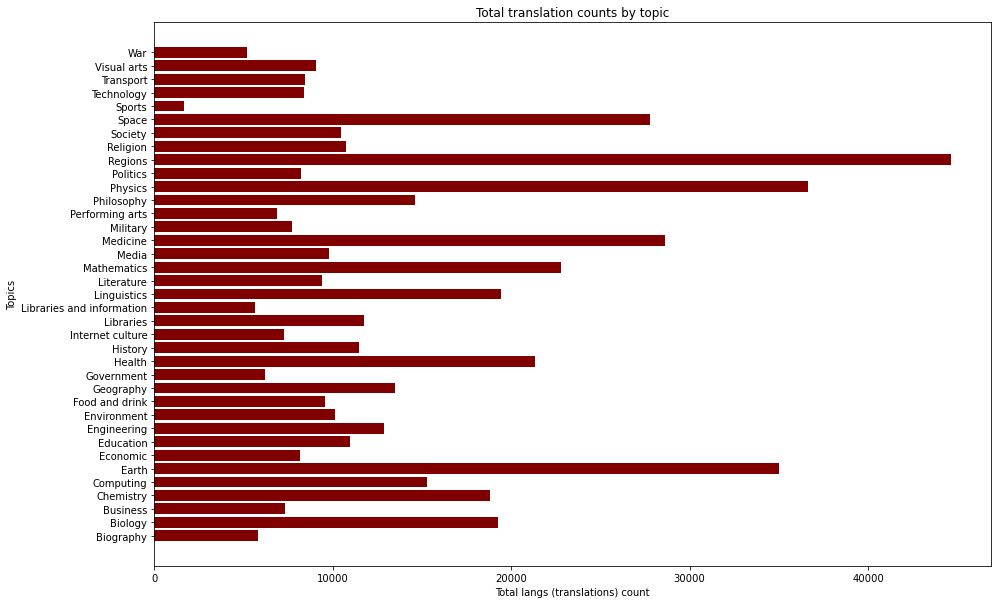

In [26]:
## Pie chart
import numpy as np
import matplotlib.pyplot as plt
 
data_pie = df.groupby(['category'])['langs_count'].sum()
courses = list(data_pie.index)
values = list(data_pie.values)

fig = plt.figure(figsize = (15, 10))
plt.barh(courses, values, color ='maroon')     
 
plt.xlabel("Total langs (translations) count")
plt.ylabel("Topics")
plt.title("Total translation counts by topic")
plt.show()

In [27]:
grp = df.groupby('category')
grp.describe().reset_index()

category langs_count                                   \
                                    count       mean        std  min   25%   
0                   Biography       751.0   7.747004  19.010451  0.0   0.0   
1                     Biology       491.0  39.193483  41.218398  0.0  10.0   
2                    Business       698.0  10.455587  18.023543  0.0   0.0   
3                   Chemistry       477.0  39.461216  43.457903  0.0   2.0   
4                   Computing       528.0  28.960227  31.753025  0.0   7.0   
5                       Earth       536.0  65.315299  71.988703  0.0  13.0   
6                    Economic       618.0  13.176375  20.654752  0.0   0.0   
7                   Education       622.0  17.623794  39.538684  0.0   0.0   
8                 Engineering       247.0  52.008097  44.947484  0.0  18.0   
9                 Environment       655.0  15.497710  22.785791  0.0   0.0   
10             Food and drink       742.0  12.876011  19.720263  0.0   1.0   
11                  Geography       676.0  19.914201  28.096316  0.0   1.0   
12                 Government       670.0   9.292537  20.085641  0.0   0.0   
13                     Health       583.0  36.634648  38.261741  0.0   6.0   
14                    History       702.0  16.319088  30.168772  0.0   0.0   
15           Internet culture       680.0  10.660294  19.899472  0.0   0.0   
16                  Libraries       350.0  33.545714  24.560595  1.0  14.0   
17  Libraries and information       317.0  17.883281  24.352675  0.0   0.0   
18                Linguistics       728.0  26.707418  30.806060  0.0   3.0   
19                 Literature       690.0  13.589855  23.484081  0.0   0.0   
20                Mathematics       624.0  36.508013  34.355893  0.0  13.0   
21                      Media       674.0  14.492582  22.182093  0.0   0.0   
22                   Medicine       695.0  41.159712  38.853254  0.0  11.0   
23                   Military       738.0  10.437669  19.420213  0.0   0.0   
24            Performing arts       690.0   9.992754  17.606692  0.0   0.0   
25                 Philosophy       725.0  20.182069  28.937300  0.0   1.0   
26                    Physics       689.0  53.201742  45.592242  0.0  19.0   
27                   Politics       729.0  11.260631  22.736380  0.0   0.0   
28                    Regions       628.0  71.135350  76.977363  0.0   3.0   
29                   Religion       748.0  14.342246  32.238950  0.0   0.0   
30                    Society       724.0  14.430939  29.040286  0.0   0.0   
31                      Space       696.0  39.893678  40.692957  0.0   9.0   
32                     Sports       350.0   4.674286   8.909103  0.0   0.0   
33                 Technology       717.0  11.695955  22.002657  0.0   0.0   
34                  Transport       763.0  11.068152  21.307105  0.0   0.0   
35                Visual arts       729.0  12.429355  23.117195  0.0   0.0   
36                        War       770.0   6.731169  15.470235  0.0   0.0   

                         
     50%     75%    max  
0    1.0    4.00  173.0  
1   26.0   56.00  256.0  
2    2.0   13.00  131.0  
3   28.0   60.00  227.0  
4   19.5   40.00  205.0  
5   40.0   90.25  311.0  
6    3.0   20.00  192.0  
7    1.0   12.75  269.0  
8   40.0   74.00  226.0  
9    5.0   23.00  172.0  
10   4.0   18.00  179.0  
11  11.0   27.00  246.0  
12   1.0    8.75  142.0  
13  25.0   55.00  227.0  
14   2.0   20.75  176.0  
15   2.0   13.00  160.0  
16  30.0   48.00  147.0  
17   6.0   29.00  147.0  
18  17.0   38.00  239.0  
19   2.0   18.00  205.0  
20  28.0   49.25  242.0  
21   5.0   21.75  201.0  
22  31.0   63.50  204.0  
23   2.0   12.00  174.0  
24   2.0   10.00  131.0  
25   6.0   31.00  228.0  
26  45.0   76.00  234.0  
27   1.0   11.00  174.0  
28  45.0  107.25  311.0  
29   2.0   13.00  257.0  
30   2.0   16.00  299.0  
31  30.0   61.00  258.0  
32   1.0    5.00   89.0  
33   2.0   15.00  195.0  
34   2.0   12.00  174.0  
35   3.0   15.00

### Mean by category/topic

Mean is the average of all of the numbers. The disadvantage of the mean is that big numbers will greatly affect the final
results, and it is harder to predict what is the "common" number of translations it gets.

In [28]:
display(df.groupby('category').mean(numeric_only=True).reset_index(0))

,category,langs_count
0,Biography,7.747004
1,Biology,39.193483
2,Business,10.455587
3,Chemistry,39.461216
4,Computing,28.960227
5,Earth,65.315299
6,Economic,13.176375
7,Education,17.623794
8,Engineering,52.008097
9,Environment,15.497710


### Median by category/topic

A median is a value separating the higher half from the lower half of a data sample, a population or a probability distribution. For a data set, it may be thought of as "the middle" value.


In [29]:
display(df.groupby('category').median(numeric_only=True).reset_index(0))

,category,langs_count
0,Biography,1.0
1,Biology,26.0
2,Business,2.0
3,Chemistry,28.0
4,Computing,19.5
5,Earth,40.0
6,Economic,3.0
7,Education,1.0
8,Engineering,40.0
9,Environment,5.0


### Mode by category/topic

The mode of a set of data values is the value that appears most often. The disadvantage of using the mode is that we get 
an absolute number, where the category may be getting something in a particular range. Such that, 4 (translations per article)  has 6 counts (appeareances), but 3 and 5 (translations per articles) appear 5 and 4 times respectively.  


In [30]:
df.groupby(['category'])['langs_count'].agg(pd.Series.mode)

category
Biography                               0
Biology                                 0
Business                                0
Chemistry                               0
Computing                               0
Earth                                   0
Economic                                0
Education                               0
Engineering                             1
Environment                             0
Food and drink                          0
Geography                               0
Government                              0
Health                                  0
History                                 0
Internet culture                        0
Libraries                    [27, 29, 31]
Libraries and information               0
Linguistics                             0
Literature                              0
Mathematics                             0
Media                                   0
Medicine                                0
Military                 

### Categorize and group according to ranges


- __<= 4__: low
- __<= 7__: medium
- __> 7__: high

In [31]:
from enum import Enum

# we are defining categories and benchmarks to group articles
class TranslationsCategory(Enum):
    LOW = 4
    MEDIUM = 7     
    HIGH = 7
    

In [32]:
df['status'] = df.apply(lambda row: "low" if (row.langs_count <= TranslationsCategory.LOW.value)
                                      else "medium" if (row.langs_count <= TranslationsCategory.MEDIUM.value) 
                                      else "high", axis = 1)


df

,title,pageid,langs_count,category,wiki_lang,status
0,Lidé_užívající_barmštinu,1470005,0,Biography,cs,low
1,Bílé_límečky,335521,31,Biography,cs,high
2,Seznam_ředitelů_FBI,445165,15,Biography,cs,high
3,Veganští_aktivisté,1844631,0,Biography,cs,low
4,Osoby_spjaté_s_rasismem,1814848,0,Biography,cs,low
...,...,...,...,...,...,...
24365,Laws_of_War_on_Land_(Oxford_1880),72172500,0,War,en,low
24366,Memorial_against_war_and_fascism,63083258,6,War,en,medium
24367,Beatrice_Wood,168787,17,War,en,high
24368,R._C._Sherriff,1298107,13,War,en,high


In [35]:
# get the counts of articles by category groups
status_by_category = df.groupby('category')['status'].value_counts()

display(status_by_category)
sum(status_by_category['Biography'].values)

category     status
Biography    low       566
             high      146
             medium     39
Biology      high      390
             low        74
                      ... 
Visual arts  high      269
             medium     54
War          low       545
             high      179
             medium     46
Name: status, Length: 111, dtype: int64

751

In [36]:
# show the structure of the data

display(status_by_category.index)
display(status_by_category.values)

MultiIndex([(  'Biography',    'low'),
            (  'Biography',   'high'),
            (  'Biography', 'medium'),
            (    'Biology',   'high'),
            (    'Biology',    'low'),
            (    'Biology', 'medium'),
            (   'Business',    'low'),
            (   'Business',   'high'),
            (   'Business', 'medium'),
            (  'Chemistry',   'high'),
            ...
            ( 'Technology', 'medium'),
            (  'Transport',    'low'),
            (  'Transport',   'high'),
            (  'Transport', 'medium'),
            ('Visual arts',    'low'),
            ('Visual arts',   'high'),
            ('Visual arts', 'medium'),
            (        'War',    'low'),
            (        'War',   'high'),
            (        'War', 'medium')],
           names=['category', 'status'], length=111)

array([566, 146,  39, 390,  74,  27, 424, 230,  44, 334, 132,  11, 388,
       103,  37, 429,  94,  13, 340, 244,  34, 404, 192,  26, 214,  25,
         8, 318, 287,  50, 372, 314,  56, 385, 244,  47, 463, 174,  33,
       426, 124,  33, 423, 251,  28, 414, 219,  47, 302,  25,  23, 153,
       150,  14, 476, 215,  37, 395, 255,  40, 515,  89,  20, 336, 286,
        52, 546, 123,  26, 445, 245,  48, 429, 200,  61, 339, 338,  48,
       571, 103,  15, 472, 217,  40, 455, 164,   9, 462, 239,  47, 427,
       253,  44, 531, 149,  16, 251,  58,  41, 429, 247,  41, 462, 244,
        57, 406, 269,  54, 545, 179,  46], dtype=int64)

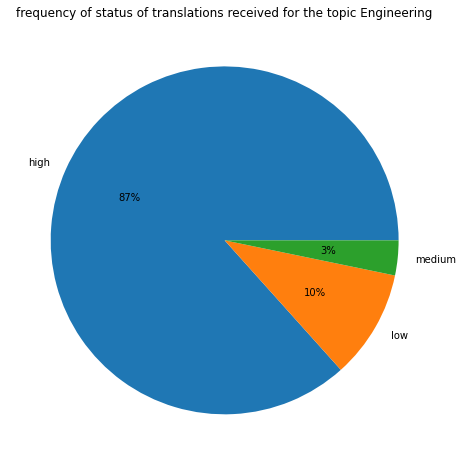

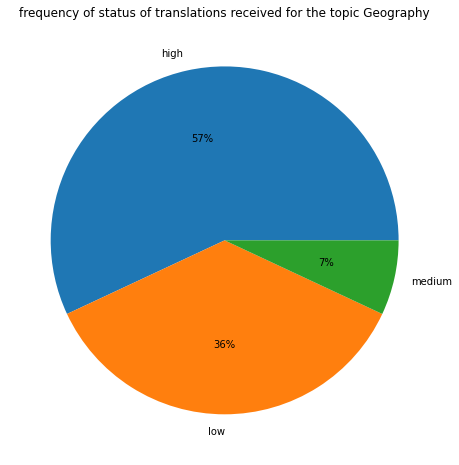

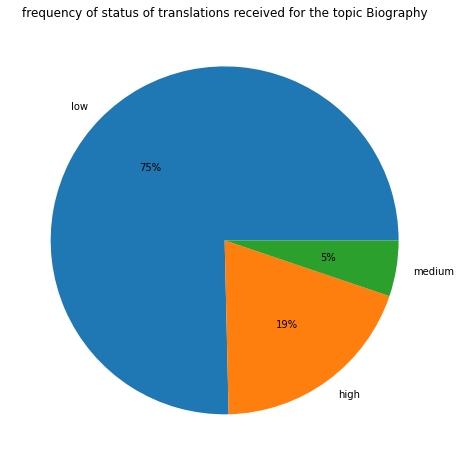

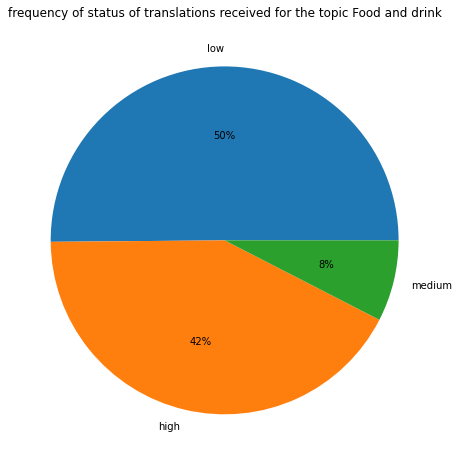

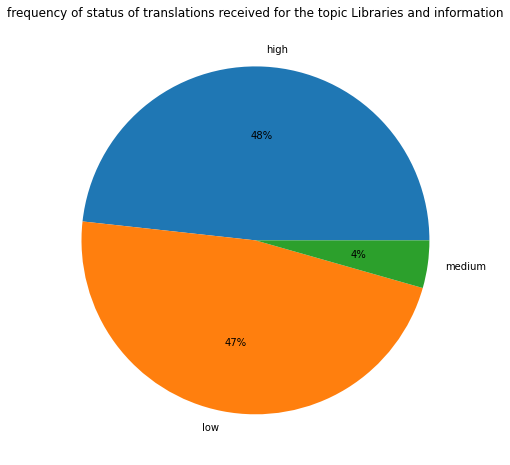

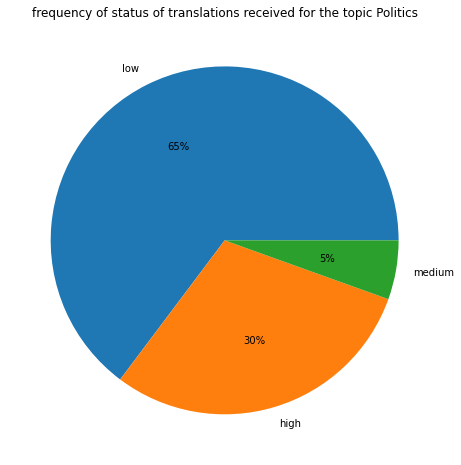

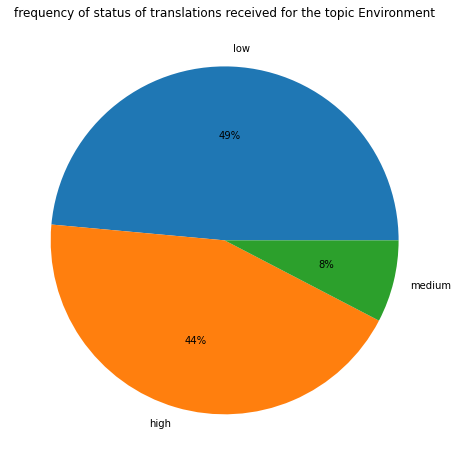

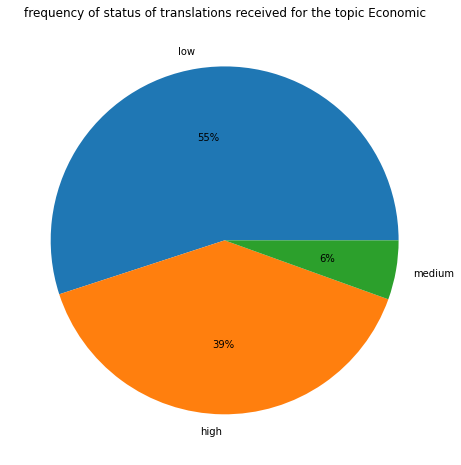

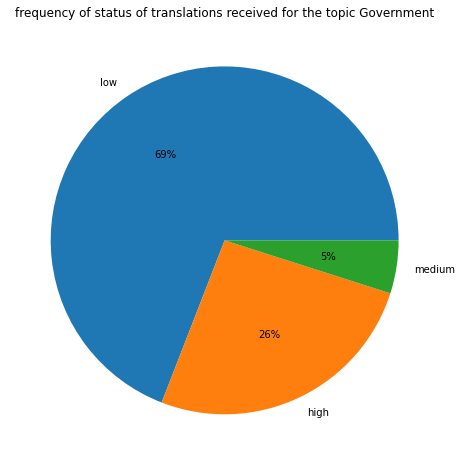

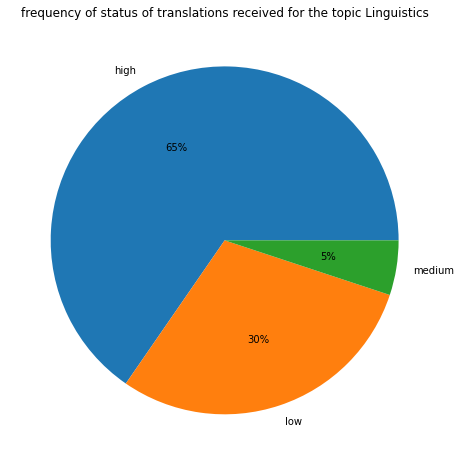

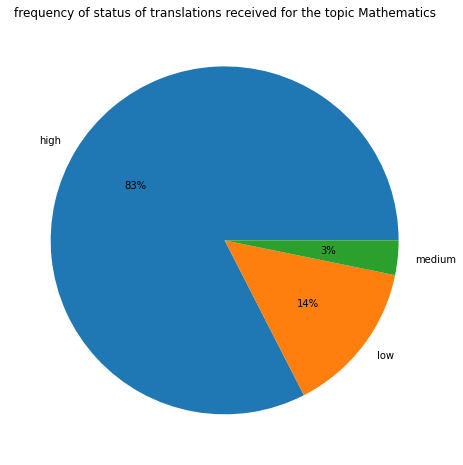

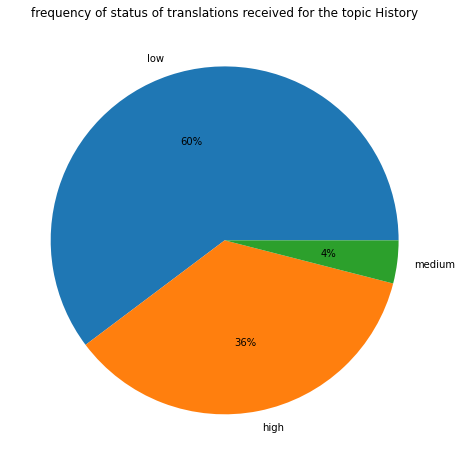

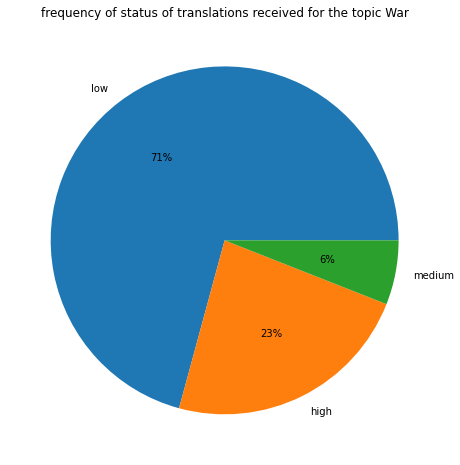

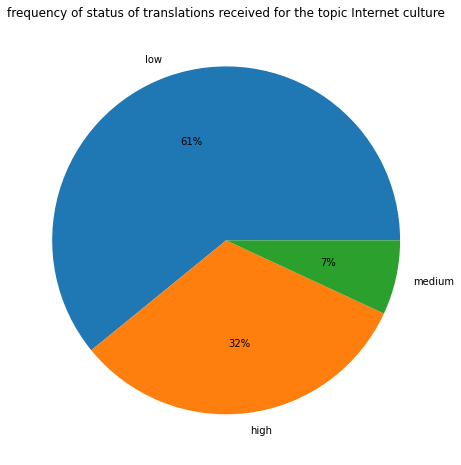

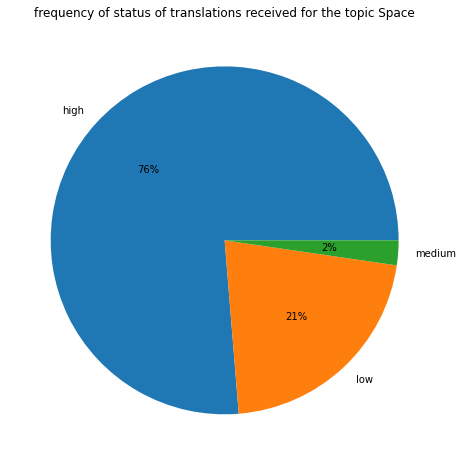

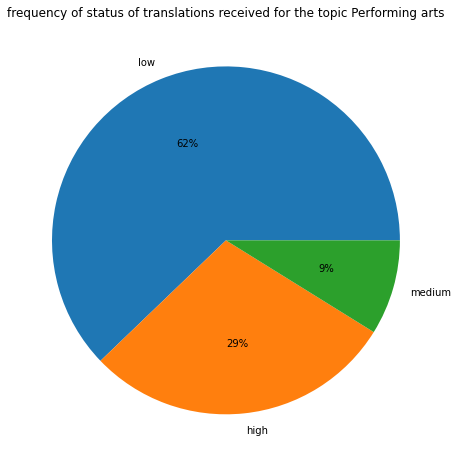

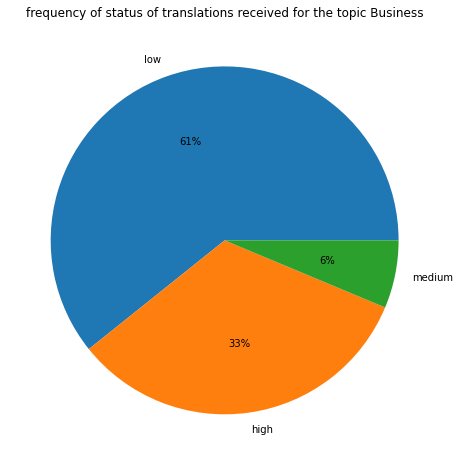

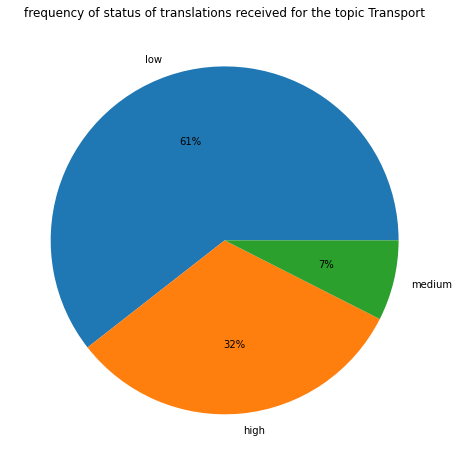

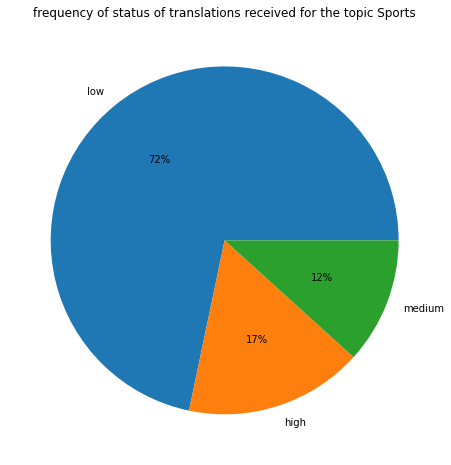

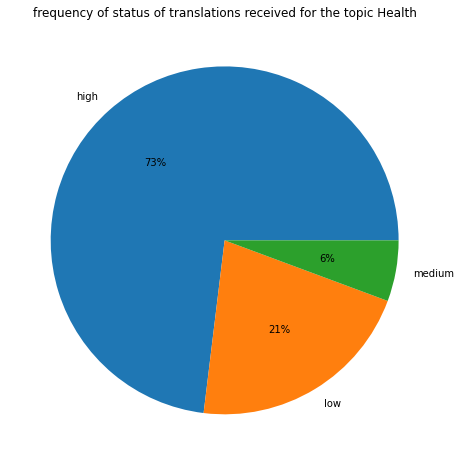

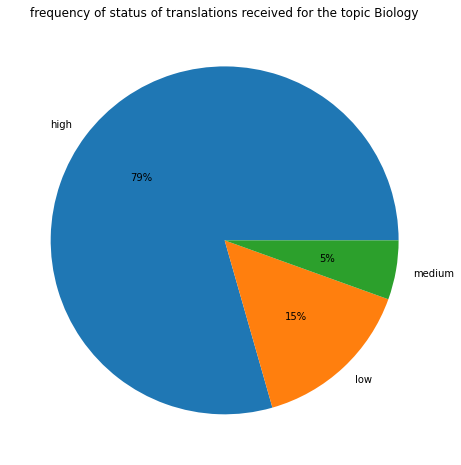

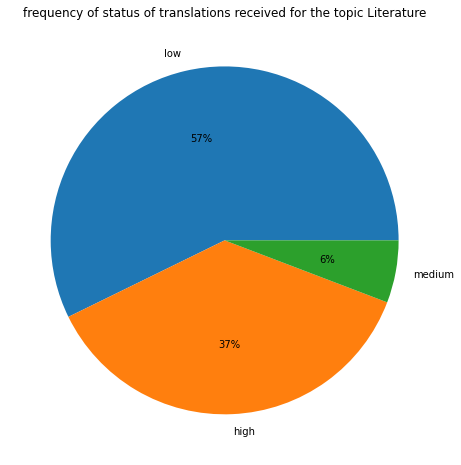

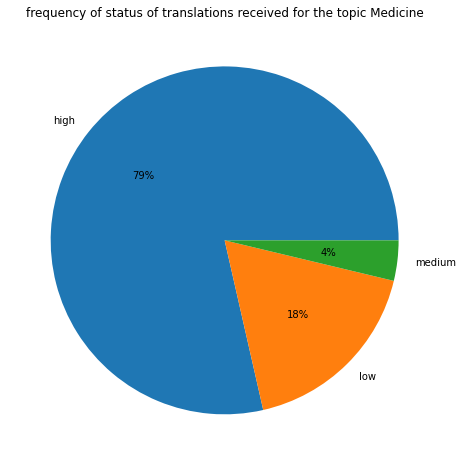

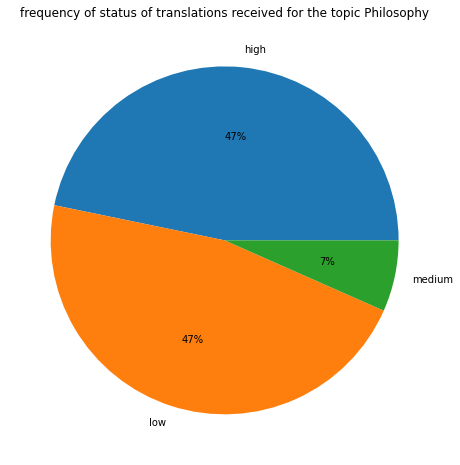

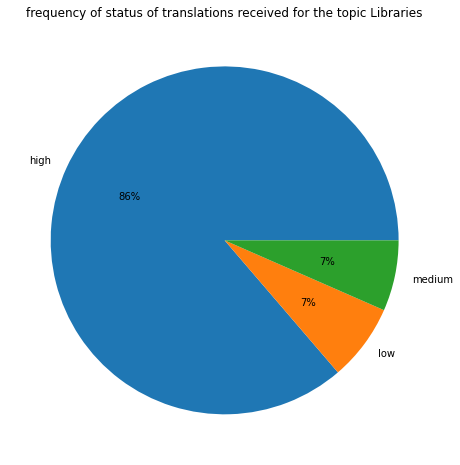

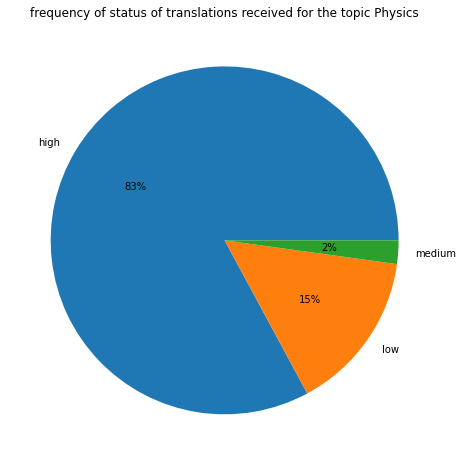

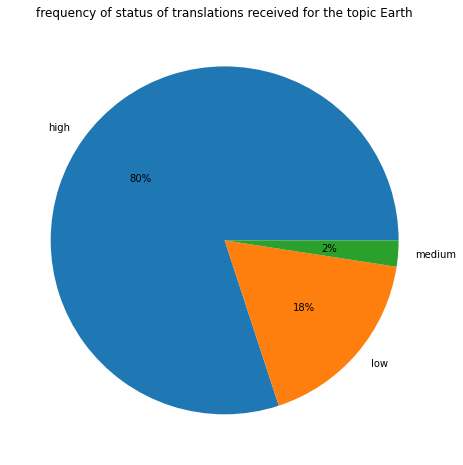

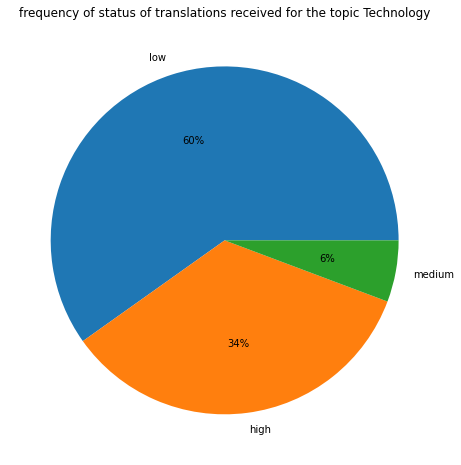

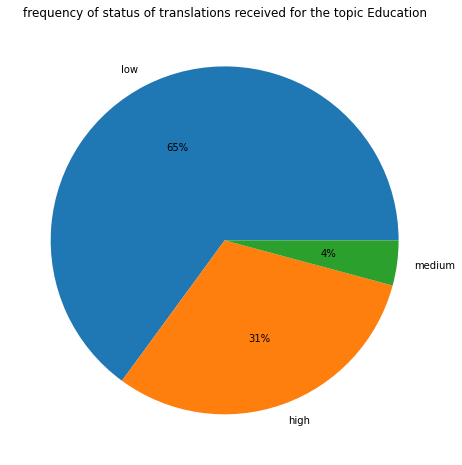

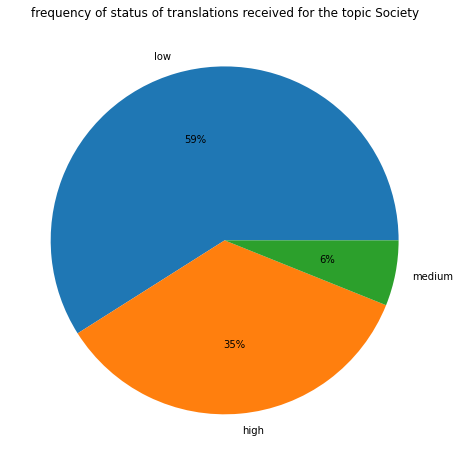

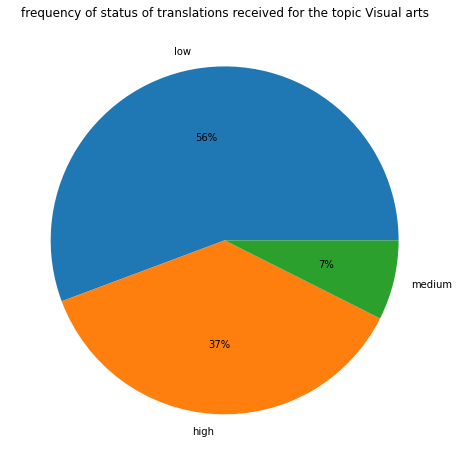

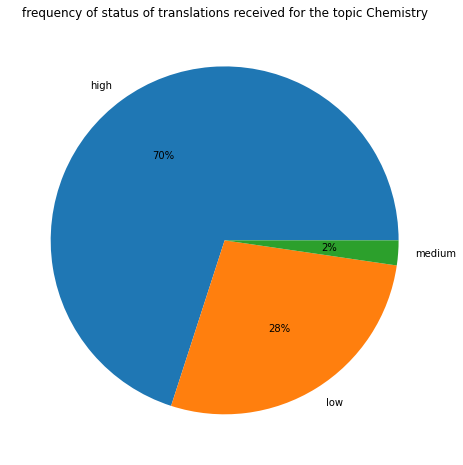

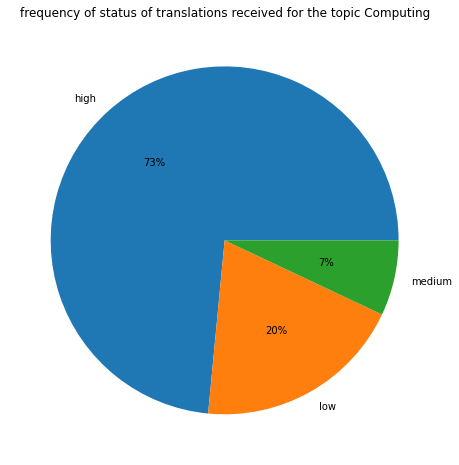

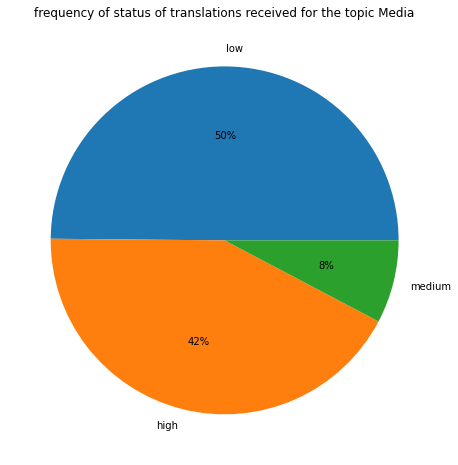

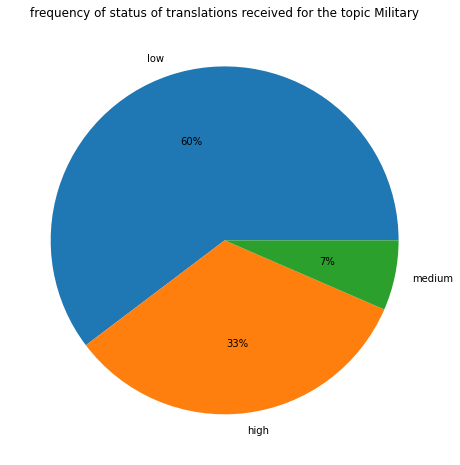

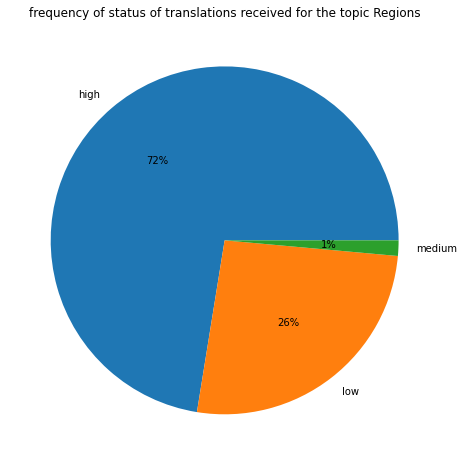

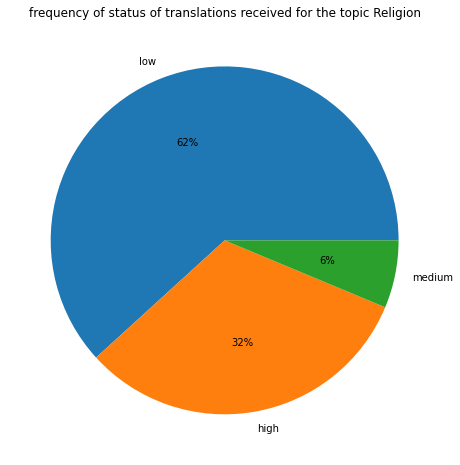

In [37]:
## Show distribution by specific language level

categories_status = set(status_by_category.index.get_level_values(0))
for label in categories_status:
    data = status_by_category[label]
    
    values = data.values.tolist()
    labels = data.index.tolist()
    
    plt.rcParams["figure.figsize"] = (20,8)
    plt.title(f'frequency of status of translations received for the topic {label}')
    plt.pie(values, labels=labels, autopct='%.0f%%')
    plt.show()
    

In [38]:
display(status_by_category['Literature'])

status
low       395
high      255
medium     40
Name: status, dtype: int64

In [39]:
## Prepare data to provide a final answer to the research question
low_values = []
medium_values = []
high_values = []

for label_ in categories_status:
    # get values
    total = sum(status_by_category[label_].values)
    low = status_by_category[label_].get('low', 0.0)
    medium = status_by_category[label_].get('medium', 0.0)
    high = status_by_category[label_].get('high', 0.0)
    
    # transform to percentages so that they can be compared to others, add values to list
    low_values.append(low/total)
    medium_values.append(medium/total)
    high_values.append(high/total)
    

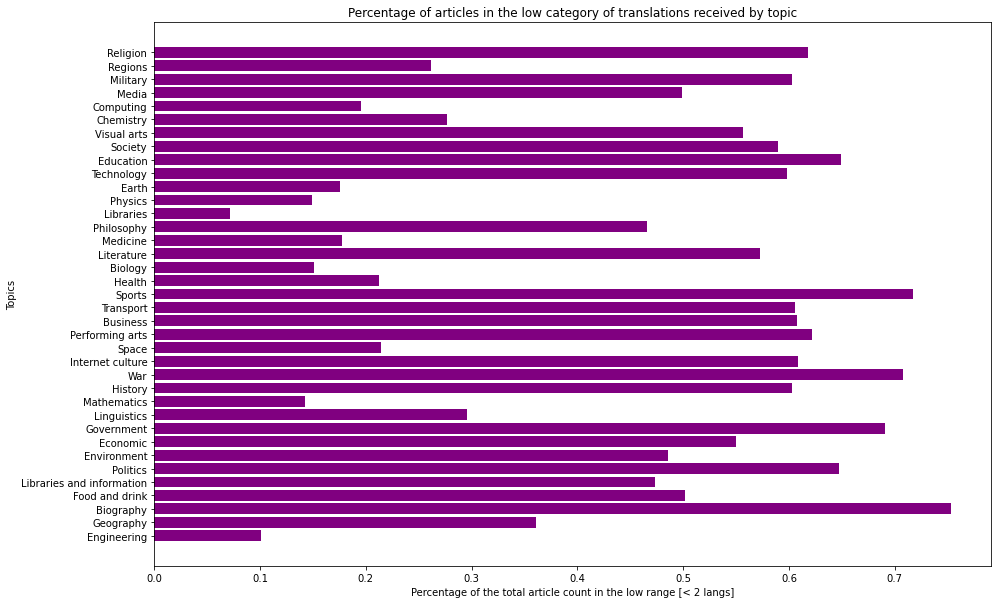

In [40]:
## Display results

## Low range
index =  list(categories_status)
values = low_values

fig = plt.figure(figsize = (15, 10))
plt.barh(index, values, color ='purple')     
 
plt.xlabel("Percentage of the total article count in the low range [< 2 langs]")
plt.ylabel("Topics")
plt.title("Percentage of articles in the low category of translations received by topic")
plt.show()



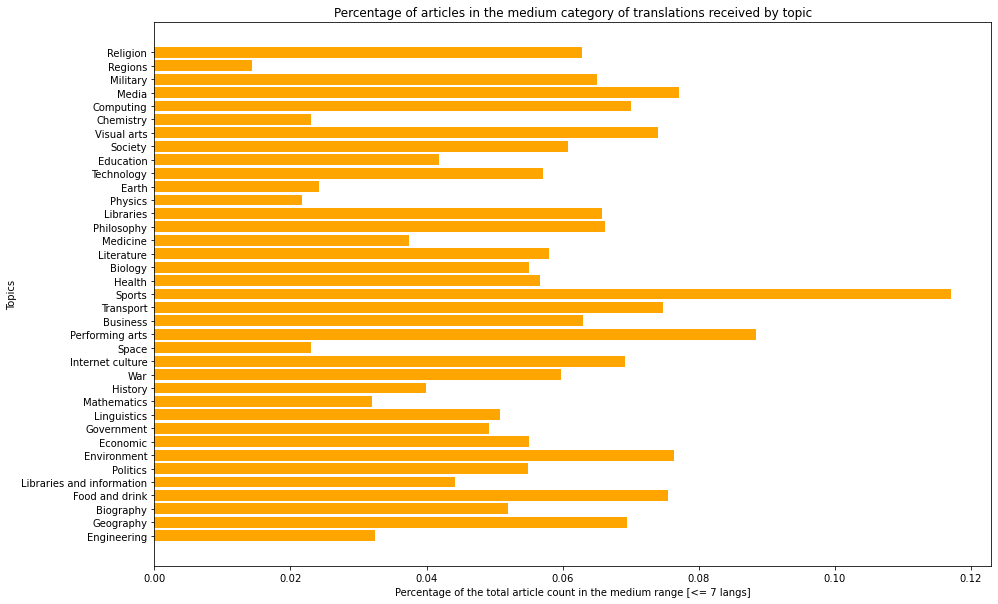

In [41]:
## Display results

## medium range
index =  list(categories_status)
values = medium_values

fig = plt.figure(figsize = (15, 10))
plt.barh(index, values, color ='orange')     
 
plt.xlabel("Percentage of the total article count in the medium range [<= 7 langs]")
plt.ylabel("Topics")
plt.title("Percentage of articles in the medium category of translations received by topic")
plt.show()

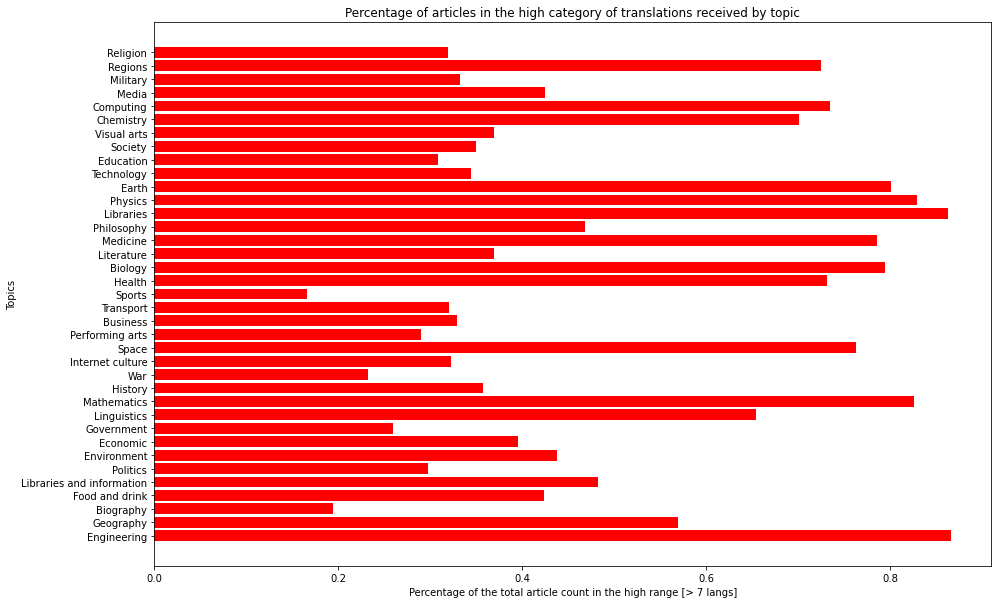

In [42]:
## Display results

## high range
index =  list(categories_status)
values = high_values

fig = plt.figure(figsize = (15, 10))
plt.barh(index, values, color ='red')     
 
plt.xlabel("Percentage of the total article count in the high range [> 7 langs]")
plt.ylabel("Topics")
plt.title("Percentage of articles in the high category of translations received by topic")
plt.show()

### 6. Explore further the groups of languages being translated and their pairs [if necessary]

In [1]:
#### English

In [ ]:
#### Czech

In [ ]:
#### Arabic

In [ ]:
#### Korean